# Assignment 1

**Authors**: Giorgio Adragna, Chiara Bellatreccia, Francesco Cavaleri, Marcello Mancino 

**Credits**: Federico Ruggeri, Eleonora Mancini, Paolo Torroni

**Keywords**: POS tagging, Sequence labelling, RNNs
<br/>

<!-- <center>
    <img src="https://media.tenor.com/CXfYShip7wAAAAAd/howdy-tom-and-jerry.gif" alt="features and outputs" /><br>
    <img src="https://media.tenor.com/vtyjmavNYwkAAAAC/tom-tom-and-jerry.gif" alt="features and outputs" />
</center> -->

# Section 1 - Corpus preparation

## Overview

We are going to work with the [Penn TreeBank corpus](https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/dependency_treebank.zip).

### Index

0. **Utils**
    1. **Seeds**
    2. Functions for the **download** and **extraction** of the corpus
1. **Corpus download**

2. **Corpus encoding** into a Pandas Dataframe

<b>Note</b>: we will ignore the numeric value in the third column and only use the words/symbols and their POS label.

### Example

```Pierre	NNP	2
Vinken	NNP	8
,	,	2
61	CD	5
years	NNS	6
old	JJ	2
,	,	2
will	MD	0
join	VB	8
the	DT	11
board	NN	9
as	IN	9
a	DT	15
nonexecutive	JJ	15
director	NN	12
Nov.	NNP	9
29	CD	16
.	.	8
```

The corpus contains 200 documents.

   * **Train**: Documents 1-100
   * **Validation**: Documents 101-150
   * **Test**: Documents 151-199

In [1]:
# Importing the main libraries that we need
import numpy as np
import pandas as pd
from pathlib import Path
from tqdm import tqdm
import urllib
import zipfile
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

### 0.1 Seeds

Here we define a handy function to set the seeds

In [2]:
def set_seeds(seed_value):
    np.random.seed(seed_value)
    tf.random.set_seed(seed_value)
    tf.keras.utils.set_random_seed(seed_value)

In [3]:
global_seed = 42
set_seeds(global_seed)

### 0.2 Functions for the download and extraction of the corpus

In [4]:
class DownloadProgressBar(tqdm):
    def update_to(self, b=1, bsize=1, tsize=None):
        if tsize is not None:
            self.total = tsize
        self.update(b * bsize - self.n)
        
def download_url(download_path: Path, url: str):
    with DownloadProgressBar(unit='B', unit_scale=True,
                             miniters=1, desc=url.split('/')[-1]) as t:
        urllib.request.urlretrieve(url, filename=download_path, reporthook=t.update_to)

        
def download_dataset(download_path: Path, url: str):
    print("Downloading dataset...")
    download_url(url=url, download_path=download_path)
    print("Download complete!")


def extract_dataset(download_path: Path, extract_path: Path):
    print("Extracting dataset... (it may take a while...)")
    with zipfile.ZipFile(download_path, 'r') as loaded_zip:
        loaded_zip.extractall(extract_path)
    print("Extraction completed!")

## 1. Corpus Download

In [5]:
url = "https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/dependency_treebank.zip"

dataset_name = "dependency_treebank"

print(f"Current work directory: {Path.cwd()}")
dataset_folder = Path.cwd().joinpath(dataset_name)


if not dataset_folder.exists():
    dataset_folder.mkdir(parents=True)

dataset_tar_path = Path.cwd().joinpath(dataset_name+".zip")
dataset_path = dataset_folder.joinpath(dataset_name)

if not dataset_tar_path.exists():
    download_dataset(dataset_tar_path, url)

if not dataset_path.exists():
    extract_dataset(dataset_tar_path, Path.cwd())

Current work directory: c:\Users\marcy\OneDrive\Desktop\Natural Language Processing 6 CFU + Project Work 3 CFU\Assignments\Assignment1_group_official\NLP_Assignment1
Extracting dataset... (it may take a while...)
Extraction completed!


## 2. Corpus encoding into a Pandas Dataframe

In [6]:
dataframe_rows = []

for file_path in dataset_folder.glob('*.dp'):
    with file_path.open(mode='r', encoding='utf-8') as text_file:   
        text = text_file.read()
        
        document = int( file_path.stem.split("_")[1] ) 

        list_of_sentences_and_taggings = text.split("\n\n")

        for sentence_and_tagging in list_of_sentences_and_taggings:
            sentence = []
            tagging = []
            
            words_and_taggings = sentence_and_tagging.split("\n")
            words_and_taggings.pop()    # the last element is empty

            for word_and_tagging in words_and_taggings:
                word_and_tagging = word_and_tagging.split("\t")
                sentence.append(word_and_tagging[0])
                tagging.append(word_and_tagging[1])


            if document <= 100:
                split = "train"
            elif document <= 150:
                split = "validation"       
            else:
                split = "test"      

            dataframe_row = {
                        "document": document,
                        "split": split,
                        "sentence": sentence,
                        "tagging": tagging
                    }
            
            dataframe_rows.append(dataframe_row)
        
df = pd.DataFrame(dataframe_rows)  
df

,document,split,sentence,tagging
0,1,train,"[Pierre, Vinken, ,, 61, years, old, ,, will, j...","[NNP, NNP, ,, CD, NNS, JJ, ,, MD, VB, DT, NN, ..."
1,1,train,"[Mr., Vinken, is, chairman, of, Elsevier, N.V....","[NNP, NNP, VBZ, NN, IN, NNP, NNP, ,, DT, NNP, ..."
2,2,train,"[Rudolph, Agnew, ,, 55, years, old, and, forme...","[NNP, NNP, ,, CD, NNS, JJ, CC, JJ, NN, IN, NNP..."
3,3,train,"[A, form, of, asbestos, once, used, to, make, ...","[DT, NN, IN, NN, RB, VBN, TO, VB, NNP, NN, NNS..."
4,3,train,"[The, asbestos, fiber, ,, crocidolite, ,, is, ...","[DT, NN, NN, ,, NN, ,, VBZ, RB, JJ, IN, PRP, V..."
...,...,...,...,...
3909,198,test,"[They, also, said, that, more, than, a, dozen,...","[PRP, RB, VBD, IN, JJR, IN, DT, NN, NNS, VBP, ..."
3910,198,test,"[Sen., Kennedy, said, in, a, separate, stateme...","[NNP, NNP, VBD, IN, DT, JJ, NN, IN, PRP, VBZ, ..."
3911,199,test,"[Trinity, Industries, Inc., said, it, reached,...","[NNP, NNPS, NNP, VBD, PRP, VBD, DT, JJ, NN, TO..."
3912,199,test,"[Terms, were, n't, disclosed]","[NNS, VBD, RB, VBN]"


<br/>

<!-- <center>
    <img src="https://media.tenor.com/KLUhBZzq8TkAAAAC/tom-from-tom-and-jerry-smoking.gif" />
</center> -->

# Section 2 - Text encoding

## Overview

To train a neural POS tagger, we need to **encode** text into numerical format.

Before doing that, we perform some adeguate **pre-processing** on our data; once we are through with pre-processing, we can **transform the dataset** so that both input sentences and output tags have a numerical format.

The transformed dataset is then going to be **split** into **Train**, **Validation** and **Test set**.
Finally, we use the vocabulary we have created to build our **embedding matrix**.

### Index

0. **Utils**
    1. Preprocessing utils
    2. Vocabulary utils
    3. Utils for plotting frequencies
    4. Utils for the encoding of the dataset
    5. Utils for creating the embedding matrix
    
1. **Pre-processing** 

2. Building the **vocabulary**
    1. Loading **GloVe**
    2. **Creating** the vocabulary
    3. **Sanity check**
    4. **Saving** the vocabulary

3. **Transforming** the dataset
    1. **Statistics** about the dataset
    2. **Encoding** the dataset

4. **Train/Validation/Test split**
5. Creating the **embedding matrix**

## 0. Utils

In [7]:
import gensim
import gensim.downloader as gloader
from typing import List, Callable, Dict, Tuple
from collections import OrderedDict
from collections import Counter
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

### 0.1 Pre-processing utils

We define a function that transforms all text into lowercase. This will be useful for pre-processing.

In [8]:
def lower(sentence: list) -> list:

    processed_sentence = map(lambda x: x.lower(), sentence)

    return list(processed_sentence)

### 0.2 Vocabulary utils

Then, we will need to load GloVe, so let's build a function that does so.

In [9]:
def load_GloVe(embedding_dimension: int = 50) -> gensim.models.keyedvectors.KeyedVectors:
    
    download_path = "glove-wiki-gigaword-{}".format(embedding_dimension)
    
    try:
        emb_model = gloader.load(download_path)
    except ValueError as e:
        print("Invalid embedding model name! Check the embedding dimension:")
        print("Glove: 50, 100, 200, 300")
        raise e

    return emb_model

This function merges GloVe with the words of the training set, as explained in [point 2](#vocab).

In [10]:
def union_training_Glove(embedding_model: gensim.models.keyedvectors.KeyedVectors,
                        training_set_tokens: list, 
                        embedding_size: int):
    
    for token in tqdm(training_set_tokens):
        if token not in embedding_model:
            embedding_model[token] = np.random.uniform(low=-0.05, high=0.05, size=embedding_size) # add all missing words from the training set
            
    embedding_model['static_oov'] = np.random.uniform(low=-0.05, high=0.05, size=embedding_size) # all OOV tokens collapse to this vector

This function extracts all the words that appear in our dataframe's "sentence" column and returns them as a list. 

In [11]:
def retrieve_words(df: pd.DataFrame) -> (List[str]):
    
    words_in_df = []
    
    for sentence in tqdm(df.sentence.values):
        for token in sentence:
            if token not in words_in_df:
                words_in_df.append(token)
    
    return words_in_df

We use the following function to check how many terms are in the training set BUT NOT in GloVe.

In [12]:
def check_new_terms(embedding_model: gensim.models.keyedvectors.KeyedVectors,
                    word_listing: List[str]) -> (List[str]):
    
    embedding_vocabulary = set(embedding_model.key_to_index.keys())
    new_terms = set(word_listing).difference(embedding_vocabulary)
    
    return list(new_terms)

This function will create our vocabulary through the following steps:
1. Retrieving all the words of the training set and checking how many of these are unknown to GloVe
2. Merging the words known to GloVe with the 'new' words found at step 1
3. Adding the special 'pad' token

In [13]:
def create_vocabulary(embedding_model: gensim.models.keyedvectors.KeyedVectors, df: pd.DataFrame, embedding_size: int, verbose = False) -> Tuple[Dict, List]:

    # Step 1
    training_words_prep = retrieve_words(df)

    new_terms_prep = check_new_terms(embedding_model, training_words_prep)
    new_percentage_prep = float(len(new_terms_prep)) * 100 / len(training_words_prep)

    if verbose:
        print(f"Total new terms: {len(new_terms_prep)} ({new_percentage_prep:.2f}%)")
        print()

    # Step 2
    union_training_Glove(embedding_model, training_words_prep, embedding_size)

    # Step 3
    '''
        NOTE:  we want the `<pad>` token to take index 0.
        Now, because `word_to_idx` is initialized with indices ranging from 0 to `VOCABULARY_SIZE` 
        (total number is `VOCABULARY_SIZE` + 1 because we have the special `oov_token`), 
        we need to shift everything by one position to make space for the `<pad>` token.
    '''

    # Initializing word_to_idx with indices ranging from 0 to VOCABULARY_SIZE
    word_to_idx_no_pad = embedding_model.key_to_index
    word_to_idx = dict()

    # Adding the `<pad>` token and augmenting all indices of 1 (thus ranging from 1 to VOCABULARY_SIZE + 1) 
    word_to_idx["<pad>"] = 0    
    for token in word_to_idx_no_pad:
        word_to_idx[token] = word_to_idx_no_pad[token]+1

    if verbose:
        print("Word to index:")
        print("[Debug] Before:")
        print(list(word_to_idx_no_pad.items())[:10])
        print("[Debug] After: ")
        print(list(word_to_idx.items())[:10])
        print()

    # Now we can safely add <pad> to the mix
    idx_to_word_no_pad = embedding_model.index_to_key

    if verbose:
        print("Index to word:")
        print("[Debug] Before:")
        print(idx_to_word_no_pad[:10])
        
    idx_to_word = ["<pad>"] + idx_to_word_no_pad

    if verbose:
        print("[Debug] After: ")
        print(idx_to_word[:10])

    return word_to_idx, idx_to_word # embedding_model.index_to_key is a list, so our idx_to_word is basically also our word_listing

To make sure that our vocabulary creation routine always returns the same result, we perform some sanity checks via the following function

In [14]:
def evaluate_vocabulary(word_to_idx: dict, idx_to_word: list, df: pd.DataFrame, embedding_size: int):
    
    print("[Vocabulary Evaluation] Size checking...")
    assert len(idx_to_word) == len(word_to_idx.items()) 
    print()

    print("[Vocabulary Evaluation] Content checking...")
    for i in tqdm(range(1, len(idx_to_word))):              # We start from 1 because we want to skip the '<pad>' token
        assert idx_to_word[i] in list(word_to_idx.keys())
        assert word_to_idx[idx_to_word[i]] == i
    print()

    print("[Vocabulary Evaluation] Consistency checking...")   
    emb1 = load_GloVe(embedding_size)
    emb2 = load_GloVe(embedding_size)
    _, first_word_listing = create_vocabulary(emb1, df, embedding_size)
    _, second_word_listing = create_vocabulary(emb2, df, embedding_size)
    assert first_word_listing == second_word_listing

### 0.3 Utils for plotting frequencies

A function that plots frequencies of tags. We will use it to infer some statistics about the dataset.

In [15]:
def plot_tags_frequencies_hist(df: pd.DataFrame, set_of_tags: set, split = 'global') -> Tuple[pd.DataFrame, List]:
    
    if split != 'global':
        df = df[ df["split"] == split]

    tags_exploded = [tag for sentence in df["tagging"] for tag in sentence]
    tags_counts = pd.DataFrame(Counter(tags_exploded).items(), columns=['Tag', 'Count']).sort_values("Count", ascending=False)
    missing_tags = [ tag for tag in set_of_tags if tag not in tags_exploded]

    plt.figure(figsize=(20,6))
    sns.barplot(data=tags_counts, x = 'Tag', y = 'Count')
    plt.show()
    print(f"Number of tags ({split}): {tags_counts.shape[0]}")
    
    return tags_counts, missing_tags

### 0.4 Utils for the encoding of the dataset

This function transforms the tokens of each sentence into their corresponding index

In [16]:
def encode_sentences(df: pd.DataFrame, word_to_idx: dict) -> pd.DataFrame:
    
    # We want to keep the un-encoded version, so we create a deep copy of it
    df_to_encode = df.copy(deep=True)
    
    # The following line substitutes each word with its index if it is found, and it collapses all OOVs into one index
    df_to_encode["sentence"] = df_to_encode["sentence"].apply(lambda sentence: [word_to_idx.get(token, word_to_idx["static_oov"]) for token in sentence])

    return df_to_encode

### 0.5 Utils for the creation of the embedding matrix

In [17]:
def build_embedding_matrix(embedding_model: gensim.models.keyedvectors.KeyedVectors,
                           embedding_dimension: int,
                           vocab_size: int) -> np.ndarray:
    
    embedding_matrix = np.zeros((vocab_size + 1, embedding_dimension), dtype=np.float32)

    for word, idx in tqdm(embedding_model.key_to_index.items()):
        if idx != 0: embedding_matrix[idx] = embedding_model[word]  # leaving the first row unchanged because it refers to pad tokens
    
    return embedding_matrix

## 1. Pre-processing

The only pre-processing technique we opt to use is `lowercasing`.

In fact, every other pre-pocessing technique would not be useful, and, as a matter of fact, could be damaging.

Removing punctuation, for instance, would deprive the model of an essential piece of information to exploit.

Lowercasing, on the other hand, is useful to unify different instances of a word, that might come both lowercase and uppercase (e.g. a word that is NOT a proper noun BUT appears at the beginning of a sentence will start with an uppercase character, and that could mislead our model into thinking that said word is a proper noun). 

We can expect, though, that this may have a negative influence for the classification of proper nouns (they will all start with a lowercase letter, making them harder to distinguish from common nouns), but we make this choice nonetheless, as this effect is likely outweighted by the benefit that it provides.

In [18]:
df_prep = df.copy()

In [19]:
print('Lower-casing...')

print()
print(f'[Debug] Before:\n{df_prep["sentence"][:10]}')
print()

df_prep['sentence'] = df_prep['sentence'].apply(lambda sentence: lower(sentence))

print(f'[Debug] After lower-casing:\n{df_prep["sentence"][:10]}')
print()

print('Lower-casing completed!')

Lower-casing...

[Debug] Before:
0    [Pierre, Vinken, ,, 61, years, old, ,, will, j...
1    [Mr., Vinken, is, chairman, of, Elsevier, N.V....
2    [Rudolph, Agnew, ,, 55, years, old, and, forme...
3    [A, form, of, asbestos, once, used, to, make, ...
4    [The, asbestos, fiber, ,, crocidolite, ,, is, ...
5    [Lorillard, Inc., ,, the, unit, of, New, York-...
6    [Although, preliminary, findings, were, report...
7    [A, Lorillard, spokewoman, said, ,, ``, This, ...
8    [We, 're, talking, about, years, ago, before, ...
9    [There, is, no, asbestos, in, our, products, n...
Name: sentence, dtype: object

[Debug] After lower-casing:
0    [pierre, vinken, ,, 61, years, old, ,, will, j...
1    [mr., vinken, is, chairman, of, elsevier, n.v....
2    [rudolph, agnew, ,, 55, years, old, and, forme...
3    [a, form, of, asbestos, once, used, to, make, ...
4    [the, asbestos, fiber, ,, crocidolite, ,, is, ...
5    [lorillard, inc., ,, the, unit, of, new, york-...
6    [although, preliminary,

## 2. Building the Vocabulary

<a id='vocab'></a>

Our vocabulary will contain:
- all words of **GloVe**
- all words that appear **in the training set** that are not in GloVe
- a special **OOV token** to handle the words that appear in the validation/test set but not in the vocabulary

### 2.1 Loading GloVe

We set the default `embedding_dimension` at 50 because our dataset is relatively small (only ~4000 sentences), so we expect our model to benefit from a lower-dimensional embedding.

In [20]:
EMBEDDING_SIZE = 100

In [21]:
GV_embedding_model = load_GloVe(EMBEDDING_SIZE)

### 2.2 Creating the vocabulary

We are not splitting the dataset now, as we still have to encode it so that it can be fed to the model.

Nonetheless, we need to find possible new words, namely those words that were found in the train set but not in GloVe.
<br>
To do this, we must use the un-encoded train set.

In [22]:
df_train_prep = df_prep[ df_prep["split"] == "train"]
print(df_train_prep.shape)
df_train_prep

(1963, 4)


,document,split,sentence,tagging
0,1,train,"[pierre, vinken, ,, 61, years, old, ,, will, j...","[NNP, NNP, ,, CD, NNS, JJ, ,, MD, VB, DT, NN, ..."
1,1,train,"[mr., vinken, is, chairman, of, elsevier, n.v....","[NNP, NNP, VBZ, NN, IN, NNP, NNP, ,, DT, NNP, ..."
2,2,train,"[rudolph, agnew, ,, 55, years, old, and, forme...","[NNP, NNP, ,, CD, NNS, JJ, CC, JJ, NN, IN, NNP..."
3,3,train,"[a, form, of, asbestos, once, used, to, make, ...","[DT, NN, IN, NN, RB, VBN, TO, VB, NNP, NN, NNS..."
4,3,train,"[the, asbestos, fiber, ,, crocidolite, ,, is, ...","[DT, NN, NN, ,, NN, ,, VBZ, RB, JJ, IN, PRP, V..."
...,...,...,...,...
1958,100,train,"[it, would, be, a, good, match, ,, mr., hahn, ...","[PRP, MD, VB, DT, JJ, NN, ,, NNP, NNP, CC, JJ,..."
1959,100,train,"[the, resulting, company, would, be, the, larg...","[DT, VBG, NN, MD, VB, DT, JJS, NNS, NN, IN, DT..."
1960,100,train,"[but, can, mr., hahn, carry, it, off]","[CC, MD, NNP, NNP, VB, PRP, IN]"
1961,100,train,"[in, this, instance, ,, industry, observers, s...","[IN, DT, NN, ,, NN, NNS, VBP, ,, PRP, VBZ, VBG..."


In [23]:
word_to_idx, idx_to_word = create_vocabulary(GV_embedding_model, df_train_prep, EMBEDDING_SIZE, verbose = True)

 72%|███████▏  | 1406/1963 [00:00<00:00, 2648.80it/s]

100%|██████████| 1963/1963 [00:00<00:00, 2487.16it/s]


Total new terms: 359 (4.85%)



100%|██████████| 7403/7403 [00:24<00:00, 297.39it/s] 


Word to index:
[Debug] Before:
[('the', 0), (',', 1), ('.', 2), ('of', 3), ('to', 4), ('and', 5), ('in', 6), ('a', 7), ('"', 8), ("'s", 9)]
[Debug] After: 
[('<pad>', 0), ('the', 1), (',', 2), ('.', 3), ('of', 4), ('to', 5), ('and', 6), ('in', 7), ('a', 8), ('"', 9)]

Index to word:
[Debug] Before:
['the', ',', '.', 'of', 'to', 'and', 'in', 'a', '"', "'s"]
[Debug] After: 
['<pad>', 'the', ',', '.', 'of', 'to', 'and', 'in', 'a', '"']


In [24]:
VOCABULARY_SIZE = len(word_to_idx) - 1 # we do NOT want to consider the pad token
print(VOCABULARY_SIZE)

400360


### 2.3 Sanity check

In [25]:
# print("Vocabulary evaluation...")
# evaluate_vocabulary(word_to_idx, idx_to_word, df_train_prep, EMBEDDING_SIZE)
# print("Evaluation completed!") 

### 2.4 Saving the vocabulary

In [26]:
import simplejson as sj

vocab_path = Path.cwd().joinpath('vocab_prep.json')

print(f"Saving vocabulary to {vocab_path}")
with vocab_path.open(mode='w') as f:
    sj.dump(word_to_idx, f, indent=4)
print("Saving completed!")

Saving vocabulary to c:\Users\marcy\OneDrive\Desktop\Natural Language Processing 6 CFU + Project Work 3 CFU\Assignments\Assignment1_group_official\NLP_Assignment1\vocab_prep.json


Saving completed!


## 3. Transforming the dataset

We want to transform our dataset so that:
- the sentences are encoded into lists of indices (we will use the indices of GloVe), where each index refers uniquely to a word;
- the tags are one-hot-encoded; we expect to get, for each row of the dataframe (i.e. each sentence) a matrix of shape (num_words, num_tags) where each row is a vector of zeros except for the true label, which is 1.

Then, we want to apply padding both to the sentences and to the tags. To do so, we need to set a variable MAX_SEQ_LENGHT that is arbitrarily set. We set it by visualizing some statistics about the lenghts of the sentences of our dataset.

### 3.1 Statistics about the dataset

Let us investigate our dataset, in order to get some information that we can use when building our model.

We will need this to set the value of `MAX_SEQ_LENGHT`, the **maximum lenght for a sentence** for our models.

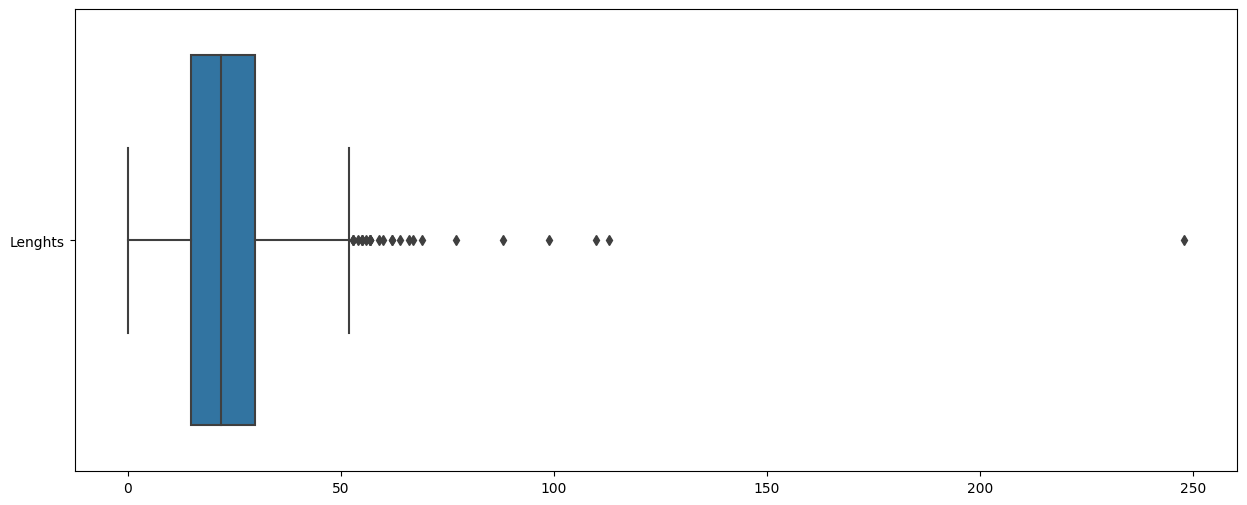

,Lenghts
count,1963.000000
mean,23.175242
std,12.592769
min,0.000000
25%,15.000000
50%,22.000000
75%,30.000000
max,248.000000


In [27]:
sentence_lenghts = pd.DataFrame({"Lenghts": [len(sentence) for sentence in df_train_prep["sentence"]]})
plt.figure(figsize=(15,6))
sns.boxplot(sentence_lenghts, orient='h')
plt.show()
sentence_lenghts.describe()

It seems that most of the sentences are less than 50 words long.
In order to avoid chopping too many sentences we set MAX_SEQ_LENGHT to 75.

In [28]:
MAX_SEQ_LENGTH = 75

In [29]:
chopped_sentences = [idx for idx, sentence in enumerate(df['sentence']) if len(sentence) > MAX_SEQ_LENGTH]
print(f"Number of sentences that surpass the limit in lenght is {len(chopped_sentences)} ({len(chopped_sentences) / df['sentence'].shape[0]:.4f} %)")

Number of sentences that surpass the limit in lenght is 8 (0.0020 %)


It seems like a reasonable choice to pick 75 as the maximum lenght for a sentence, basically allowing to exploit the whole dataset (0.002% is left out) without an excessive overhead.

Let us investigate the **frequency of each tag**, in order to detect potential imbalances that may affect the performance of our model if not dealt with.

In [30]:
all_tags = []
[ all_tags.extend(el) for el in df["tagging"] ]
all_tags_unique = set(all_tags)
print(all_tags_unique)

{'JJ', 'RB', 'WDT', 'WP$', '.', 'UH', 'WRB', 'IN', '-RRB-', 'NNP', '#', 'RBR', 'SYM', 'CD', 'TO', 'PDT', 'EX', '$', "''", '``', 'PRP', 'VBN', 'JJR', 'DT', ',', 'NN', 'FW', 'VB', 'VBG', 'NNS', 'CC', 'VBZ', 'VBD', 'WP', '-LRB-', 'JJS', 'LS', 'NNPS', 'VBP', 'RP', 'RBS', ':', 'POS', 'MD', 'PRP$'}


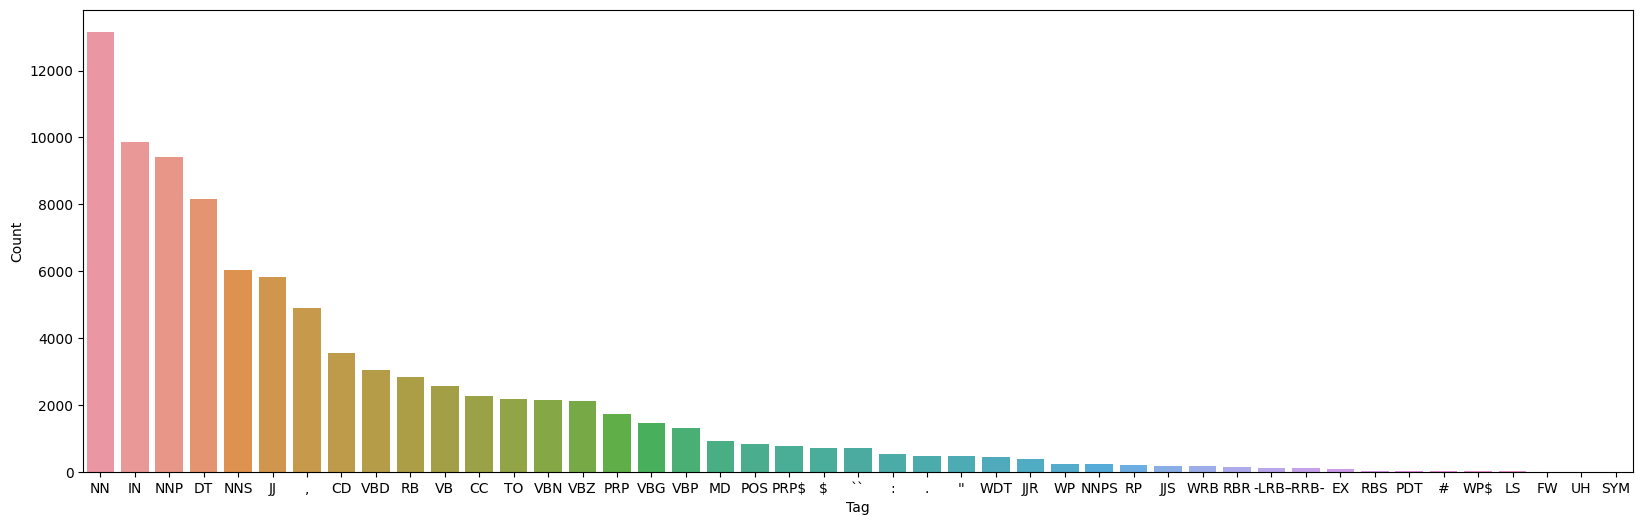

Number of tags (global): 45


In [31]:
global_tags_counts, _ = plot_tags_frequencies_hist(df=df, set_of_tags=all_tags_unique)

In [32]:
global_tags_counts.head(10)

,Tag,Count
8,NN,13160
9,IN,9851
0,NNP,9404
7,DT,8164
3,NNS,6045
4,JJ,5834
1,",",4884
2,CD,3544
14,VBD,3043
16,RB,2821


In [33]:
global_tags_counts.describe()

,Count
count,45.000000
mean,2008.200000
std,3033.245941
min,1.000000
25%,136.000000
50%,710.000000
75%,2265.000000
max,13160.000000


As the histogram shows, there is, as expected, a high imbalance among the tags.

In particular, out of the total 45 tags, the top-4 tags (**common nouns** (**NN**), **preepositions/conjuctions** (**IN**), **proper nouns** (**NNP**) and **determiners** (**DT**)) cover almost half of all occurrences (~45%).

We must take this into account when building the models.

It is useful to perform the same analysis specifically for each split.

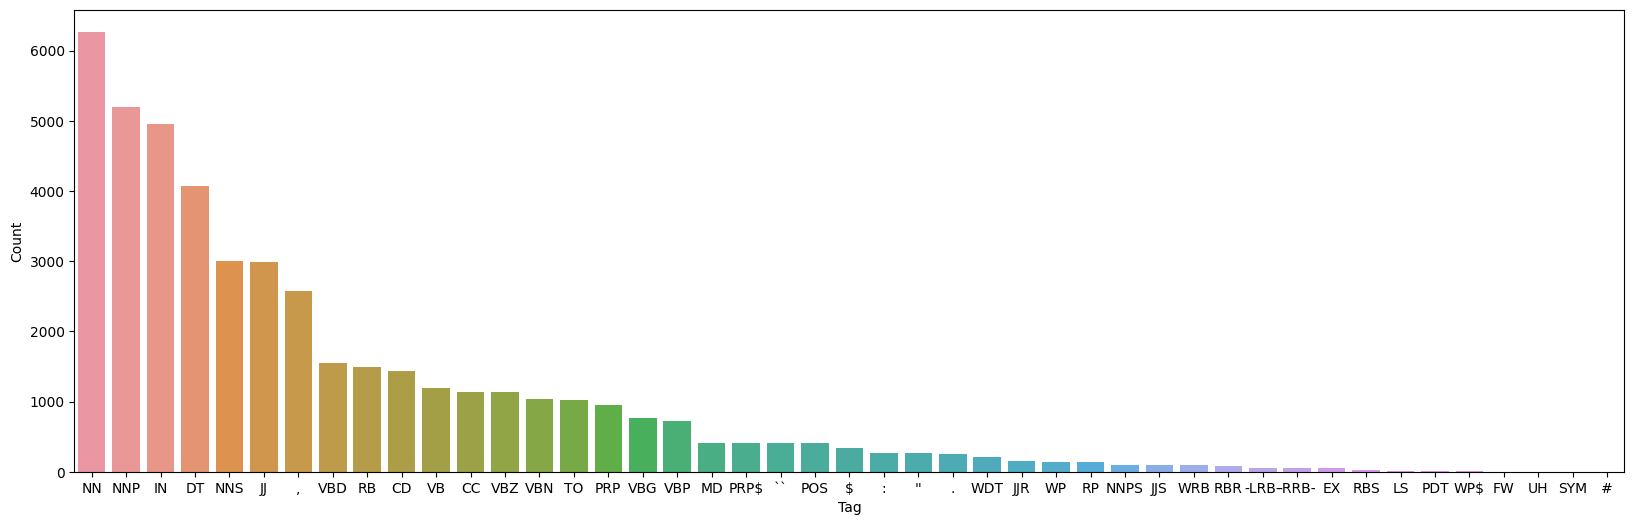

Number of tags (train): 45


In [34]:
train_tags_counts, train_missing_tags = plot_tags_frequencies_hist(df=df, set_of_tags=all_tags_unique, split='train')

As we can see, in the training set all the 45 tags are present.

In [35]:
train_tags_counts.head(10)

,Tag,Count
8,NN,6269
0,NNP,5201
9,IN,4950
7,DT,4076
3,NNS,3004
4,JJ,2992
1,",",2571
14,VBD,1548
16,RB,1490
2,CD,1439


In [36]:
train_tags_counts.describe()

,Count
count,45.000000
mean,1010.955556
std,1522.905237
min,1.000000
25%,86.000000
50%,342.000000
75%,1141.000000
max,6269.000000


Now let's see what the situation is for the validation set.

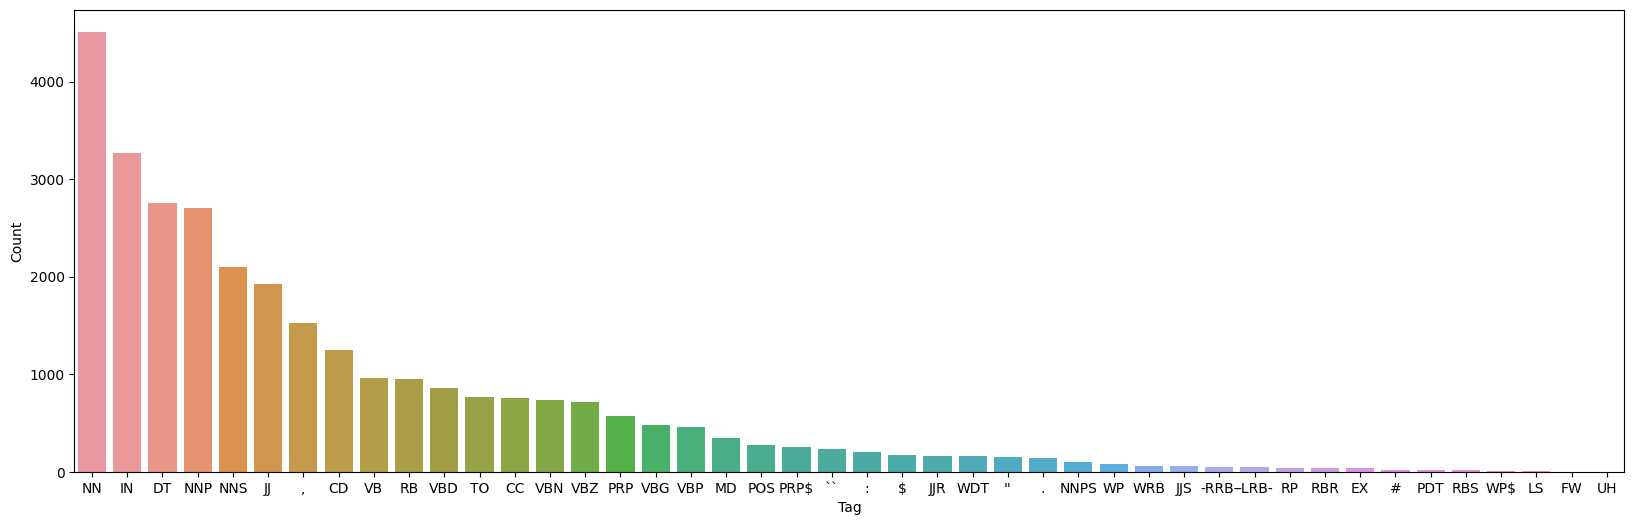

Number of tags (validation): 44


In [37]:
val_tags_counts, val_missing_tags = plot_tags_frequencies_hist(df=df, set_of_tags=all_tags_unique, split='validation')

In the validation set there is one tag that never occurs: let us discover which one it this.

In [38]:
val_missing_tags

['SYM']

In [39]:
val_tags_counts.head(10)

,Tag,Count
2,NN,4511
6,IN,3272
0,DT,2753
1,NNP,2699
5,NNS,2101
4,JJ,1924
15,",",1527
9,CD,1248
23,VB,956
12,RB,951


In [40]:
val_tags_counts.describe()

,Count
count,44.000000
mean,680.318182
std,1006.961184
min,2.000000
25%,50.750000
50%,213.500000
75%,789.000000
max,4511.000000


And finally, the test tags frequency.

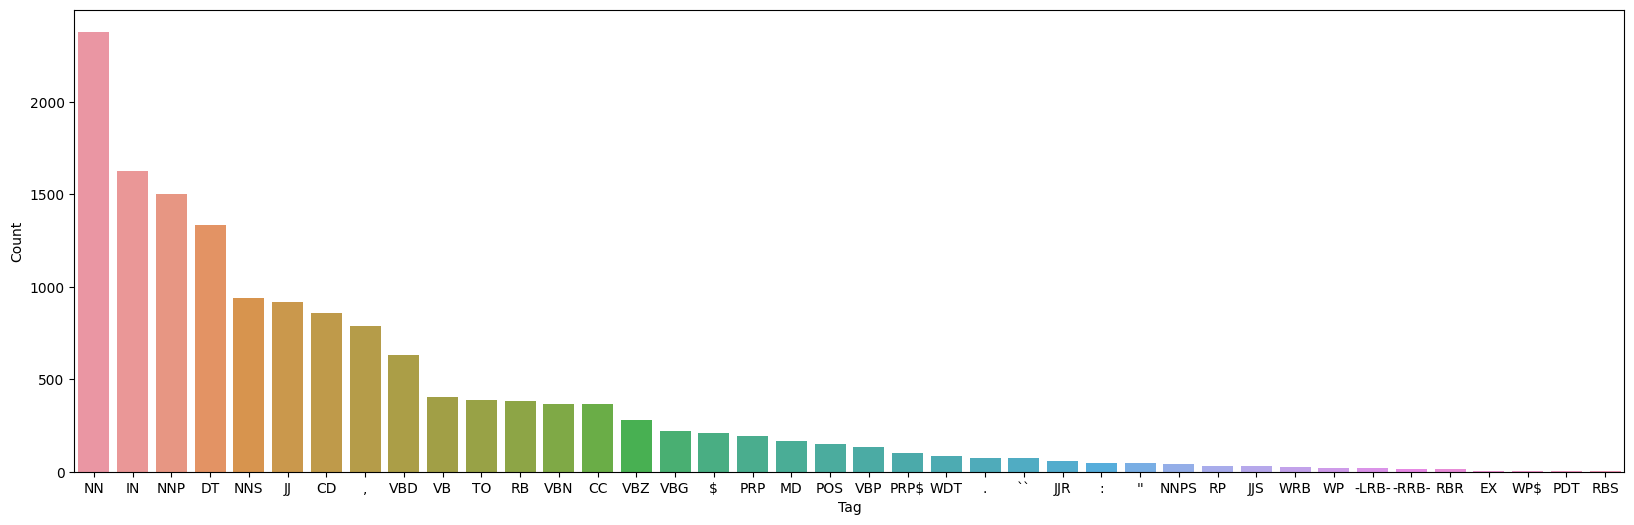

Number of tags (test): 40


In [41]:
test_tags_counts, test_missing_tags = plot_tags_frequencies_hist(df=df, set_of_tags=all_tags_unique, split='test')

In the test set there are 5 tags that never occur: let us discover which ones.

In [42]:
test_missing_tags

['UH', '#', 'SYM', 'FW', 'LS']

In [43]:
test_tags_counts.head(10)

,Tag,Count
8,NN,2380
7,IN,1629
0,NNP,1504
11,DT,1335
5,NNS,940
10,JJ,918
4,CD,857
1,",",786
2,VBD,634
17,VB,403


In [44]:
test_tags_counts.describe()

,Count
count,40.000000
mean,373.550000
std,538.359567
min,3.000000
25%,32.500000
50%,143.000000
75%,390.250000
max,2380.000000


### 3.2 Encoding the dataset

We are now ready to encode the dataset.

In [45]:
tagging_tokenizer = Tokenizer(filters = [])
tagging_tokenizer.fit_on_texts(df_prep["tagging"])

We are now going to encode and pad both sentences and tags.
In order to make all types compatible we do as follows:
- encode the sentences/tags;
- cast them to a list as the pad_sequences function requests;
- save the numpy array of the padded sequences;
- save it as a dataframe column after casting it to a list

In [46]:
# Sentences encoding + padding
df_prep_encoded = encode_sentences(df_prep, word_to_idx)
X_encoded = list(df_prep_encoded["sentence"])
X_padded = pad_sequences(X_encoded, maxlen=MAX_SEQ_LENGTH, padding="pre", truncating="post")
df_prep_encoded["sentence"] = X_padded.tolist()

# Tags encoding to int + padding + one hot encoding
df_prep_encoded["tagging"] = tagging_tokenizer.texts_to_sequences(df_prep_encoded["tagging"])
Y_encoded = list(df_prep_encoded["tagging"])
Y_padded = pad_sequences(Y_encoded, maxlen=MAX_SEQ_LENGTH, padding="pre", truncating="post")
Y_padded_one_hot = to_categorical(Y_padded)
df_prep_encoded["tagging"] = Y_padded_one_hot.tolist()

In [47]:
print("Let's have a look at how a sentence looks like now:")
print(df_prep_encoded["sentence"][0])

Let's have a look at how a sentence looks like now:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5030, 400001, 2, 4979, 83, 168, 2, 44, 1430, 1, 535, 20, 8, 128565, 370, 2344, 1264]


In [48]:
print("The corresponding tag before OHE:")
Y_padded[0]

The corresponding tag before OHE:


array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  3,  3,  7,  8,  5,  6,  7, 19, 11,  4,
        1,  2,  4,  6,  1,  3,  8])

In [49]:
print("... and after OHE:")

print(df_prep_encoded["tagging"].iloc[0])

... and after OHE:
[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

## 4. Train/Validation/Test split

To perform the split, we can exploit the column that specifies it for each sample.

In [50]:
df_prep_encoded_train = df_prep_encoded[ df_prep_encoded["split"] == "train"]
print(df_prep_encoded_train.shape)
df_prep_encoded_train

(1963, 4)


,document,split,sentence,tagging
0,1,train,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,1,train,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,2,train,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,3,train,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,3,train,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
...,...,...,...,...
1958,100,train,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1959,100,train,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1960,100,train,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1961,100,train,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [51]:
df_prep_encoded_validation = df_prep_encoded[ df_prep_encoded["split"] == "validation"]
print(df_prep_encoded_validation.shape)
df_prep_encoded_validation

(1299, 4)


,document,split,sentence,tagging
1963,101,validation,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1964,101,validation,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1965,101,validation,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1966,101,validation,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1967,101,validation,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
...,...,...,...,...
3257,150,validation,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3258,150,validation,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3259,150,validation,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3260,150,validation,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [52]:
df_prep_encoded_test = df_prep_encoded[ df_prep_encoded["split"] == "test"]
print(df_prep_encoded_test.shape)
df_prep_encoded_test

(652, 4)


,document,split,sentence,tagging
3262,151,test,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3263,151,test,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3264,151,test,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3265,151,test,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3266,151,test,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
...,...,...,...,...
3909,198,test,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3910,198,test,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3911,199,test,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3912,199,test,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


Alright!

## 5. Creating the embedding matrix

The embedding matrix has size (`VOCABULARY_SIZE`+1, `EMBEDDING_SIZE`), where the additional row is due to the presence of the `<pad>` token.

In [53]:
embedding_matrix_prep = build_embedding_matrix(GV_embedding_model, EMBEDDING_SIZE, VOCABULARY_SIZE)
print(f"Embedding matrix shape: {embedding_matrix_prep.shape}")

100%|██████████| 400360/400360 [00:00<00:00, 599260.91it/s]

Embedding matrix shape: (400361, 100)


# Section 3 - Model definition

## Overview

We are going to create 3 models, namely:

* **Baseline**: A Bidirectional LSTM with a Dense layer on top
* **Model 1**: An additional LSTM layer is added to the Baseline model
* **Model 2**: An additional Dense layer is added to the Baseline model

### Index

0. **Utils**
    1. **Weight** initialisation
    2. Function for the **definition of the model**

1. **Baseline**

2. **Model 1**

3. **Model 2**

## 0. Utils

In [54]:
from tensorflow.keras import Sequential, Input, Model
from tensorflow.keras.layers import Embedding, Dense, TimeDistributed, LSTM, GRU, Bidirectional, SimpleRNN, RNN
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt
from math import log
from collections import OrderedDict


In [55]:
NUM_CLASSES = len(df_prep_encoded["tagging"].iloc[0][0])
NUM_CLASSES

46

### 0.1 Weight initialisation

Let's initialize the weights of the final layer so that they reflect the frequency of the classes in our training set.

We do so by initializing the biases with the log-frequencies of their corresponding tags. This should ensure a good starting point for the gradients <a href="https://karpathy.github.io/2019/04/25/recipe/"> [A Recipe for Training Neural Networks, Andrej Karpathy's blog] </a>.

In [56]:
def my_init(shape, dtype=None):
    class_frequencies = {}

    Y_padded_train = Y_padded[:1963]
    tot = 0

    for sentence in Y_padded_train:
        for tag in sentence:
            class_frequencies[tag] = class_frequencies.get(tag, 0) + 1
            if tag != 0:
                tot += 1

    class_frequencies = OrderedDict(sorted(class_frequencies.items()))

    class_frequencies = {tag:value/tot for tag,value in class_frequencies.items()}
    class_frequencies = list(class_frequencies.values())

    biases = [log(frequency) for frequency in class_frequencies]
    biases[0] = 0

    return tf.convert_to_tensor(biases, dtype=dtype)

### 0.2 Function for the definition of the model

Here we create a function to instantiate a given model with a given seed.

In [57]:
def create_model(seed: int, model_type = ""):
    set_seeds(seed)

    base_model = Sequential()
    base_model.add(Embedding(input_dim      = VOCABULARY_SIZE+1,
                                output_dim     = EMBEDDING_SIZE,
                                input_length   = MAX_SEQ_LENGTH,
                                weights        = [embedding_matrix_prep],
                                mask_zero      = True,
                                trainable      = True
    ))
    base_model.add(Bidirectional(LSTM(256, return_sequences=True, dropout=.3, recurrent_dropout=.3)))

    if model_type == "model_1":
        base_model.add(Bidirectional(LSTM(512, return_sequences=True, dropout=.3, recurrent_dropout=.3)))
    elif model_type == "model_2":
        base_model.add(TimeDistributed(Dense(512, activation='relu')))

    base_model.add(TimeDistributed(Dense(NUM_CLASSES, activation='softmax', bias_initializer = my_init)))     

    base_model.compile(loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing=.1),
              optimizer = Adam( learning_rate = 3e-4, weight_decay = 1e-3 ),
              metrics=['acc'])
    
    base_model.summary()

    return base_model

## 1. Baseline
Bidirectional LSTM with a Dense layer on top.

In [58]:
baseline_42 = create_model(42)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 75, 100)           40036100  
                                                                 
 bidirectional (Bidirection  (None, 75, 512)           731136    
 al)                                                             
                                                                 
 time_distributed (TimeDist  (None, 75, 46)            23598     
 ributed)                                                        
                                                                 
Total params: 40790834 (155.60 MB)
Trainable params: 40790834 (155.60 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [59]:
baseline_69 = create_model(69)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 75, 100)           40036100  
                                                                 
 bidirectional_1 (Bidirecti  (None, 75, 512)           731136    
 onal)                                                           
                                                                 
 time_distributed_1 (TimeDi  (None, 75, 46)            23598     
 stributed)                                                      
                                                                 
Total params: 40790834 (155.60 MB)
Trainable params: 40790834 (155.60 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [60]:
baseline_420 = create_model(420)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 75, 100)           40036100  
                                                                 
 bidirectional_2 (Bidirecti  (None, 75, 512)           731136    
 onal)                                                           
                                                                 
 time_distributed_2 (TimeDi  (None, 75, 46)            23598     
 stributed)                                                      
                                                                 
Total params: 40790834 (155.60 MB)
Trainable params: 40790834 (155.60 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 2. Model 1
An additional LSTM layer is added to the Baseline model.

In [61]:
model_1_42 = create_model(42, "model_1")

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 75, 100)           40036100  
                                                                 
 bidirectional_3 (Bidirecti  (None, 75, 512)           731136    
 onal)                                                           
                                                                 
 bidirectional_4 (Bidirecti  (None, 75, 1024)          4198400   
 onal)                                                           
                                                                 
 time_distributed_3 (TimeDi  (None, 75, 46)            47150     
 stributed)                                                      
                                                                 
Total params: 45012786 (171.71 MB)
Trainable params: 45012786 (171.71 MB)
Non-trainable params: 0 (0.00 Byte)
__________

In [62]:
model_1_69 = create_model(69, "model_1")

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 75, 100)           40036100  
                                                                 
 bidirectional_5 (Bidirecti  (None, 75, 512)           731136    
 onal)                                                           
                                                                 
 bidirectional_6 (Bidirecti  (None, 75, 1024)          4198400   
 onal)                                                           
                                                                 
 time_distributed_4 (TimeDi  (None, 75, 46)            47150     
 stributed)                                                      
                                                                 
Total params: 45012786 (171.71 MB)
Trainable params: 45012786 (171.71 MB)
Non-trainable params: 0 (0.00 Byte)
__________

In [63]:
model_1_420 = create_model(420, "model_1")

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 75, 100)           40036100  
                                                                 
 bidirectional_7 (Bidirecti  (None, 75, 512)           731136    
 onal)                                                           
                                                                 
 bidirectional_8 (Bidirecti  (None, 75, 1024)          4198400   
 onal)                                                           
                                                                 
 time_distributed_5 (TimeDi  (None, 75, 46)            47150     
 stributed)                                                      
                                                                 
Total params: 45012786 (171.71 MB)
Trainable params: 45012786 (171.71 MB)
Non-trainable params: 0 (0.00 Byte)
__________

## 3. Model 2
An additional Dense layer is added to the Baseline model.

In [64]:
model_2_42 = create_model(42, "model_2")

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 75, 100)           40036100  
                                                                 
 bidirectional_9 (Bidirecti  (None, 75, 512)           731136    
 onal)                                                           
                                                                 
 time_distributed_6 (TimeDi  (None, 75, 512)           262656    
 stributed)                                                      
                                                                 
 time_distributed_7 (TimeDi  (None, 75, 46)            23598     
 stributed)                                                      
                                                                 
Total params: 41053490 (156.61 MB)
Trainable params: 41053490 (156.61 MB)
Non-trainable params: 0 (0.00 Byte)
__________

In [65]:
model_2_69 = create_model(69, "model_2")

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 75, 100)           40036100  
                                                                 
 bidirectional_10 (Bidirect  (None, 75, 512)           731136    
 ional)                                                          
                                                                 
 time_distributed_8 (TimeDi  (None, 75, 512)           262656    
 stributed)                                                      
                                                                 
 time_distributed_9 (TimeDi  (None, 75, 46)            23598     
 stributed)                                                      
                                                                 
Total params: 41053490 (156.61 MB)
Trainable params: 41053490 (156.61 MB)
Non-trainable params: 0 (0.00 Byte)
__________

In [66]:
model_2_420 = create_model(420, "model_2")

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 75, 100)           40036100  
                                                                 
 bidirectional_11 (Bidirect  (None, 75, 512)           731136    
 ional)                                                          
                                                                 
 time_distributed_10 (TimeD  (None, 75, 512)           262656    
 istributed)                                                     
                                                                 
 time_distributed_11 (TimeD  (None, 75, 46)            23598     
 istributed)                                                     
                                                                 
Total params: 41053490 (156.61 MB)
Trainable params: 41053490 (156.61 MB)
Non-trainable params: 0 (0.00 Byte)
__________

Here we reset the seed to 42 (our "global seed").

In [67]:
set_seeds(global_seed)

# Section 4 -  Metrics

## Overview

Before training the models, we define the evaluation metrics for comparison.

Our evaluation will not consider the tags that refer to punctuation; therefore, we need to define **a function that filters the tags** so that they are not counted.

Moreover, because the models only deal with sentences with lenght up to `MAX_SEQ_LEN`, we need to chop the corresponding sentences' true labels to make the dimensions compatible.

Once we have done that, we will be able to define the functions to perform the **evaluation** and to plot the **confusion matrix**.

### Index

0. **Utils**

1. Determining the **tags to consider** during evaluation

2. Defining the **evaluation functions**

## 0. Utils

In [68]:
import regex as re
from sklearn.metrics import ConfusionMatrixDisplay, f1_score, classification_report
import matplotlib.pyplot as plt

Let's define the functions that will, respectively, filter the tags so that we disregard punctuation, and chop the tags so that each sentence does not surpass `MAX_SEQ_LEN`. Moreover, said function should 'explode' the sentences into a single, continuous list of tags for both the ground truth and the predictions.

In [69]:
def chop_and_explode(y_true, y_pred):

    # (1) We need to chop true sentences so that they are not longer than MAX_SEQ_LEN
    y_true_chopped = []
    y_pred_chopped = []

    for i in range(len(y_pred)):
        final_len = min(MAX_SEQ_LENGTH, len(y_pred[i]), len(y_true.iloc[i]))
        if final_len != 0:
            y_true_chopped.append(y_true.iloc[i][-final_len:])
            y_pred_chopped.append(y_pred[i][-final_len:])
            
    # (2) Creating the exploded lists
    y_true_all = [word for sentence in y_true_chopped for word in sentence]
    y_pred_all = [word for sentence in y_pred_chopped for word in sentence]
    
    return y_true_all, y_pred_all

def filter_tags(y_true, y_pred, tags_to_consider):
    y_true_to_consider = []
    y_pred_to_consider = []

    for idx, el in enumerate(y_true):
        if el in tags_to_consider:
            y_true_to_consider.append(y_true[idx])
            y_pred_to_consider.append(y_pred[idx])
    return y_true_to_consider, y_pred_to_consider

## 1. Determining the tags to consider during evaluation
Not all tags are to be considered for evaluation.
We will be using regex to find all legitimate tags.

In [70]:
print(all_tags_unique)
print(len(all_tags_unique))

{'JJ', 'RB', 'WDT', 'WP$', '.', 'UH', 'WRB', 'IN', '-RRB-', 'NNP', '#', 'RBR', 'SYM', 'CD', 'TO', 'PDT', 'EX', '$', "''", '``', 'PRP', 'VBN', 'JJR', 'DT', ',', 'NN', 'FW', 'VB', 'VBG', 'NNS', 'CC', 'VBZ', 'VBD', 'WP', '-LRB-', 'JJS', 'LS', 'NNPS', 'VBP', 'RP', 'RBS', ':', 'POS', 'MD', 'PRP$'}
45


From the looks of it, the legitimate tags are all the tags that contain at least one alphabetic character.
Other characters can be present too though, as we have tags like '-RBR-', or 'PRP$'.

In [71]:
tags_to_consider = []
for text in all_tags_unique:
    to_add = re.findall(".*[a-zA-Z]+.*", text)
    tags_to_consider.extend( to_add )
print(tags_to_consider)
print(len(tags_to_consider))

['JJ', 'RB', 'WDT', 'WP$', 'UH', 'WRB', 'IN', '-RRB-', 'NNP', 'RBR', 'SYM', 'CD', 'TO', 'PDT', 'EX', 'PRP', 'VBN', 'JJR', 'DT', 'NN', 'FW', 'VB', 'VBG', 'NNS', 'CC', 'VBZ', 'VBD', 'WP', '-LRB-', 'JJS', 'LS', 'NNPS', 'VBP', 'RP', 'RBS', 'POS', 'MD', 'PRP$']
38


## 2. Defining the evaluation functions

We define two functions:
*   `display_confusion_matrix` plots the **confusion matrix** after chopping, exploding and filtering the tags
*   `evaluation` computes the **f1 score** and returns it along with the `classification_report` from SciKit Learn

<b>(REMARK: tags that are NOT punctuation symbols BUT which are predicted as so are considered).</b>

In [72]:
def display_confusion_matrix(y_true, y_pred):
    y_true_all, y_pred_all = chop_and_explode(y_true, y_pred)
    y_true_to_consider, y_pred_to_consider = filter_tags(y_true_all, y_pred_all, tags_to_consider)

    # Confusion matrix
    fig, ax = plt.subplots(figsize=(20, 20))
    cmd = ConfusionMatrixDisplay.from_predictions(y_true_to_consider, y_pred_to_consider, ax=ax)
    plt.show()

def evaluation(y_true, y_pred):
    
    y_true_all, y_pred_all = chop_and_explode(y_true, y_pred)

    # F1 score
    y_true_to_consider, y_pred_to_consider = filter_tags(y_true_all, y_pred_all, tags_to_consider)
    f1 = f1_score(y_true_to_consider, y_pred_to_consider, average='macro')
    
    report = classification_report(y_true_to_consider, y_pred_to_consider, zero_division=0.0)

    return f1, report


# Section 5 - Training and Evaluation

## Overview 

We are going to:

* **Train** all models on the train set.
* **Evaluate** all models on the validation set.
* **Compute metrics** on the validation set.
* Pick **three seeds** for robust estimation.
* Pick the **best performing model** according to the observed validation set performance.


### Index

0. **Utils**

1. **Seed 0** - 42
    1. Baseline
    2. Model 1
    3. Model 3

2. **Seed 1** - 69
    1. Baseline
    2. Model 1
    3. Model 3

3. **Seed 2** - 420
    1. Baseline
    2. Model 1
    3. Model 3
4. Loading the **weights**

5. **Predictions**
    1. **Predicting the validation set** with our models
    2. **Decoding the raw predictions** for the validation set

6. **Visualizing** some of the predictions

7. **Evaluation** time

## 0. Utils



In [73]:
from keras.callbacks import EarlyStopping

In [74]:
def plot_history(training_history, metric):
    plt.plot(training_history.history[metric])
    plt.plot(training_history.history['val_' + metric])
    if metric == 'acc':
        metric = 'accuracy'
    plt.title('model ' + metric)
    plt.grid()
    plt.ylabel(metric)
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc="lower right")
    plt.show()

<a id='decode'> </a>
We want to decode the predicted labels.

Unluckily **pad** tokens seen at runtime are classified in a non-deterministic
way, so we need to come up with a mechanism to cut the produced output and
drop the labels corresponding to the **pad** tokens.

Thus, we procede as follows:

-   we store the lenght k of the unpadded sentence;
-   we decode all of the n predicted labels and slice them so that we only keep the last n - k tokens, chopping the padding away.

In [75]:
def decode_tags(y_true, y_pred_encoded):
    # Decoding y_pred
    y_pred_int = []
    for idx, sentence_pred_encoded in enumerate(y_pred_encoded):
        # SOFTMAX OUTPUT -> INTEGER
        k = len(y_true[idx]) # unpadded lenght
        sentence_pred_int = [np.argmax(token) for token in sentence_pred_encoded[-k:]]
        y_pred_int.append(sentence_pred_int)
    # INTEGER -> STRING WITH TRUE LABELS
    y_pred_str = tagging_tokenizer.sequences_to_texts(y_pred_int)
    y_pred_str = map(lambda x: x.upper(), y_pred_str)
    y_pred = [tags_string.split() for tags_string in y_pred_str]
    print("Done.")
    return y_pred, y_pred_int

In [76]:
X_train = tf.convert_to_tensor(df_prep_encoded_train["sentence"].tolist())
Y_train = tf.convert_to_tensor(df_prep_encoded_train["tagging"].tolist())

X_validation = tf.convert_to_tensor(df_prep_encoded_validation["sentence"].tolist())
Y_validation = tf.convert_to_tensor(df_prep_encoded_validation["tagging"].tolist())

X_test = tf.convert_to_tensor(df_prep_encoded_test["sentence"].tolist())
Y_test = tf.convert_to_tensor(df_prep_encoded_test["tagging"].tolist())

In [77]:
early_stopping = EarlyStopping(
                        monitor="val_loss", 
                        patience=30,
                        restore_best_weights = True
                    )

<b>Note</b>: In order to avoid continously changing the seed for all the trainings, we decided to group the trainings by seeds (and not by models).

## 1. Seed 0 - 42

### 1.1 Baseline

In [79]:
baseline_training_42 = baseline_42.fit(
                        X_train,
                        Y_train,
                        batch_size=32,
                        epochs=300,
                        validation_data=(X_validation, Y_validation),
                        callbacks=[early_stopping],
                        )

Epoch 1/300




62/62 [==============================] - 33s 441ms/step - loss: 3.1085 - acc: 0.2250 - val_loss: 2.8595 - val_acc: 0.3395
Epoch 2/300
62/62 [==============================] - 27s 429ms/step - loss: 2.5985 - acc: 0.3976 - val_loss: 2.3774 - val_acc: 0.4463
Epoch 3/300
62/62 [==============================] - 27s 430ms/step - loss: 2.1837 - acc: 0.5049 - val_loss: 2.0588 - val_acc: 0.5505
Epoch 4/300
62/62 [==============================] - 27s 430ms/step - loss: 1.9429 - acc: 0.5894 - val_loss: 1.8970 - val_acc: 0.5922
Epoch 5/300
62/62 [==============================] - 27s 432ms/step - loss: 1.7889 - acc: 0.6372 - val_loss: 1.7738 - val_acc: 0.6290
Epoch 6/300
62/62 [==============================] - 27s 431ms/step - loss: 1.6787 - acc: 0.6730 - val_loss: 1.6850 - val_acc: 0.6636
Epoch 7/300
62/62 [==============================] - 27s 431ms/step - loss: 1.5934 - acc: 0.7039 - val_loss: 1.6175 - val_acc: 0.6916
Epoch 8/300
62/62 [==============================] - 28s 446ms/step - lo

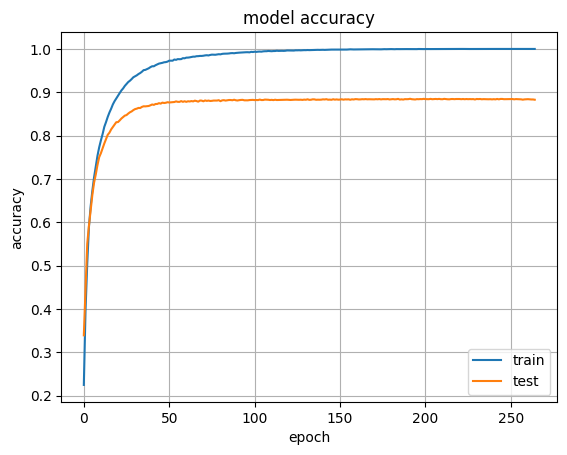

In [80]:
plot_history(baseline_training_42, 'acc')

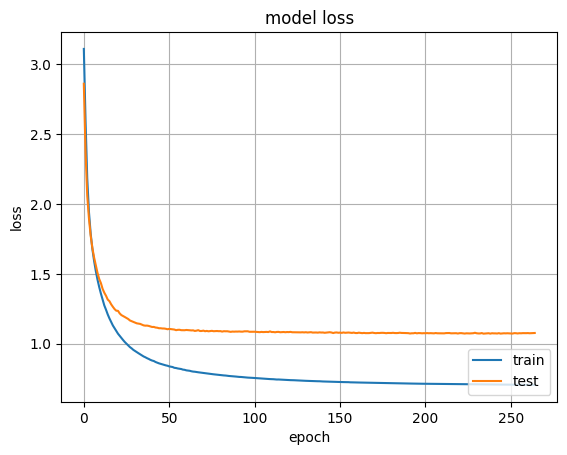

In [81]:
plot_history(baseline_training_42, 'loss')

In [84]:
# baseline_42.save_weights(".\weights_b_42.h5") # attuali 11 aprile

In [ ]:
# UNCOMMENT TO SAVE WEIGHTS
# baseline_42.save_weights(".\weights_b_42.h5") # attuali 14 marzo

### 1.2 Model 1

In [96]:
model_1_training_42 = model_1_42.fit(
                        X_train,
                        Y_train,
                        batch_size=32,
                        epochs=300,
                        validation_data=(X_validation, Y_validation),
                        callbacks=[early_stopping]
                        )

Epoch 1/300
62/62 [==============================] - 105s 2s/step - loss: 3.1094 - acc: 0.1826 - val_loss: 2.9339 - val_acc: 0.2897
Epoch 2/300
62/62 [==============================] - 87s 1s/step - loss: 2.5487 - acc: 0.3823 - val_loss: 2.2035 - val_acc: 0.4911
Epoch 3/300
62/62 [==============================] - 88s 1s/step - loss: 2.0413 - acc: 0.5390 - val_loss: 1.9389 - val_acc: 0.5797
Epoch 4/300
62/62 [==============================] - 92s 1s/step - loss: 1.8419 - acc: 0.6096 - val_loss: 1.8055 - val_acc: 0.6207
Epoch 5/300
62/62 [==============================] - 96s 2s/step - loss: 1.7178 - acc: 0.6513 - val_loss: 1.7203 - val_acc: 0.6444
Epoch 6/300
62/62 [==============================] - 95s 2s/step - loss: 1.6257 - acc: 0.6827 - val_loss: 1.6533 - val_acc: 0.6716
Epoch 7/300
62/62 [==============================] - 89s 1s/step - loss: 1.5544 - acc: 0.7096 - val_loss: 1.5839 - val_acc: 0.6949
Epoch 8/300
62/62 [==============================] - 89s 1s/step - loss: 1.4860 - 

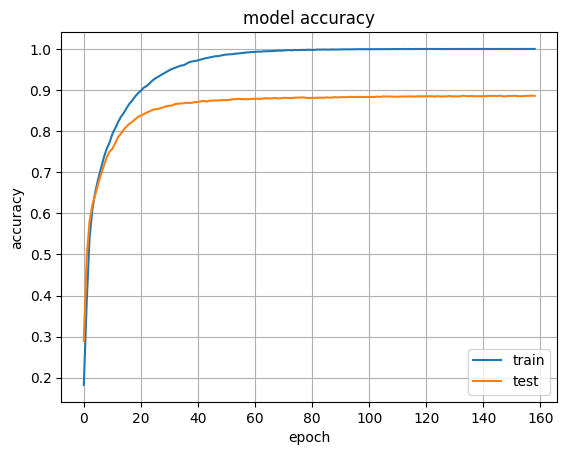

In [101]:
plot_history(model_1_training_42, 'acc')

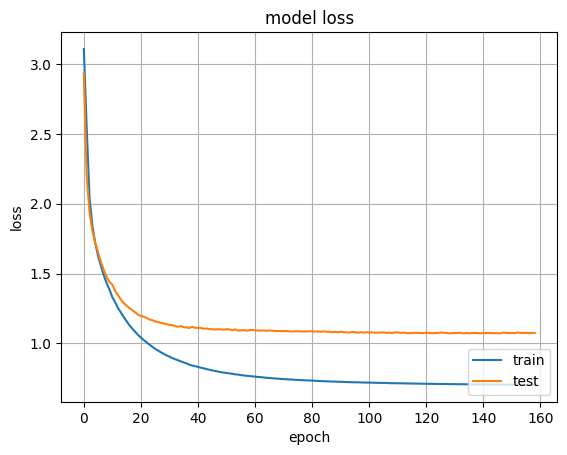

In [102]:
plot_history(model_1_training_42, 'loss')

In [100]:
# UNCOMMENT TO SAVE WEIGHTS
# model_1_42.save_weights(".\weights_b1_42.h5") # attuali 12 aprile

### 1.3 Model 2

In [78]:
model_2_training_42 = model_2_42.fit(
                        X_train,
                        Y_train,
                        batch_size=32,
                        epochs=300,
                        validation_data=(X_validation, Y_validation),
                        callbacks=[early_stopping]
                        )

Epoch 1/300




62/62 [==============================] - 48s 668ms/step - loss: 3.0437 - acc: 0.2490 - val_loss: 2.6718 - val_acc: 0.3606
Epoch 2/300
62/62 [==============================] - 37s 591ms/step - loss: 2.3507 - acc: 0.4425 - val_loss: 2.1367 - val_acc: 0.5080
Epoch 3/300
62/62 [==============================] - 37s 604ms/step - loss: 1.9963 - acc: 0.5615 - val_loss: 1.9098 - val_acc: 0.5905
Epoch 4/300
62/62 [==============================] - 36s 581ms/step - loss: 1.8081 - acc: 0.6241 - val_loss: 1.7775 - val_acc: 0.6286
Epoch 5/300
62/62 [==============================] - 36s 581ms/step - loss: 1.6857 - acc: 0.6654 - val_loss: 1.6855 - val_acc: 0.6620
Epoch 6/300
62/62 [==============================] - 36s 574ms/step - loss: 1.5904 - acc: 0.6985 - val_loss: 1.6110 - val_acc: 0.6887
Epoch 7/300
62/62 [==============================] - 36s 578ms/step - loss: 1.5177 - acc: 0.7246 - val_loss: 1.5543 - val_acc: 0.7077
Epoch 8/300
62/62 [==============================] - 36s 576ms/step - lo

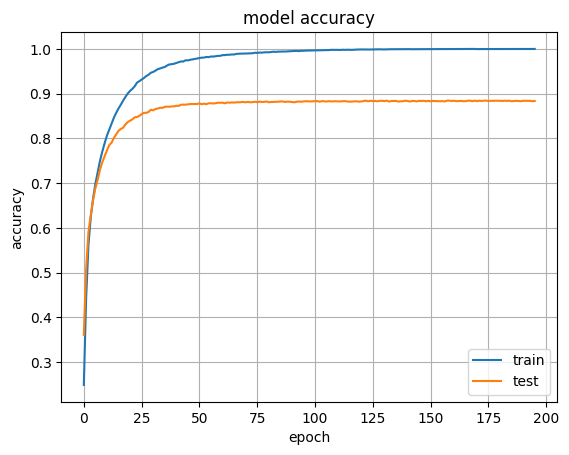

In [79]:
plot_history(model_2_training_42, 'acc')

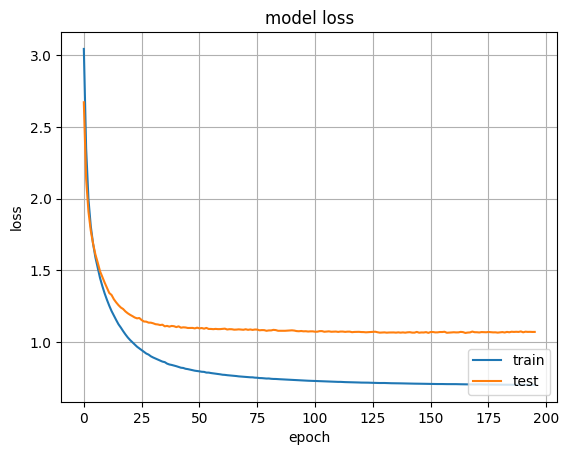

In [80]:
plot_history(model_2_training_42, 'loss')

In [82]:
# UNCOMMENT TO SAVE WEIGHTS
# model_2_42.save_weights(".\weights_b2_42.h5") # attuali 12 aprile

## 2. Seed 1 - 69

In [103]:
set_seeds(69)

### 2.1 Baseline

In [104]:
baseline_training_69 = baseline_69.fit(
                        X_train,
                        Y_train,
                        batch_size=32,
                        epochs=300,
                        validation_data=(X_validation, Y_validation),
                        callbacks=[early_stopping],
                        )

Epoch 1/300


62/62 [==============================] - 42s 587ms/step - loss: 3.1247 - acc: 0.2178 - val_loss: 2.8763 - val_acc: 0.3567
Epoch 2/300
62/62 [==============================] - 35s 564ms/step - loss: 2.6120 - acc: 0.3947 - val_loss: 2.3907 - val_acc: 0.4442
Epoch 3/300
62/62 [==============================] - 34s 549ms/step - loss: 2.1965 - acc: 0.4995 - val_loss: 2.0777 - val_acc: 0.5364
Epoch 4/300
62/62 [==============================] - 35s 567ms/step - loss: 1.9491 - acc: 0.5862 - val_loss: 1.8955 - val_acc: 0.5926
Epoch 5/300
62/62 [==============================] - 34s 554ms/step - loss: 1.7959 - acc: 0.6356 - val_loss: 1.7752 - val_acc: 0.6374
Epoch 6/300
62/62 [==============================] - 36s 574ms/step - loss: 1.6827 - acc: 0.6741 - val_loss: 1.6895 - val_acc: 0.6634
Epoch 7/300
62/62 [==============================] - 37s 603ms/step - loss: 1.5967 - acc: 0.7030 - val_loss: 1.6258 - val_acc: 0.6891
Epoch 8/300
62/62 [==============================] - 35s 563ms/step - loss

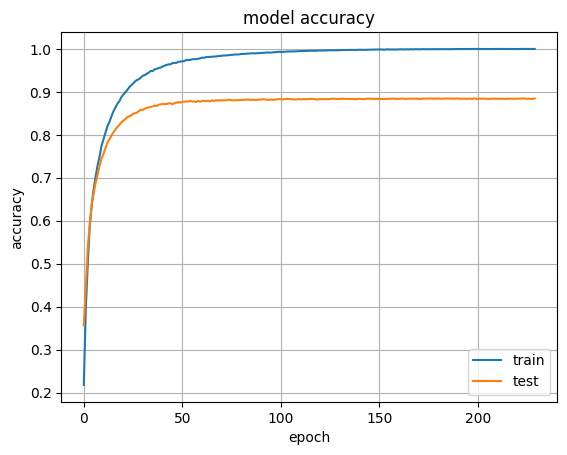

In [105]:
plot_history(baseline_training_69, 'acc')

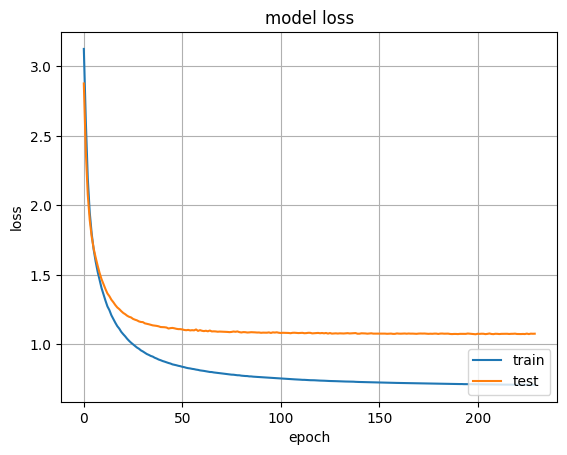

In [106]:
plot_history(baseline_training_69, 'loss')

In [108]:
# UNCOMMENT TO SAVE WEIGHTS
# baseline_69.save_weights(".\weights_b_69.h5") # attuali 12 aprile

### 2.2 Model 1

In [109]:
model_1_training_69 = model_1_69.fit(
                        X_train,
                        Y_train,
                        batch_size=32,
                        epochs=300,
                        validation_data=(X_validation, Y_validation),
                        callbacks=[early_stopping]
                        )

Epoch 1/300


62/62 [==============================] - 104s 2s/step - loss: 3.1202 - acc: 0.1736 - val_loss: 2.9523 - val_acc: 0.2644
Epoch 2/300
62/62 [==============================] - 91s 1s/step - loss: 2.5666 - acc: 0.3775 - val_loss: 2.2348 - val_acc: 0.4753
Epoch 3/300
62/62 [==============================] - 91s 1s/step - loss: 2.0489 - acc: 0.5345 - val_loss: 1.9647 - val_acc: 0.5668
Epoch 4/300
62/62 [==============================] - 91s 1s/step - loss: 1.8476 - acc: 0.6057 - val_loss: 1.8167 - val_acc: 0.6114
Epoch 5/300
62/62 [==============================] - 91s 1s/step - loss: 1.7237 - acc: 0.6492 - val_loss: 1.7146 - val_acc: 0.6516
Epoch 6/300
62/62 [==============================] - 91s 1s/step - loss: 1.6310 - acc: 0.6806 - val_loss: 1.6641 - val_acc: 0.6721
Epoch 7/300
62/62 [==============================] - 91s 1s/step - loss: 1.5606 - acc: 0.7072 - val_loss: 1.5869 - val_acc: 0.6948
Epoch 8/300
62/62 [==============================] - 91s 1s/step - loss: 1.4912 - acc: 0.7315 

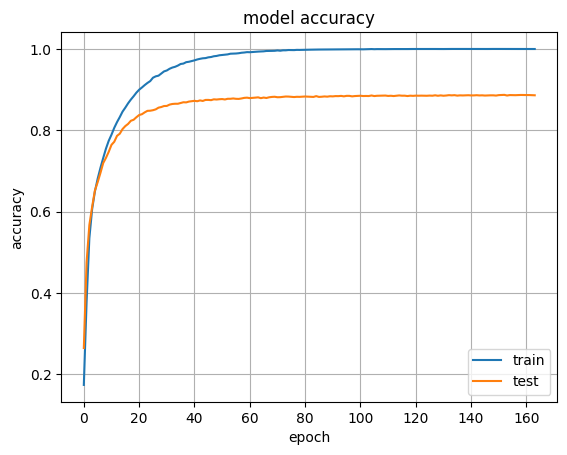

In [113]:
plot_history(model_1_training_69, 'acc')

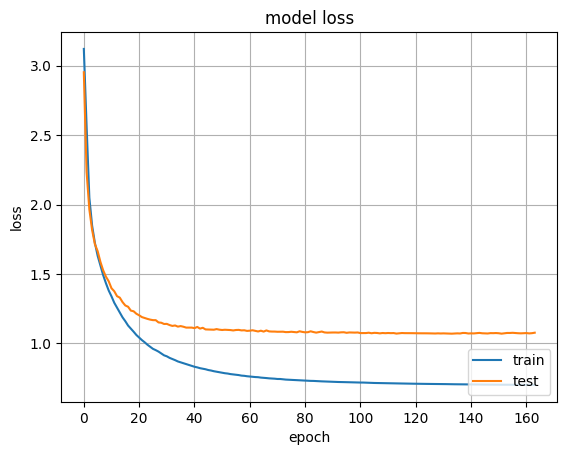

In [114]:
plot_history(model_1_training_69, 'loss')

In [112]:
# UNCOMMENT TO SAVE WEIGHTS
# model_1_69.save_weights(".\weights_b1_69.h5") # attuali 12 aprile

### 2.3 Model 2

In [126]:
model_2_training_69 = model_2_69.fit(
                        X_train,
                        Y_train,
                        batch_size=32,
                        epochs=300,
                        validation_data=(X_validation, Y_validation),
                        callbacks=[early_stopping]
                        )

Epoch 1/300


62/62 [==============================] - 32s 443ms/step - loss: 3.0977 - acc: 0.2275 - val_loss: 2.7697 - val_acc: 0.3473
Epoch 2/300
62/62 [==============================] - 27s 428ms/step - loss: 2.4213 - acc: 0.4233 - val_loss: 2.1789 - val_acc: 0.4948
Epoch 3/300
62/62 [==============================] - 27s 432ms/step - loss: 2.0239 - acc: 0.5512 - val_loss: 1.9333 - val_acc: 0.5873
Epoch 4/300
62/62 [==============================] - 27s 428ms/step - loss: 1.8239 - acc: 0.6210 - val_loss: 1.7875 - val_acc: 0.6246
Epoch 5/300
62/62 [==============================] - 28s 445ms/step - loss: 1.6922 - acc: 0.6650 - val_loss: 1.6952 - val_acc: 0.6578
Epoch 6/300
62/62 [==============================] - 28s 452ms/step - loss: 1.5954 - acc: 0.6978 - val_loss: 1.6089 - val_acc: 0.6902
Epoch 7/300
62/62 [==============================] - 26s 425ms/step - loss: 1.5174 - acc: 0.7274 - val_loss: 1.5528 - val_acc: 0.7064
Epoch 8/300
62/62 [==============================] - 26s 425ms/step - loss

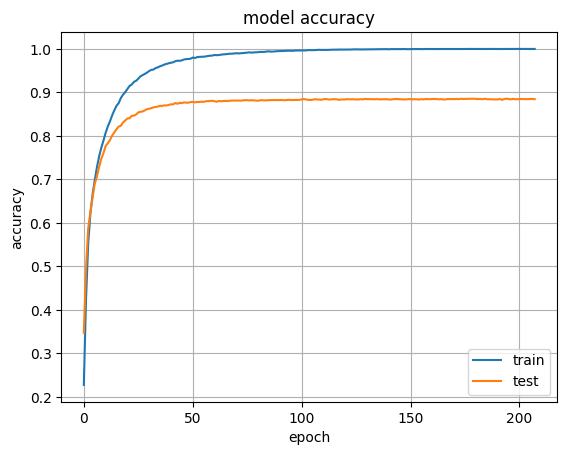

In [127]:
plot_history(model_2_training_69, 'acc')

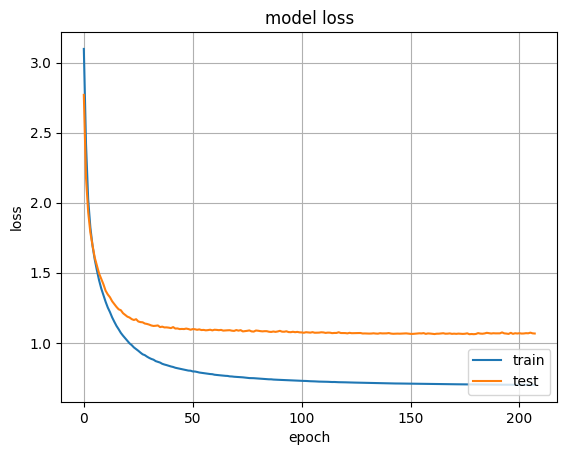

In [128]:
plot_history(model_2_training_69, 'loss')

In [129]:
# UNCOMMENT TO SAVE WEIGHTS
# model_2_69.save_weights(".\weights_b2_69.h5") # attuali 12 aprile

## 3. Seed 2 - 420

In [ ]:
set_seeds(420)

### 3.1 Baseline

In [ ]:
baseline_training_420 = baseline_420.fit(
                        X_train,
                        Y_train,
                        batch_size=32,
                        epochs=300,
                        validation_data=(X_validation, Y_validation),
                        callbacks=[early_stopping],
                        )

Epoch 1/300


62/62 [==============================] - 17s 183ms/step - loss: 3.4019 - acc: 0.0830 - val_loss: 3.2102 - val_acc: 0.2041
Epoch 2/300
62/62 [==============================] - 11s 174ms/step - loss: 3.1183 - acc: 0.2302 - val_loss: 3.0611 - val_acc: 0.2810
Epoch 3/300
62/62 [==============================] - 11s 173ms/step - loss: 2.9787 - acc: 0.2813 - val_loss: 2.9121 - val_acc: 0.3064
Epoch 4/300
62/62 [==============================] - 11s 174ms/step - loss: 2.8195 - acc: 0.3169 - val_loss: 2.7393 - val_acc: 0.3515
Epoch 5/300
62/62 [==============================] - 11s 176ms/step - loss: 2.6415 - acc: 0.3711 - val_loss: 2.5496 - val_acc: 0.4140
Epoch 6/300
62/62 [==============================] - 11s 174ms/step - loss: 2.4666 - acc: 0.4255 - val_loss: 2.3825 - val_acc: 0.4539
Epoch 7/300
62/62 [==============================] - 11s 176ms/step - loss: 2.3134 - acc: 0.4694 - val_loss: 2.2471 - val_acc: 0.4897
Epoch 8/300
62/62 [==============================] - 11s 174ms/step - loss

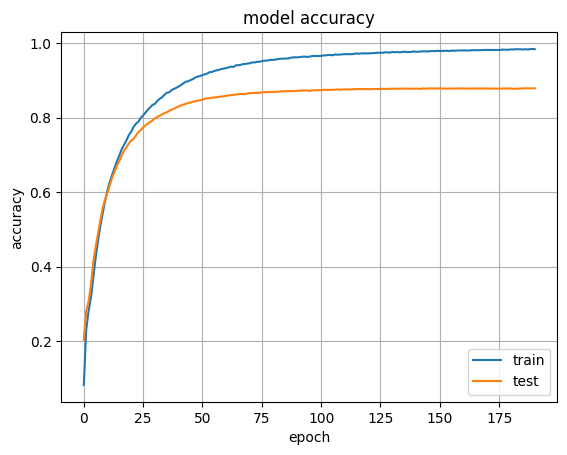

In [ ]:
plot_history(baseline_training_420, 'acc')

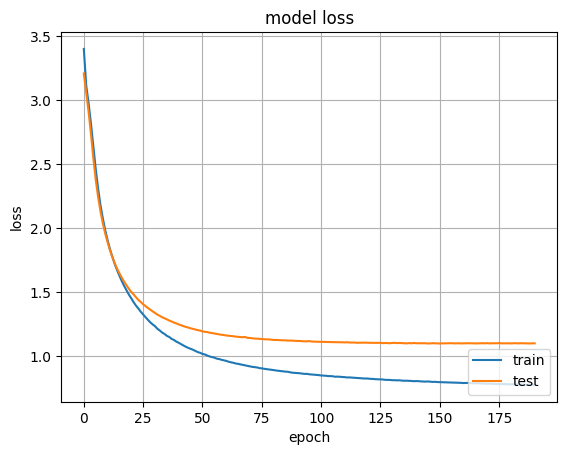

In [ ]:
plot_history(baseline_training_420, 'loss')

In [ ]:
# UNCOMMENT TO SAVE WEIGHTS
# baseline_420.save_weights(".\weights_b_420.h5") # attuali 15 marzo

### 3.2 Model 1

In [ ]:
model_1_training_420 = model_1_420.fit(
                        X_train,
                        Y_train,
                        batch_size=32,
                        epochs=300,
                        validation_data=(X_validation, Y_validation),
                        callbacks=[early_stopping]
                        )

Epoch 1/300
62/62 [==============================] - 27s 262ms/step - loss: 3.3162 - acc: 0.1002 - val_loss: 3.1836 - val_acc: 0.1592
Epoch 2/300
62/62 [==============================] - 16s 257ms/step - loss: 3.1376 - acc: 0.1626 - val_loss: 3.1199 - val_acc: 0.1640
Epoch 3/300
62/62 [==============================] - 16s 256ms/step - loss: 3.0766 - acc: 0.1940 - val_loss: 3.0451 - val_acc: 0.2298
Epoch 4/300
62/62 [==============================] - 16s 255ms/step - loss: 2.9743 - acc: 0.2514 - val_loss: 2.8977 - val_acc: 0.2945
Epoch 5/300
62/62 [==============================] - 16s 256ms/step - loss: 2.7963 - acc: 0.3189 - val_loss: 2.6589 - val_acc: 0.3610
Epoch 6/300
62/62 [==============================] - 16s 257ms/step - loss: 2.5712 - acc: 0.3853 - val_loss: 2.4333 - val_acc: 0.4279
Epoch 7/300
62/62 [==============================] - 16s 257ms/step - loss: 2.3719 - acc: 0.4403 - val_loss: 2.2645 - val_acc: 0.4750
Epoch 8/300
62/62 [==============================] - 16s 260ms

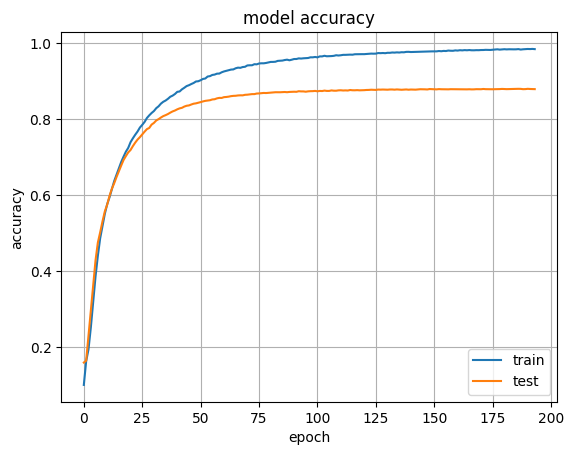

In [ ]:
plot_history(model_1_training_420, 'acc')

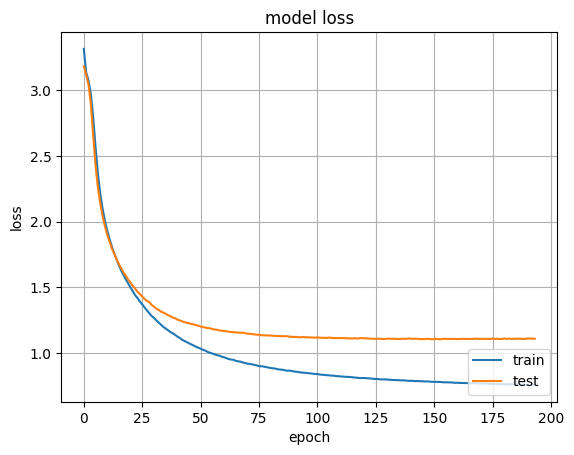

In [ ]:
plot_history(model_1_training_420, 'loss')

In [ ]:
# UNCOMMENT TO SAVE WEIGHTS
# model_1_420.save_weights(".\weights_b1_420.h5") # attuali 15 marzo

### 3.3 Model 2

In [ ]:
model_2_training_420 = model_2_420.fit(
                        X_train,
                        Y_train,
                        batch_size=32,
                        epochs=300,
                        validation_data=(X_validation, Y_validation),
                        callbacks=[early_stopping]
                        )

Epoch 1/300
62/62 [==============================] - 19s 192ms/step - loss: 3.4600 - acc: 0.0633 - val_loss: 3.2359 - val_acc: 0.1618
Epoch 2/300
62/62 [==============================] - 11s 175ms/step - loss: 3.1434 - acc: 0.1989 - val_loss: 3.0661 - val_acc: 0.2690
Epoch 3/300
62/62 [==============================] - 10s 163ms/step - loss: 2.9733 - acc: 0.2766 - val_loss: 2.8641 - val_acc: 0.3186
Epoch 4/300
62/62 [==============================] - 11s 172ms/step - loss: 2.7486 - acc: 0.3358 - val_loss: 2.6119 - val_acc: 0.3759
Epoch 5/300
62/62 [==============================] - 10s 165ms/step - loss: 2.5185 - acc: 0.3972 - val_loss: 2.3988 - val_acc: 0.4401
Epoch 6/300
62/62 [==============================] - 10s 165ms/step - loss: 2.3329 - acc: 0.4471 - val_loss: 2.2445 - val_acc: 0.4750
Epoch 7/300
62/62 [==============================] - 10s 167ms/step - loss: 2.1918 - acc: 0.4886 - val_loss: 2.1228 - val_acc: 0.5128
Epoch 8/300
62/62 [==============================] - 10s 165ms

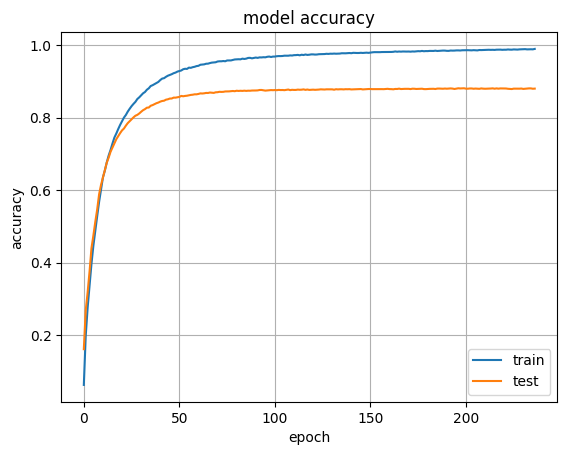

In [ ]:
plot_history(model_2_training_420, 'acc')

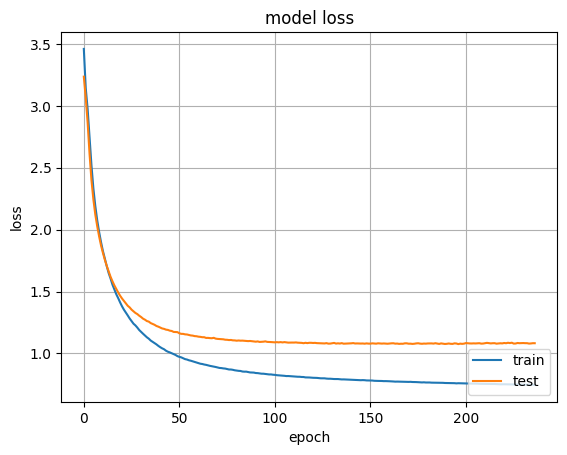

In [ ]:
plot_history(model_2_training_420, 'loss')

In [ ]:
# UNCOMMENT TO SAVE WEIGHTS
# model_2_420.save_weights(".\weights_b2_420.h5") # attuali 15 marzo

## 4. Loading the weights 

In [90]:
# UNCOMMENT TO LOAD WEIGHTS
baseline_42.load_weights(".\weights_b_42.h5")
model_1_42.load_weights(".\weights_b1_42.h5")
model_2_42.load_weights(".\weights_b2_42.h5")

baseline_69.load_weights(".\weights_b_69.h5")
model_1_69.load_weights(".\weights_b1_69.h5")
model_2_69.load_weights(".\weights_b2_69.h5")

# baseline_420.load_weights(".\weights_b_420.h5")
# model_1_420.load_weights(".\weights_b1_420.h5")
# model_2_420.load_weights(".\weights_b2_420.h5")

Once again we reset the seed to 42 (our "global seed")

In [130]:
set_seeds(global_seed)

## 5. Visualizing some of the predictions

Just for the sake of visualization, we want to decode the produced tags, and map them back to their string values.

Also, we want the (garbage) prediction of the pad values to be cut off from the output.

The function `decode_tags`, [previously defined](#decode), does both things.

### 5.1 Predicting the validation set with our models (for all the 3 random seeds)

In [131]:
# Here the seed is already 42

pred_baseline_42 = baseline_42.predict(X_validation)
pred_model_1_42 = model_1_42.predict(X_validation)
pred_model_2_42 = model_2_42.predict(X_validation)

 3/41 [=>............................] - ETA: 0s

41/41 [==============================] - 1s 26ms/step


In [132]:
# Seed 1 - 69

set_seeds(69)

pred_baseline_69 = baseline_69.predict(X_validation)
pred_model_1_69 = model_1_69.predict(X_validation)
pred_model_2_69 = model_2_69.predict(X_validation)

 3/41 [=>............................] - ETA: 0s

41/41 [==============================] - 2s 27ms/step


In [ ]:
# Seed 2 - 420

set_seeds(420)

pred_baseline_420 = baseline_420.predict(X_validation)
pred_model_1_420 = model_1_420.predict(X_validation)
pred_model_2_420 = model_2_420.predict(X_validation)

41/41 [==============================] - 1s 11ms/step


In [133]:
print(f"Raw predictions look like this: \n\n{pred_baseline_42[0]}")
print(pred_baseline_42.shape)

Raw predictions look like this: 

[[3.9711362e-01 8.7655544e-02 6.0761198e-02 ... 4.4266464e-05
  2.5787767e-05 2.5463036e-05]
 [3.9711362e-01 8.7655544e-02 6.0761198e-02 ... 4.4266464e-05
  2.5787767e-05 2.5463036e-05]
 [3.9711362e-01 8.7655544e-02 6.0761198e-02 ... 4.4266464e-05
  2.5787767e-05 2.5463036e-05]
 ...
 [2.1486271e-03 9.0813947e-01 1.9448044e-03 ... 1.6454108e-03
  2.0554338e-03 1.8232900e-03]
 [1.5997059e-03 1.8089968e-03 2.3415159e-03 ... 2.1649429e-03
  1.7810119e-03 1.5748733e-03]
 [8.0026028e-04 9.6013486e-01 6.4418674e-04 ... 8.7063794e-04
  9.7883877e-04 1.0325798e-03]]
(1299, 75, 46)


### 5.2 Decoding the raw predictions for the validation set

In [117]:
TEST_SPLIT = 3262 # TEST_SPLIT is the first row of the test set

VAL_FIRST = 1963
VAL_LAST = 3261

In [94]:
# Seed 0 - 42

y_pred_baseline_42_val, y_pred_baseline_42_val_int = decode_tags(y_true=Y_encoded[VAL_FIRST:VAL_LAST+1], y_pred_encoded = pred_baseline_42)
y_pred_model_1_42_val, y_pred_model_1_42_val_int = decode_tags(y_true=Y_encoded[VAL_FIRST:VAL_LAST+1], y_pred_encoded = pred_model_1_42)
y_pred_model_2_42_val, y_pred_model_2_42_val_int = decode_tags(y_true=Y_encoded[VAL_FIRST:VAL_LAST+1], y_pred_encoded = pred_model_2_42)

Done.
Done.
Done.


In [134]:
# Seed 1 - 69

y_pred_baseline_69_val, y_pred_baseline_69_val_int = decode_tags(y_true=Y_encoded[VAL_FIRST:VAL_LAST+1], y_pred_encoded = pred_baseline_69)
y_pred_model_1_69_val, y_pred_model_1_69_val_int = decode_tags(y_true=Y_encoded[VAL_FIRST:VAL_LAST+1], y_pred_encoded = pred_model_1_69)
y_pred_model_2_69_val, y_pred_model_2_69_val_int = decode_tags(y_true=Y_encoded[VAL_FIRST:VAL_LAST+1], y_pred_encoded = pred_model_2_69)

Done.
Done.
Done.


In [ ]:
# Seed 2 - 420

y_pred_baseline_420_val, y_pred_baseline_420_val_int = decode_tags(y_true=Y_encoded[VAL_FIRST:VAL_LAST+1], y_pred_encoded = pred_baseline_420)
y_pred_model_1_420_val, y_pred_model_1_420_val_int = decode_tags(y_true=Y_encoded[VAL_FIRST:VAL_LAST+1], y_pred_encoded = pred_model_1_420)
y_pred_model_2_420_val, y_pred_model_2_420_val_int = decode_tags(y_true=Y_encoded[VAL_FIRST:VAL_LAST+1], y_pred_encoded = pred_model_2_420)

Done.
Done.
Done.


## 6. Visualizing some of the predictions

<b>Note</b>: For simplicity we show only an example using the seed 0 - 42

In [135]:
for i in range(10):
    print(f"X_validation[{i}]:                     {' '.join(df['sentence'].iloc[VAL_FIRST+i])}")
    print(f"y_validation_true[{i}]:                {df['tagging'].iloc[VAL_FIRST+i]}")

    print(f"y_pred_baseline_42_val[{i}]:           {y_pred_baseline_42_val[i]}")
    print(f"y_pred_model_1_42_val[{i}]:            {y_pred_model_1_42_val[i]}")
    print(f"y_pred_model_2_42_val[{i}]:            {y_pred_model_2_42_val[i]}")


    misclassified_baseline_42 = [token_pred for token_pred, token_true in zip(y_pred_baseline_42_val[i], df['tagging'].iloc[VAL_FIRST+i]) if token_pred != token_true]
    misclassified_model_1_42 = [token_pred for token_pred, token_true in zip(y_pred_model_1_42_val[i], df['tagging'].iloc[VAL_FIRST+i]) if token_pred != token_true]
    misclassified_model_2_42 = [token_pred for token_pred, token_true in zip(y_pred_model_2_42_val[i], df['tagging'].iloc[VAL_FIRST+i]) if token_pred != token_true]

    print(f"Misclassified (baseline_42):         {len(misclassified_baseline_42)}")
    print(f"Misclassified (model1_42):           {len(misclassified_model_1_42)}")
    print(f"Misclassified (model2_42):           {len(misclassified_model_2_42)}")
    print("\n")

X_validation[0]:                     A House-Senate conference approved major portions of a package for more than $ 500 million in economic aid for Poland that relies heavily on $ 240 million in credit and loan guarantees in fiscal 1990 in hopes of stimulating future trade and investment
y_validation_true[0]:                ['DT', 'NNP', 'NN', 'VBD', 'JJ', 'NNS', 'IN', 'DT', 'NN', 'IN', 'JJR', 'IN', '$', 'CD', 'CD', 'IN', 'JJ', 'NN', 'IN', 'NNP', 'WDT', 'VBZ', 'RB', 'IN', '$', 'CD', 'CD', 'IN', 'NN', 'CC', 'NN', 'NNS', 'IN', 'JJ', 'CD', 'IN', 'NNS', 'IN', 'VBG', 'JJ', 'NN', 'CC', 'NN']
y_pred_baseline_42_val[0]:           ['DT', 'NNP', 'NN', 'VBD', 'JJ', 'NN', 'IN', 'DT', 'NN', 'IN', 'JJR', 'IN', '$', 'CD', 'CD', 'IN', 'JJ', 'NN', 'IN', 'NNP', 'WDT', 'NNP', 'RB', 'IN', '$', 'NN', 'CD', 'IN', 'NN', 'CC', 'NN', 'NN', 'IN', 'JJ', 'CD', 'IN', 'NNS', 'IN', 'NNP', 'JJ', 'NN', 'CC', 'NN']
y_pred_model_1_42_val[0]:            ['DT', 'JJ', 'NN', 'VBD', 'JJ', 'NN', 'IN', 'DT', 'NN', 'IN', 'JJR',

## 7. Evaluation

In [136]:
y_true_val = df[df["split"] == "validation"]["tagging"]
y_true_test = df[df["split"] == "test"]["tagging"]

### Seed 0 - 42

In [137]:
set_seeds(42)

In [98]:
# Seed 0 - 42

f1_baseline_42, report_baseline_42 = evaluation(y_true_val, y_pred_baseline_42_val)
f1_model_1_42, report_model_1_42 = evaluation(y_true_val, y_pred_model_1_42_val)
f1_model_2_42, report_model_2_42 = evaluation(y_true_val, y_pred_model_2_42_val)

In [139]:
# Seed 1 - 69

f1_baseline_69, report_baseline_69 = evaluation(y_true_val, y_pred_baseline_69_val)
f1_model_1_69, report_model_1_69 = evaluation(y_true_val, y_pred_model_1_69_val)
f1_model_2_69, report_model_2_69 = evaluation(y_true_val, y_pred_model_2_69_val)

In [ ]:
# Seed 2 - 420

f1_baseline_420, report_baseline_420 = evaluation(y_true_val, y_pred_baseline_420_val)
f1_model_1_420, report_model_1_420 = evaluation(y_true_val, y_pred_model_1_420_val)
f1_model_2_420, report_model_2_420 = evaluation(y_true_val, y_pred_model_2_420_val)

### Seed 0 - 42

In [140]:
print(report_baseline_42)

              precision    recall  f1-score   support

           ,       0.00      0.00      0.00         0
       -LRB-       1.00      1.00      1.00        50
       -RRB-       0.98      1.00      0.99        51
           :       0.00      0.00      0.00         0
          CC       0.99      0.99      0.99       758
          CD       0.94      0.80      0.87      1248
          DT       0.98      0.99      0.99      2752
          EX       0.94      1.00      0.97        34
          FW       0.00      0.00      0.00         2
          IN       0.98      0.97      0.98      3271
          JJ       0.73      0.78      0.75      1923
         JJR       0.92      0.74      0.82       165
         JJS       0.96      0.86      0.91        58
          LS       1.00      0.67      0.80         3
          MD       1.00      0.97      0.98       347
          NN       0.79      0.87      0.83      4510
         NNP       0.76      0.77      0.76      2696
        NNPS       0.75    

In [141]:
print(report_model_1_42)

              precision    recall  f1-score   support

           ,       0.00      0.00      0.00         0
       -LRB-       0.98      1.00      0.99        50
       -RRB-       0.98      0.96      0.97        51
           :       0.00      0.00      0.00         0
          CC       0.99      0.99      0.99       758
          CD       0.92      0.85      0.89      1248
          DT       0.98      0.99      0.99      2752
          EX       0.97      1.00      0.99        34
          FW       0.00      0.00      0.00         2
          IN       0.98      0.97      0.98      3271
          JJ       0.70      0.80      0.75      1923
         JJR       0.92      0.73      0.81       165
         JJS       0.94      0.81      0.87        58
          LS       1.00      0.33      0.50         3
          MD       1.00      0.97      0.98       347
          NN       0.82      0.85      0.84      4510
         NNP       0.78      0.77      0.77      2696
        NNPS       0.62    

In [101]:
print(report_model_2_42)

              precision    recall  f1-score   support

           ,       0.00      0.00      0.00         0
       -LRB-       1.00      1.00      1.00        50
       -RRB-       1.00      1.00      1.00        51
           :       0.00      0.00      0.00         0
          CC       0.99      0.99      0.99       758
          CD       0.92      0.83      0.87      1248
          DT       0.98      0.99      0.99      2752
          EX       0.94      1.00      0.97        34
          FW       0.00      0.00      0.00         2
          IN       0.98      0.98      0.98      3271
          JJ       0.71      0.78      0.75      1923
         JJR       0.91      0.74      0.82       165
         JJS       0.90      0.81      0.85        58
          LS       1.00      0.33      0.50         3
          MD       1.00      0.97      0.98       347
          NN       0.83      0.83      0.83      4510
         NNP       0.76      0.78      0.77      2696
        NNPS       0.72    

In [102]:
print(f"F1 of the baseline (seed = 42):     {f1_baseline_42:.4f}")
print(f"F1 of model1  (seed = 42):          {f1_model_1_42:.4f}")
print(f"F1 of model2  (seed = 42):          {f1_model_2_42:.4f}")

F1 of the baseline (seed = 42):     0.7434
F1 of model1  (seed = 42):          0.7268
F1 of model2  (seed = 42):          0.7272


### Seed 1 - 69

In [142]:
print(report_baseline_69)

              precision    recall  f1-score   support

           ,       0.00      0.00      0.00         0
       -LRB-       1.00      1.00      1.00        50
       -RRB-       1.00      1.00      1.00        51
           :       0.00      0.00      0.00         0
          CC       0.99      0.99      0.99       758
          CD       0.93      0.82      0.87      1248
          DT       0.99      0.99      0.99      2752
          EX       0.94      1.00      0.97        34
          FW       0.00      0.00      0.00         2
          IN       0.98      0.98      0.98      3271
          JJ       0.71      0.79      0.75      1923
         JJR       0.88      0.73      0.80       165
         JJS       0.92      0.84      0.88        58
          LS       1.00      0.33      0.50         3
          MD       1.00      0.97      0.98       347
          NN       0.80      0.86      0.83      4510
         NNP       0.77      0.77      0.77      2696
        NNPS       0.79    

In [143]:
print(report_model_1_69)

              precision    recall  f1-score   support

           ,       0.00      0.00      0.00         0
       -LRB-       0.98      1.00      0.99        50
       -RRB-       1.00      0.98      0.99        51
           :       0.00      0.00      0.00         0
          CC       0.99      0.99      0.99       758
          CD       0.94      0.84      0.89      1248
          DT       0.98      0.99      0.99      2752
          EX       0.97      1.00      0.99        34
          FW       0.00      0.00      0.00         2
          IN       0.98      0.97      0.98      3271
          JJ       0.71      0.79      0.75      1923
         JJR       0.87      0.74      0.80       165
         JJS       0.96      0.84      0.90        58
          LS       0.00      0.00      0.00         3
          MD       1.00      0.97      0.98       347
          NN       0.82      0.86      0.84      4510
         NNP       0.78      0.77      0.78      2696
        NNPS       0.64    

In [144]:
print(report_model_2_69)

              precision    recall  f1-score   support

           ,       0.00      0.00      0.00         0
       -LRB-       1.00      1.00      1.00        50
       -RRB-       0.98      0.98      0.98        51
           :       0.00      0.00      0.00         0
          CC       0.99      0.99      0.99       758
          CD       0.95      0.82      0.88      1248
          DT       0.98      0.99      0.99      2752
          EX       0.97      1.00      0.99        34
          FW       0.00      0.00      0.00         2
          IN       0.98      0.97      0.98      3271
          JJ       0.72      0.78      0.75      1923
         JJR       0.89      0.75      0.82       165
         JJS       0.96      0.81      0.88        58
          LS       1.00      0.33      0.50         3
          MD       1.00      0.97      0.98       347
          NN       0.81      0.86      0.83      4510
         NNP       0.79      0.76      0.78      2696
        NNPS       0.75    

In [145]:
print(f"F1 of the baseline (seed = 69):     {f1_baseline_69:.4f}")
print(f"F1 of model1  (seed = 69):          {f1_model_1_69:.4f}")
print(f"F1 of model2  (seed = 69):          {f1_model_2_69:.4f}")

F1 of the baseline (seed = 69):     0.7317
F1 of model1  (seed = 69):          0.7174
F1 of model2  (seed = 69):          0.7327


### Seed 2 - 420

In [ ]:
print(report_baseline_420)

              precision    recall  f1-score   support

           $       0.00      0.00      0.00         0
          ''       0.00      0.00      0.00         0
           ,       0.00      0.00      0.00         0
       -LRB-       0.80      0.82      0.81        50
       -RRB-       0.78      0.84      0.81        51
           .       0.00      0.00      0.00         0
           :       0.00      0.00      0.00         0
          CC       0.86      0.83      0.85       758
          CD       0.79      0.67      0.73      1248
          DT       0.85      0.84      0.84      2751
          EX       0.86      0.88      0.87        34
          FW       0.00      0.00      0.00         2
          IN       0.82      0.82      0.82      3270
          JJ       0.62      0.68      0.65      1924
         JJR       0.72      0.61      0.66       165
         JJS       0.60      0.74      0.66        58
          LS       0.00      0.00      0.00         3
          MD       0.84    

In [ ]:
print(report_model_1_420)

              precision    recall  f1-score   support

       -LRB-       1.00      1.00      1.00        50
       -RRB-       1.00      0.98      0.99        51
          CC       0.99      0.99      0.99       758
          CD       0.92      0.80      0.86      1248
          DT       0.99      0.99      0.99      2751
          EX       0.97      1.00      0.99        34
          FW       0.00      0.00      0.00         2
          IN       0.99      0.98      0.98      3270
          JJ       0.70      0.79      0.75      1924
         JJR       0.93      0.79      0.86       165
         JJS       0.75      0.91      0.82        58
          LS       0.00      0.00      0.00         3
          MD       1.00      0.97      0.98       347
          NN       0.81      0.86      0.84      4509
         NNP       0.80      0.74      0.77      2698
        NNPS       0.40      0.06      0.11        99
         NNS       0.79      0.79      0.79      2101
         PDT       0.00    

In [ ]:
print(report_model_2_420)

              precision    recall  f1-score   support

           ,       0.00      0.00      0.00         0
       -LRB-       1.00      1.00      1.00        50
       -RRB-       1.00      1.00      1.00        51
          CC       0.99      0.99      0.99       758
          CD       0.95      0.77      0.85      1248
          DT       0.99      0.99      0.99      2751
          EX       0.92      1.00      0.96        34
          FW       0.00      0.00      0.00         2
          IN       0.99      0.98      0.98      3270
          JJ       0.66      0.81      0.73      1924
         JJR       0.88      0.74      0.81       165
         JJS       0.94      0.84      0.89        58
          LS       0.00      0.00      0.00         3
          MD       1.00      0.97      0.98       347
          NN       0.80      0.87      0.84      4509
         NNP       0.81      0.76      0.78      2698
        NNPS       0.79      0.11      0.19        99
         NNS       0.86    

In [116]:
print(f"F1 of the baseline (seed = 420):     {f1_baseline_420:.4f}")
print(f"F1 of model1  (seed = 420):          {f1_model_1_420:.4f}")
print(f"F1 of model2  (seed = 420):          {f1_model_2_420:.4f}")

NameError: name 'f1_baseline_420' is not defined

Let's now visualize all the f1s together

In [ ]:
# Let us put all the f1 scores into a pandas dataframe


f1_scores = {
    'baseline': [f1_baseline_42, f1_baseline_69, f1_baseline_420],
    'model1': [f1_model_1_42, f1_model_1_69, f1_model_1_420],
    'model2': [f1_model_2_42, f1_model_2_69, f1_model_2_420]
}

seeds = [42, 69, 420]

df_F1 = pd.DataFrame(f1_scores, index=seeds)
df_F1 = df_F1.T
df_F1.columns = seeds
df_F1['average'] = df_F1.mean(axis=1) 

print(df_F1) 

                42        69       420   average
baseline  0.661999  0.688602  0.551395  0.633999
model1    0.649558  0.734053  0.729889  0.704500
model2    0.758551  0.712693  0.744650  0.738631


# Section 6 - Error Analysis

## Overview

We are now going to evaluate our best performing model, namely **"model 2"**, the one with 2 dense layers and seed 42.

We will study the errors made by the model, both in Validation and Test Sets by considering 3 points of view: 
 - We see which are the most frequently misclassified tags, **in absolute**
 - We look for the tags which are learnt the worst by the model, i.e. which ones are misclassified the most **with respect to their support**
 - We visualize **the most frequent (y_true, y_pred) couples**, within the wrong predictions, to see which tags the model has more trouble to tell apart
 - We print some of these mistakes


### Index

0. **Utils**
    1. Dropping model-specific names
    2. Utils for storing the predictions (and the errors) into dataframes
    3. Utils for plotting the **histograms**
    4. Utils for printing **error-specific mistakes**
    5. Utils for **precision-recall curves**

1. **Error frequency** analysis for the **Validation Set**
    1. **Absolute** error frequency
    2. **Relative** error frequency
    3. **Most requent** errors
    4. Visualizing **mistaken tags** within the sentences of the Validation Set

2. **Error frequency** analysis for the **Test Set**
    1. **Absolute** error frequency
    2. **Relative** error frequency
    3. **Most requent** errors
    4. Visualizing **mistaken tags** within the sentences of the Test Set

3. **Frequencies of tags** among the Train, Validation and Test Set
    1. Distribution of the **hardest tags to classify**
    2. Distribution of the **"nouns" tags**

4. **Precision-recall** curves
    1. Precision-recall curves for **absolute frequency ordered tags**
    2. Precision-recall curves for **misclassification relative frequency ordered** tags
    
5. **Confusion Matrices**
    1. **Validation** Set
    2. **Test** Set

## 0. Utils

In [ ]:
from collections import Counter
from sklearn.metrics import precision_recall_curve

### 0.1 Dropping model-specific names

From now on, we will drop the model-specific names, as we only care for 'model_2_42'

In [ ]:
# Sentences
Sentences_val = df['sentence'][df["split"] == "validation"]
Sentences_test = df['sentence'][df["split"] == "test"]

# Renaming Validation Set predicted labels
raw_pred_val = pred_model_2_42
y_pred_val = y_pred_model_2_42_val

# Producing Test Set labels for the first time
raw_pred_test = model_2_42.predict(X_test)
y_pred_test, _ = decode_tags(y_true=Y_encoded[TEST_SPLIT:], y_pred_encoded = raw_pred_test)

21/21 [==============================] - 1s 12ms/step
Done.


### 0.2 Utils for storing the predictions (and the errors) into dataframes

In [ ]:
'''
First, we define a function that aggregates the errors.
In particular, we define two structures:
- a dataframe containing all misclassified (y_true, y_pred) couples;
- a dataframe containing all predictions, good or bad, each of which is indicated as classified "correctly" or "incorrectly"
'''
def errors_report(y_true, y_pred):
    # As always we need to (1) chop the sentences if they surpass MAX_SEQ_LEN, (2) explode them into a single flow of tags, and (3) filter them to avoid punctuation
    y_true_all, y_pred_all = chop_and_explode(y_true, y_pred)
    y_true_to_consider, y_pred_to_consider = filter_tags(y_true_all, y_pred_all, tags_to_consider)

    # We define the two structures as lists...
    misclassified_tags = [[token_true, token_pred] for token_true, token_pred in zip(y_true_to_consider, y_pred_to_consider) if token_pred != token_true]
    is_misclassified = [[token_true, "incorrectly" if token_pred != token_true else "correctly"] for token_true, token_pred in zip(y_true_to_consider, y_pred_to_consider)]

    # ...and convert the lists into dataframes
    misclassified_tags_df = pd.DataFrame(misclassified_tags, columns=["True", "Pred"])
    is_misclassified_df = pd.DataFrame(is_misclassified, columns=['Tag', 'Classified'])

    return misclassified_tags, is_misclassified, misclassified_tags_df, is_misclassified_df

'''
We use these two dataframes to infer some global statistics about the errors.
We want to investigate:
- which tags are misclassified more often;
- which are the most frequent (y_true, y_pred) error couples.
'''
def errors_counts(misclassified_tags):
    misclassified_couples = [(true, pred) for true, pred in misclassified_tags]
    misclassified_true_tags = [true for true, _ in misclassified_tags]

    misclassified_true_counts = pd.DataFrame(Counter(misclassified_true_tags).items(), columns=['Tag', 'Count']).sort_values(by="Count", ascending=False)
    misclassified_couples_counts = pd.DataFrame(Counter(misclassified_couples).items(), columns=['(True, Pred)', 'Count']).sort_values(by="Count", ascending=False)

    return misclassified_couples, misclassified_true_tags, misclassified_true_counts, misclassified_couples_counts

### 0.3 Utils for plotting the histograms

In [ ]:
'''
Now, some utils that will help us plot the histograms
without having to repeat everything between the analysis
of validation and test set.
'''

def plot_absolute_error_frequency(misclassified_true_counts, is_misclassified_df):
    tags_counts = pd.DataFrame(Counter(is_misclassified_df['Tag']).items(), columns=['Tag', 'Count']).sort_values(by="Count", ascending=False)
    plt.figure(figsize=(20,14))
    plt.subplot(2,1,1)
    plt.title("Absolute Error Frequency")
    sns.barplot(data=misclassified_true_counts, x = 'Tag', y= 'Count')
    for i, p in enumerate(plt.gca().patches):
        plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')
    plt.subplot(2,1,2)
    plt.title("Tags Frequency")
    sns.barplot(data=tags_counts, x = 'Tag', y = 'Count')
    for i, p in enumerate(plt.gca().patches):
        plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')
    plt.show()

def plot_relative_error_frequency(misclassified_true_counts, is_misclassified_df):
    tags_counts = pd.DataFrame(Counter(is_misclassified_df['Tag']).items(), columns=['Tag', 'Count']).sort_values(by="Count", ascending=False)
    relative_error_frequency = []
    list_of_tags = []
    print("Highly misclassified tags:")
    for tag in misclassified_true_counts['Tag']:
        absolute_error_frequency = misclassified_true_counts[misclassified_true_counts['Tag'] == tag]['Count'].iloc[0]
        support = tags_counts[tags_counts['Tag'] == tag]['Count'].iloc[0]
        list_of_tags.append(tag)
        relative_error_frequency.append(absolute_error_frequency/support)
        if absolute_error_frequency/support > 0.25 and support > 50 or absolute_error_frequency/support >= 0.3:
            if support < 50: print(f"[RARE TAG] Support: {support}")
            print(f"- {tag}:")
            print(f"  Total errors: {absolute_error_frequency}")
            print(f"  Support: {support}")
            print(f"  Relative Error Frequency: {absolute_error_frequency/support: .2f}")
            print("")

    relative_error_frequency_df = pd.DataFrame({'Tag': list_of_tags, 'Relative Error Frequency': relative_error_frequency}).sort_values(by='Relative Error Frequency', ascending=False)

    plt.figure(figsize=(20,6))
    plt.title('Relative Error Frequency')
    sns.barplot(data=relative_error_frequency_df, x='Tag', y='Relative Error Frequency')
    for i, p in enumerate(plt.gca().patches):
        plt.gca().annotate(f"{int(p.get_height()*100)}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')
    plt.show()

    return relative_error_frequency_df

### 0.4 Utils for printing error-specific mistakes

In [ ]:
'''
Finally, a function that shows up to 5 pieces of sentences with a given (y_true, y_pred) couple.
It will be useful to visualize some specific mistakes.
'''
def show_predictions(true_tag, pred_tag, X, y_true, y_pred):
    # We need to chop the sentences that surpass MAX_SEQ_LENGHT both in X and y_true
    X_chopped = []
    y_true_chopped = []
    for i in range(len(y_pred)):
        if len(y_true.iloc[i]) > len(y_pred[i]):
            y_true_chopped.append(y_true.iloc[i][:len(y_pred[i])])
            X_chopped.append(X.iloc[i][:len(y_pred[i])])
        else:
            y_true_chopped.append(y_true.iloc[i])
            X_chopped.append(X.iloc[i])
   
    counter = 0
    for sentence_idx, tags in enumerate(y_true_chopped):
        for tag_idx, tag in enumerate(tags):
            if tag == true_tag and y_pred[sentence_idx][tag_idx] == pred_tag  and counter < 5:
                print(f'From sentence X[{sentence_idx}]:')
                start = np.max((0,tag_idx-4))
                end = np.min((len(tags), tag_idx+4)) 
                print('Part with misclassified token:   ' + '...' + ' '.join(X_chopped[sentence_idx][start:end]) + '...')
                print(f'True tags:                       {y_true_chopped[sentence_idx][start:end]}')
                print(f'Predicted tags:                  {y_pred[sentence_idx][start:end]}')
                counter+=1


### 0.5 Utils for precision-recall curves

In [ ]:
'''
Since we will need the raw predictions to "binarize" the classes in order to plot the precision-recall curves, 
we need to define a slighlty modified version of the chop_and_explode function, that performs the same operation
of the original version also on the matrix of the raw predictions.
'''

def new_chop_and_explode(raw_pred, true):
    raw_pred_unpadded = []
    y_true_chopped = []    

    for i in range(len(raw_pred)):
        true_len = len(true.iloc[i])
        if true_len > MAX_SEQ_LENGTH:
            true_len = MAX_SEQ_LENGTH
        y_true_chopped.append( true.iloc[i][-true_len:])
        raw_pred_unpadded.append( raw_pred[i][-true_len:])
    
    y_true_all = [tag for sentence in y_true_chopped for tag in sentence]  
    y_pred_all = [probabs for sentence in raw_pred_unpadded for probabs in sentence]

    return y_true_all, y_pred_all

In [ ]:
'''
This function serves the purpose of binarizing the predictions.
This enables us to plot the precision-recall curves for each single tag. 
'''

def binarize(tags, index, pred, true):

    tag_index = tagging_tokenizer.texts_to_sequences([tags[index]])[0][0]
    y_pred_binarized = [probabs[tag_index] for probabs in pred]
    y_true_binarized = [1 if tag == tags[index] else 0 for tag in true]

    return y_pred_binarized, y_true_binarized

In [ ]:
'''
This function lets us plot the precision-recall curves for a specified interval of tags.
'''

def plot_precision_recall_curves(tags, start, stop, pred, true, split):
    
    if len(tags) < stop:
        stop = len(tags) - 1
    for i in range(start, stop + 1):

        y_pred_binarized, y_true_binarized = binarize(tags, i, pred, true)

        #Calculate precision and recall
        precision, recall, _ = precision_recall_curve(y_true_binarized, y_pred_binarized)

        # Plot precision-recall curve for class i
        plt.plot(recall, precision, label='Class {}'.format(tags[i]))

    # Add labels and legend
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for {split} set (indexes {start} to {stop})')
    plt.legend()

## 1. Error frequency analysis for the Validation Set

In [ ]:
misclassified_tags_val, is_misclassified_val, misclassified_tags_val_df, is_misclassified_val_df = errors_report(y_true_val, y_pred_val)
misclassified_couples_val, misclassified_true_tags_val, misclassified_true_counts_val, misclassified_couples_counts_val = errors_counts(misclassified_tags_val)

Here is what we have created:

In [ ]:
misclassified_tags_val_df # Dataframe of misclassified tags from the validation set

,True,Pred
0,NNP,JJ
1,NNS,NN
2,NNS,NN
3,VBG,NNS
4,NNP,NN
...,...,...
3537,RB,IN
3538,NNP,VBZ
3539,NNS,JJ
3540,NNPS,NNS


In [ ]:
is_misclassified_val_df # Dataframe of correct and incorrect predictions from the validation set

,Tag,Classified
0,DT,correctly
1,NNP,incorrectly
2,NN,correctly
3,VBD,correctly
4,JJ,correctly
...,...,...
27488,NNS,incorrectly
27489,NNS,correctly
27490,VBD,correctly
27491,RB,correctly


In [ ]:
misclassified_true_counts_val # Dataframe of the most frequently misclassified tags from the validation set

,Tag,Count
0,NNP,643
3,NN,580
1,NNS,501
8,JJ,363
10,CD,284
2,VBG,160
7,VBN,149
13,RB,136
12,VBD,125
11,VB,120


In [ ]:
misclassified_couples_counts_val # Dataframe of the most frequent (y_true, y_pred) errors from the validation set

,"(True, Pred)",Count
3,"(NNP, NN)",341
1,"(NNS, NN)",233
10,"(NN, JJ)",225
0,"(NNP, JJ)",186
5,"(NN, NNP)",145
...,...,...
173,"(JJS, NN)",1
174,"(JJR, RB)",1
175,"(JJR, VBP)",1
176,"(FW, NN)",1


We are all set to visualize the data.

### 1.1 Absolute Error Frequency

For convenience, we plot once again the Tag Frequency to compare it with the **Absolute Error Frequency**.

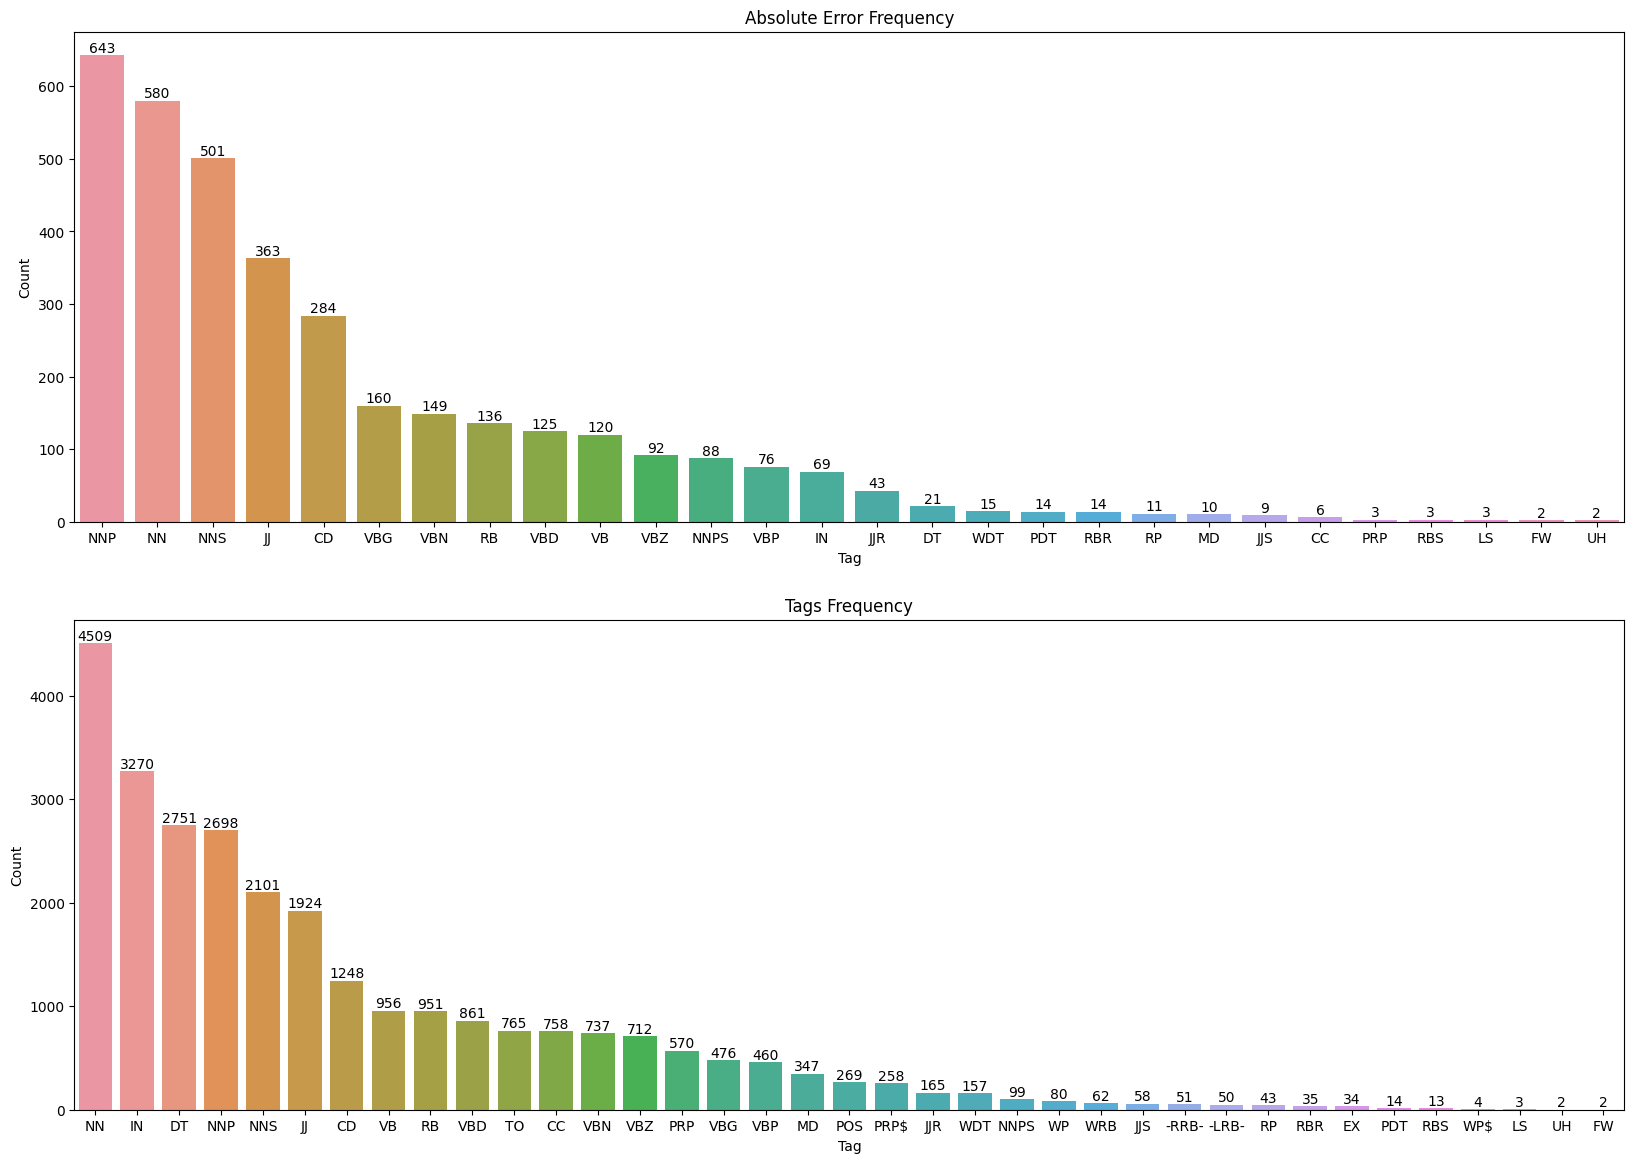

In [ ]:
plot_absolute_error_frequency(misclassified_true_counts_val, is_misclassified_val_df)

It is clear from the comparison that the errors concentrate almost entirely among the most frequent tags. <br>
Although, we see some exceptions:
- **'VBG'** is the 16th most frequent tag, so not really a prominent one, but it is mistaken much more than we would expect;
- **'IN'**, on the other hand, is the 2nd most frequent tag, but it is only 14th in terms of misclassifications (same goes for **'DT'**).

### 1.2 Relative Error Frequency

To get a better view of this behavior, we can look at the **Relative Error Frequency**.

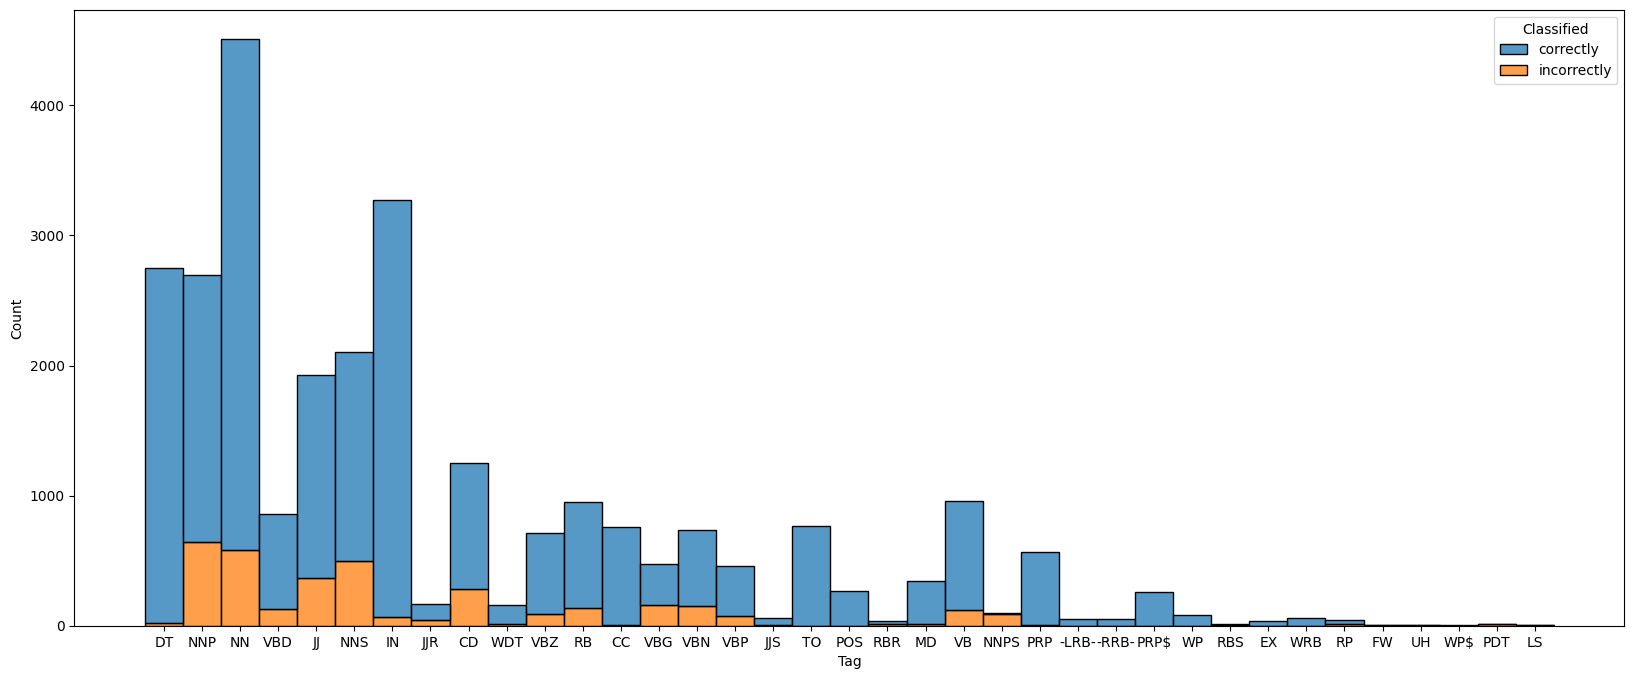

In [ ]:
plt.figure(figsize=(20,8))
sns.histplot(data=is_misclassified_val_df, x='Tag', hue='Classified', multiple="stack")
plt.show()

Highly misclassified tags:
- VBG:
  Total errors: 160
  Support: 476
  Relative Error Frequency:  0.34

- NNPS:
  Total errors: 88
  Support: 99
  Relative Error Frequency:  0.89

- JJR:
  Total errors: 43
  Support: 165
  Relative Error Frequency:  0.26

[RARE TAG] Support: 14
- PDT:
  Total errors: 14
  Support: 14
  Relative Error Frequency:  1.00

[RARE TAG] Support: 35
- RBR:
  Total errors: 14
  Support: 35
  Relative Error Frequency:  0.40

[RARE TAG] Support: 3
- LS:
  Total errors: 3
  Support: 3
  Relative Error Frequency:  1.00

[RARE TAG] Support: 2
- FW:
  Total errors: 2
  Support: 2
  Relative Error Frequency:  1.00

[RARE TAG] Support: 2
- UH:
  Total errors: 2
  Support: 2
  Relative Error Frequency:  1.00



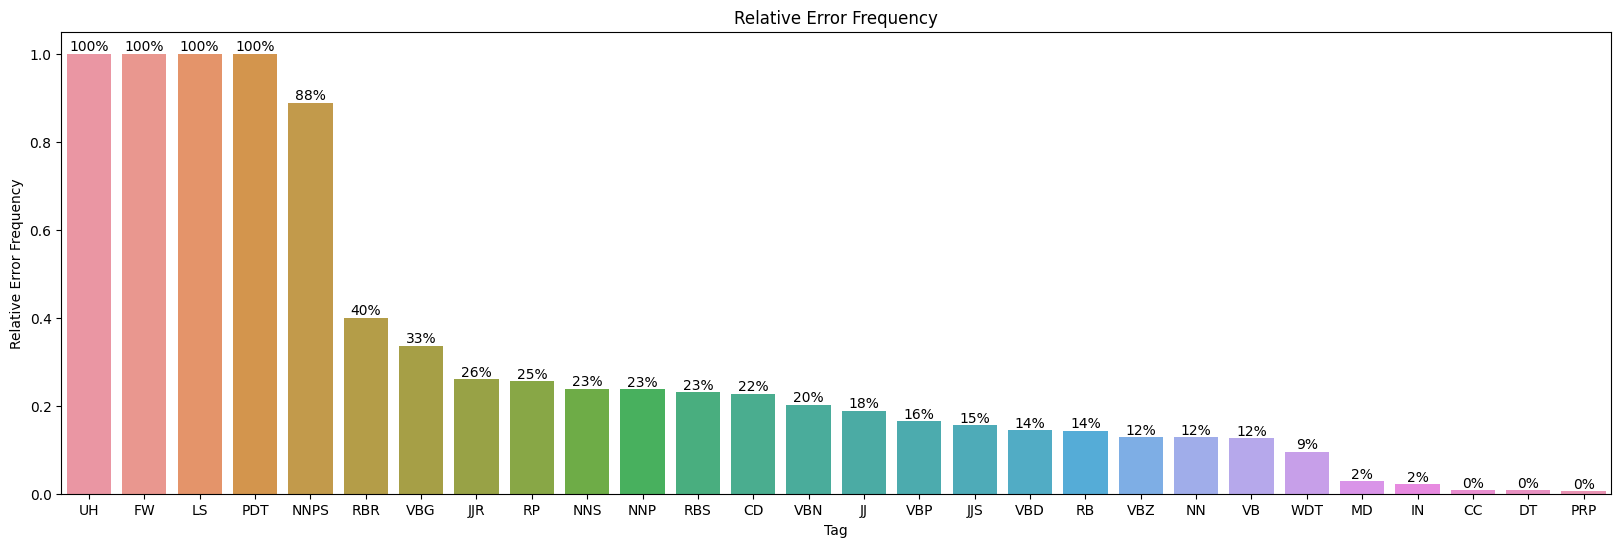

In [ ]:
val_relative_error_frequency = plot_relative_error_frequency(misclassified_true_counts_val, is_misclassified_val_df)

The two histograms bring basically the same piece of information, but from two different perspectives.

First of all, the goods: frequent tags, and, as observed before, **IN** and **DT** in particular, seem to be predicted well almost always.

Now, let's take a look at the worst performances:
- there are five tags which are almost always predicted in the wrong way (**'UH'**, interjections, **'FW'**, foreign words, **'LS'**, list item marker, **'PDT'**, pre-determiners, and **'RBR'**, comparative adverbs), but their supports are so small that we can safely say that these errors are due to the unbalanceness of the dataset, even though we took a lot of precautions about it. Still, some extremely rare tags are going to be predicted in the wrong way. We need to investigate the distribution of each class among the three sets, for sure.

- then, there are some tags whose support is not that small, and it cannot justify, by itself, such a poor performance: these tags are **NNPS**, **VBG** and **JJR**. It might be the case to focus on these. 

### 1.3 Most frequent errors

It can be useful to observe the most frequent error couples in general.

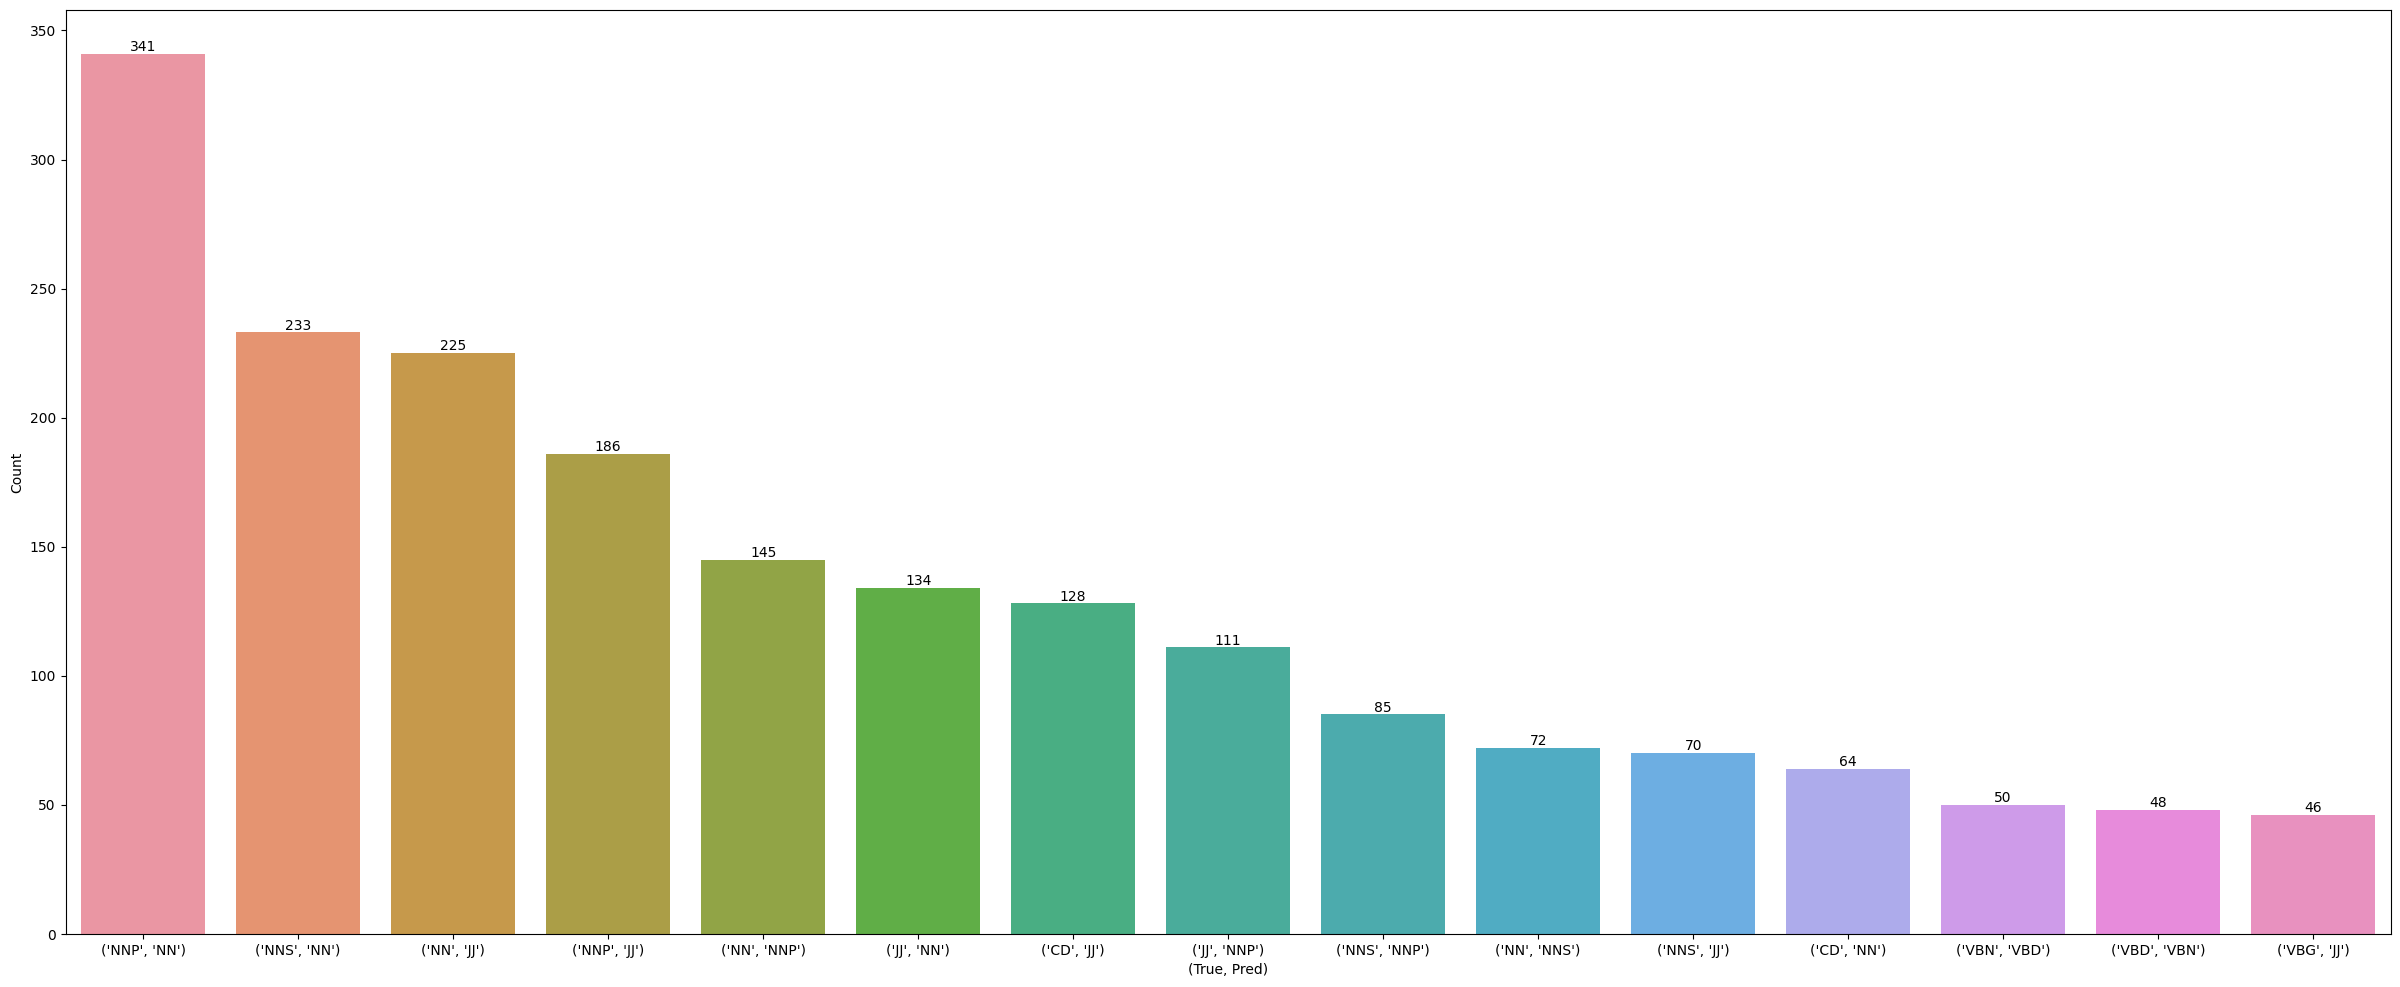

In [ ]:
plt.figure(figsize=(30,12))
sns.barplot(misclassified_couples_counts_val.head(15), x = '(True, Pred)', y= 'Count')
for i, p in enumerate(plt.gca().patches):
        plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')
plt.show()

We can observe that:
- Many diffent kinds of **nouns** are confused with one another:
    - proper nouns **'NNP'** are confused a lot with common nouns **'NN'**, and vice versa;
    - plural common nouns **'NNS'** are often mistaken as singular, and vice versa;
- Also other tags, like **'JJ'** or **'CD'** are often mistaken as nouns; we can attribute this error, once again, to the imbalance of the dataset.

<br><br>
Now, we look for the most frequent mistakes among the tags that had the worst R.E.F.

In [ ]:
poorest_performing_tags_val = ['NNPS', 'VBG', 'JJR']
poorest_performing_couples_val = []
for couple in misclassified_couples_val:
    if couple[0] in poorest_performing_tags_val:
        poorest_performing_couples_val.append(couple)

poorest_performing_couples_val_df = pd.DataFrame(Counter(poorest_performing_couples_val).items(), columns=['(True, Pred)', 'Count']).sort_values(by="Count", ascending=False)

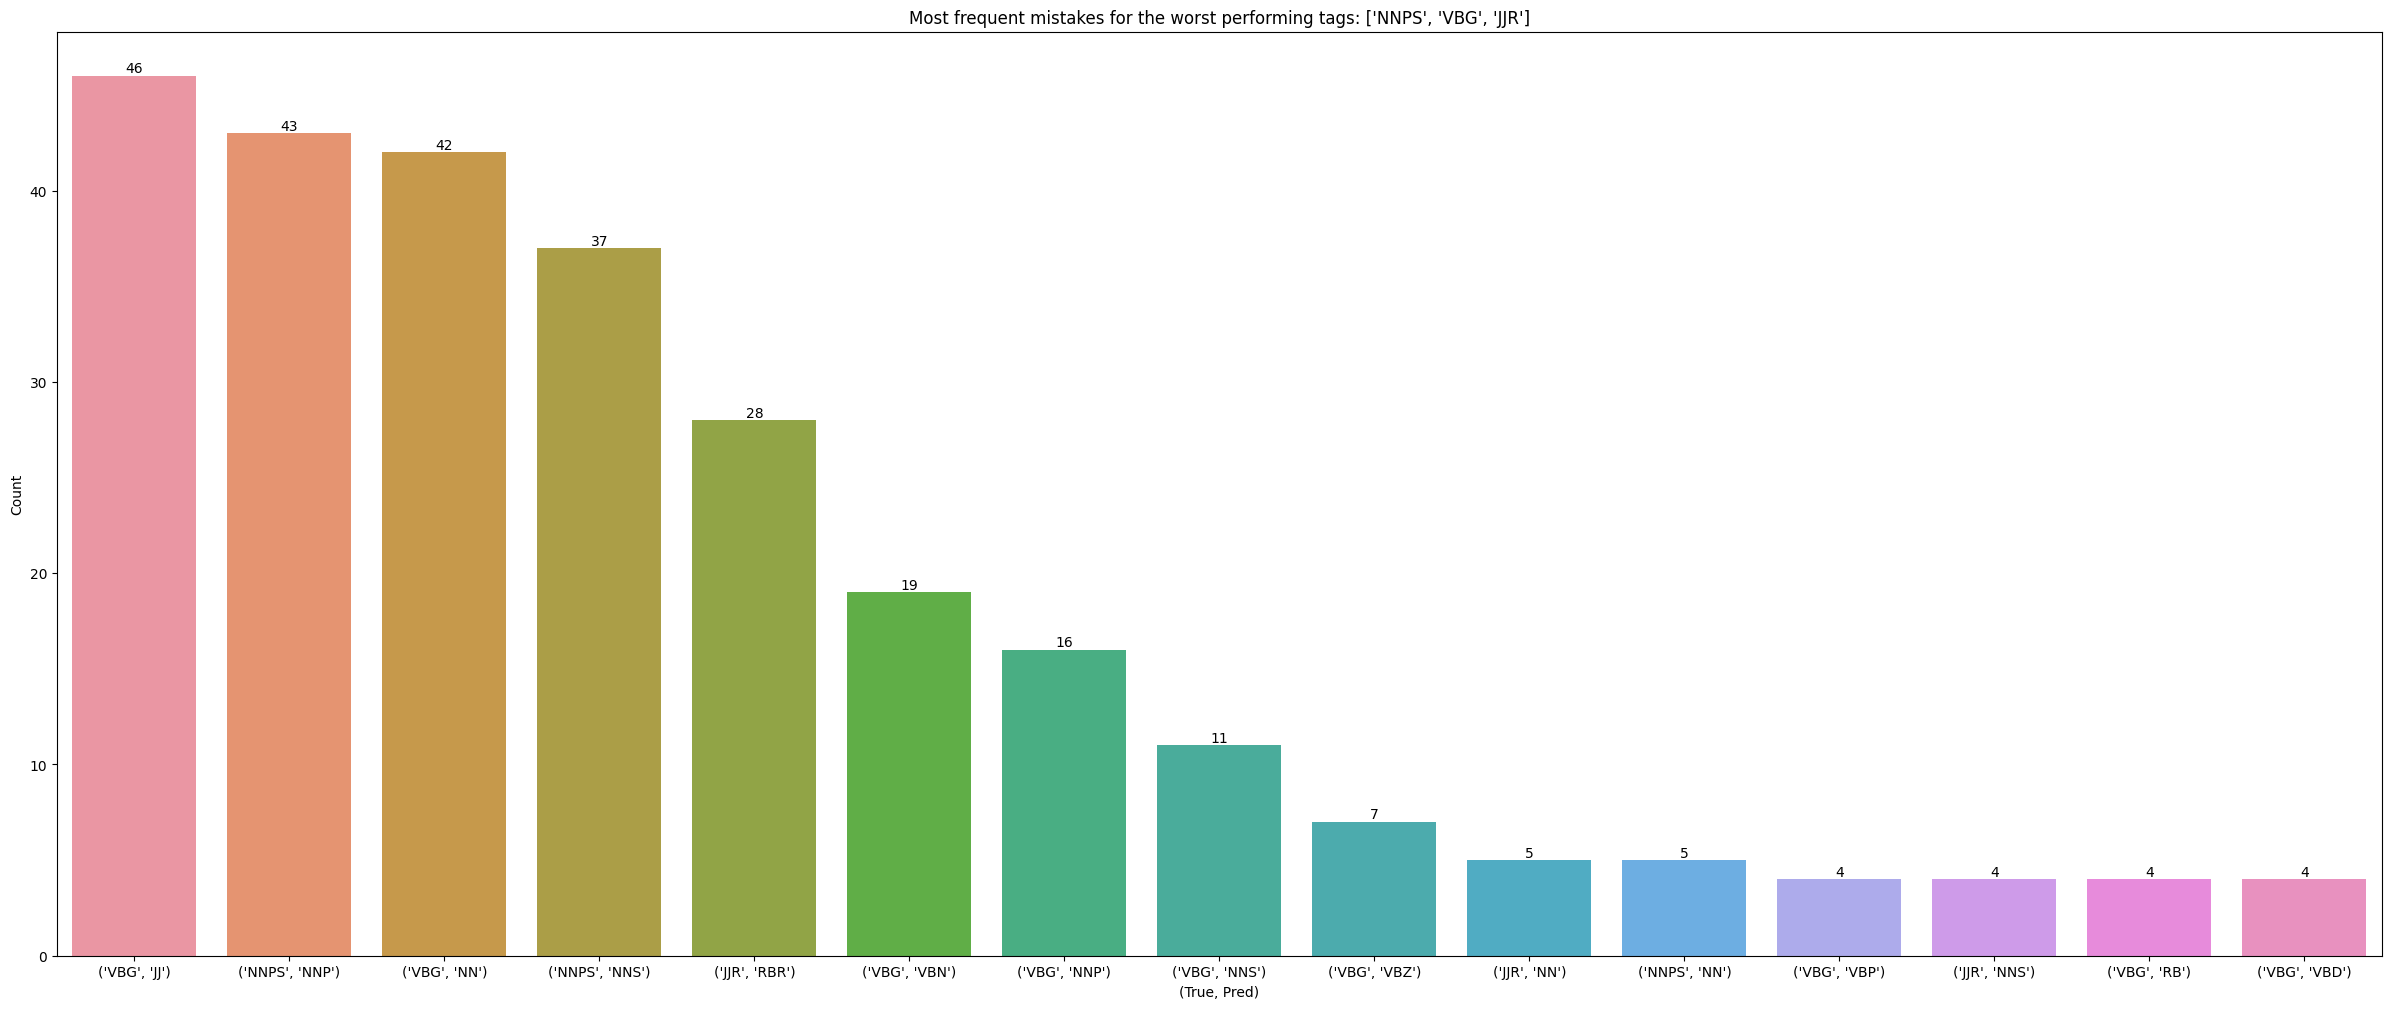

In [ ]:
plt.figure(figsize=(30,12))
plt.title(f'Most frequent mistakes for the worst performing tags: {poorest_performing_tags_val}')
sns.barplot(data=poorest_performing_couples_val_df.head(15), x='(True, Pred)', y='Count')
for i, p in enumerate(plt.gca().patches):
        plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')
plt.show()

We can make some observations about these three tags:
- **'NNPS'** tags are plural proper nouns; we have seen how nouns in general are often confused with one another, and the same is observed here, where plural proper nouns are very often confused as:
    - singular proper nouns **'NNP'**;
    - plural common nouns **'NNS'**;
    - even singular common nouns **'NN'**, sometimes.
- **'VBG'** tags are "*ing* form" verbs;
    - They are often confused as **'JJ'**, i.e. adjectives, which have often the same form!
    - Other times, 'VBG' is confused for other forms of verbs (**'VBN'**,**'VBZ'**,**'VBP'**...).
- **'JJR'** tags are comparative adjectives, which come with an *-er* suffix; therefore, they are often mistaken with other words that share the same suffix:
    - comparative adverbs **'RBR'**;
    - common nouns **'NN'** (we can deduce that nouns like 'teach*er*', 'plumb*er*'... had a role in those mistakes).

### 1.4 Visualizing mistaken tags within the sentences of the Validation Set

We can print some pieces of sentences to inspect possible reasons for these frequent mistakes.

In [ ]:
show_predictions('NNPS', 'NNP', Sentences_val, y_true_val, y_pred_val)

From sentence X[5]:
Part with misclassified token:   ...assistance , the House Appropriations Committee last week...
True tags:                       ['NN', ',', 'DT', 'NNP', 'NNPS', 'NNP', 'JJ', 'NN']
Predicted tags:                  ['NN', ',', 'DT', 'NNP', 'NNP', 'NNP', 'JJ', 'NN']
From sentence X[15]:
Part with misclassified token:   ...a claim by the Philippines...
True tags:                       ['DT', 'NN', 'IN', 'DT', 'NNPS']
Predicted tags:                  ['DT', 'NN', 'IN', 'DT', 'NNP']
From sentence X[118]:
Part with misclassified token:   ...National Association of Home Builders and the International...
True tags:                       ['NNP', 'NNP', 'IN', 'NNP', 'NNPS', 'CC', 'DT', 'NNP']
Predicted tags:                  ['NNP', 'NNP', 'IN', 'NNP', 'NNP', 'CC', 'DT', 'NNP']
From sentence X[118]:
Part with misclassified token:   ...the International Union of Bricklayers and Allied Craftsmen...
True tags:                       ['DT', 'NNP', 'NNP', 'IN', 'NNPS', 'CC', 'NNP'

Probably, the model has seen too little NNPS to tell them apart from other kinds of nouns.

In [ ]:
show_predictions('VBG', 'JJ', Sentences_val, y_true_val, y_pred_val)

From sentence X[4]:
Part with misclassified token:   ...and while more ambitious authorizing legislation is still...
True tags:                       ['CC', 'IN', 'RBR', 'JJ', 'VBG', 'NN', 'VBZ', 'RB']
Predicted tags:                  ['CC', 'IN', 'RBR', 'JJ', 'JJ', 'NN', 'VBZ', 'RB']
From sentence X[60]:
Part with misclassified token:   ...ease jail overcrowding while preserving historic structures ,...
True tags:                       ['VB', 'NN', 'NN', 'IN', 'VBG', 'JJ', 'NNS', ',']
Predicted tags:                  ['VB', 'NN', 'NN', 'IN', 'JJ', 'JJ', 'NNS', ',']
From sentence X[64]:
Part with misclassified token:   ...grain elevators are worth preserving for aesthetic reasons...
True tags:                       ['NN', 'NNS', 'VBP', 'IN', 'VBG', 'IN', 'JJ', 'NNS']
Predicted tags:                  ['JJ', 'NNS', 'VBP', 'JJ', 'JJ', 'IN', 'JJ', 'VBZ']
From sentence X[138]:
Part with misclassified token:   ...such assets had an overriding public benefit...
True tags:                     

In [ ]:
show_predictions('JJ', 'VBG', Sentences_val, y_true_val, y_pred_val)

From sentence X[10]:
Part with misclassified token:   ...The sweeping nature of the...
True tags:                       ['DT', 'JJ', 'NN', 'IN', 'DT']
Predicted tags:                  ['DT', 'VBG', 'NN', 'IN', 'DT']
From sentence X[100]:
Part with misclassified token:   ...are complex , defying sweeping generalizations as to...
True tags:                       ['VBP', 'JJ', ',', 'VBG', 'JJ', 'NNS', 'IN', 'TO']
Predicted tags:                  ['VBP', 'JJ', ',', 'VBN', 'VBG', 'VBN', 'IN', 'TO']
From sentence X[259]:
Part with misclassified token:   ...among commercial banks for overnight use in amounts...
True tags:                       ['IN', 'JJ', 'NNS', 'IN', 'JJ', 'NN', 'IN', 'NNS']
Predicted tags:                  ['IN', 'JJ', 'NNS', 'IN', 'VBG', 'NN', 'IN', 'NNS']
From sentence X[324]:
Part with misclassified token:   ...II , and thus void and severable...
True tags:                       ['NNP', ',', 'CC', 'RB', 'JJ', 'CC', 'JJ']
Predicted tags:                  ['NNP', ',', 'CC

As expected, the model finds it troubling to tell different kinds of *-ing* words apart.

In [ ]:
show_predictions('JJR', 'NN', Sentences_val, y_true_val, y_pred_val)

From sentence X[83]:
Part with misclassified token:   ...He has promised stiffer fines , though...
True tags:                       ['PRP', 'VBZ', 'VBN', 'JJR', 'NNS', ',', 'IN']
Predicted tags:                  ['PRP', 'VBZ', 'VBN', 'NN', 'NN', ',', 'IN']
From sentence X[1032]:
Part with misclassified token:   ...chassis division , a softer motor-home market and...
True tags:                       ['NN', 'NN', ',', 'DT', 'JJR', 'NN', 'NN', 'CC']
Predicted tags:                  ['NNP', 'NN', ',', 'DT', 'NN', 'NN', 'NN', 'CC']
From sentence X[1049]:
Part with misclassified token:   ...institutions would acquire a clearer idea regarding the...
True tags:                       ['NNS', 'MD', 'VB', 'DT', 'JJR', 'NN', 'VBG', 'DT']
Predicted tags:                  ['NNS', 'MD', 'VB', 'DT', 'NN', 'NN', 'VBG', 'DT']
From sentence X[1221]:
Part with misclassified token:   ...and lobbyists as significantly weaker than the Bush...
True tags:                       ['CC', 'NNS', 'RB', 'RB', 'JJR', 

Once again, by reading these sentences we get that the impression that we had about the possible causes (in this case, the *-er* suffix as source of confusion for the model) for these errors are plausibly true.

In [ ]:
show_predictions('JJR', 'RBR', Sentences_val, y_true_val, y_pred_val)

From sentence X[2]:
Part with misclassified token:   ...are committed to adding more than $ 200...
True tags:                       ['VBP', 'VBN', 'TO', 'VBG', 'JJR', 'IN', '$', 'CD']
Predicted tags:                  ['VBP', 'VBN', 'TO', 'VBG', 'RBR', 'IN', '$', 'CD']
From sentence X[216]:
Part with misclassified token:   ...would think a little more like Wall Street...
True tags:                       ['MD', 'VB', 'DT', 'RB', 'JJR', 'IN', 'NNP', 'NNP']
Predicted tags:                  ['MD', 'VB', 'DT', 'RB', 'RBR', 'IN', 'NNP', 'NNP']
From sentence X[239]:
Part with misclassified token:   ...has options to buy more than 100,000 additional...
True tags:                       ['VBZ', 'NNS', 'TO', 'VB', 'JJR', 'IN', 'CD', 'JJ']
Predicted tags:                  ['VBZ', 'NNS', 'TO', 'VB', 'RBR', 'IN', 'CD', 'JJ']
From sentence X[259]:
Part with misclassified token:   ...$ 1 million or more...
True tags:                       ['$', 'CD', 'CD', 'CC', 'JJR']
Predicted tags:                  

This is interesting: it seems like the confusion between comparative adjectives and comparative adverbs comes from the double nature of the word 'more', which can be both, according to the context.

## 2. Error frequency analisys for the Test Set

We will repeat the same analysis for test set.

In [ ]:
misclassified_tags_test, is_misclassified_test, misclassified_tags_test_df, is_misclassified_test_df = errors_report(y_true_test, y_pred_test)
misclassified_couples_test, misclassified_true_tags_test, misclassified_true_counts_test, misclassified_couples_counts_test = errors_counts(misclassified_tags_test)

### 2.1 Absolute Error Frequency

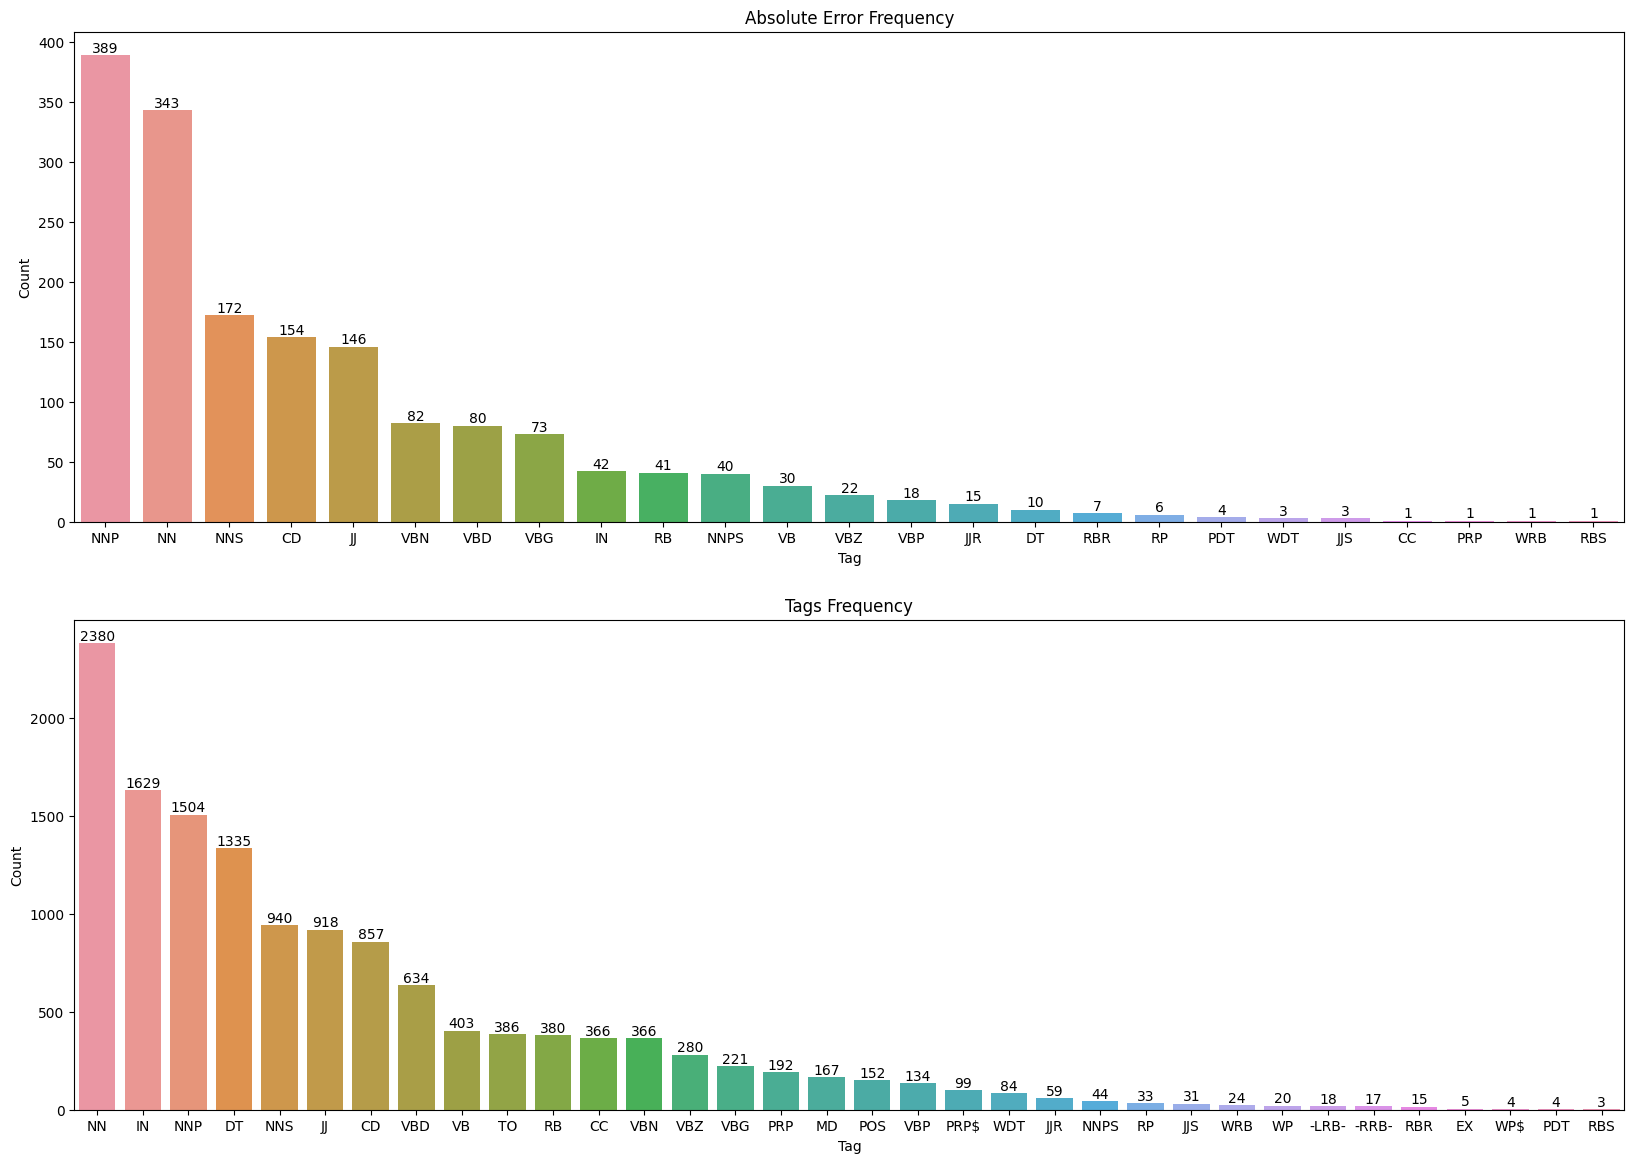

In [ ]:
plot_absolute_error_frequency(misclassified_true_counts_test, is_misclassified_test_df)

Once again, verbs seem to be misclassified a lot with respect to their frequencies.

### 2.2 Relative Error Frequency

To get a better view of this behavior, we can look at the **Relative Error Frequency**.

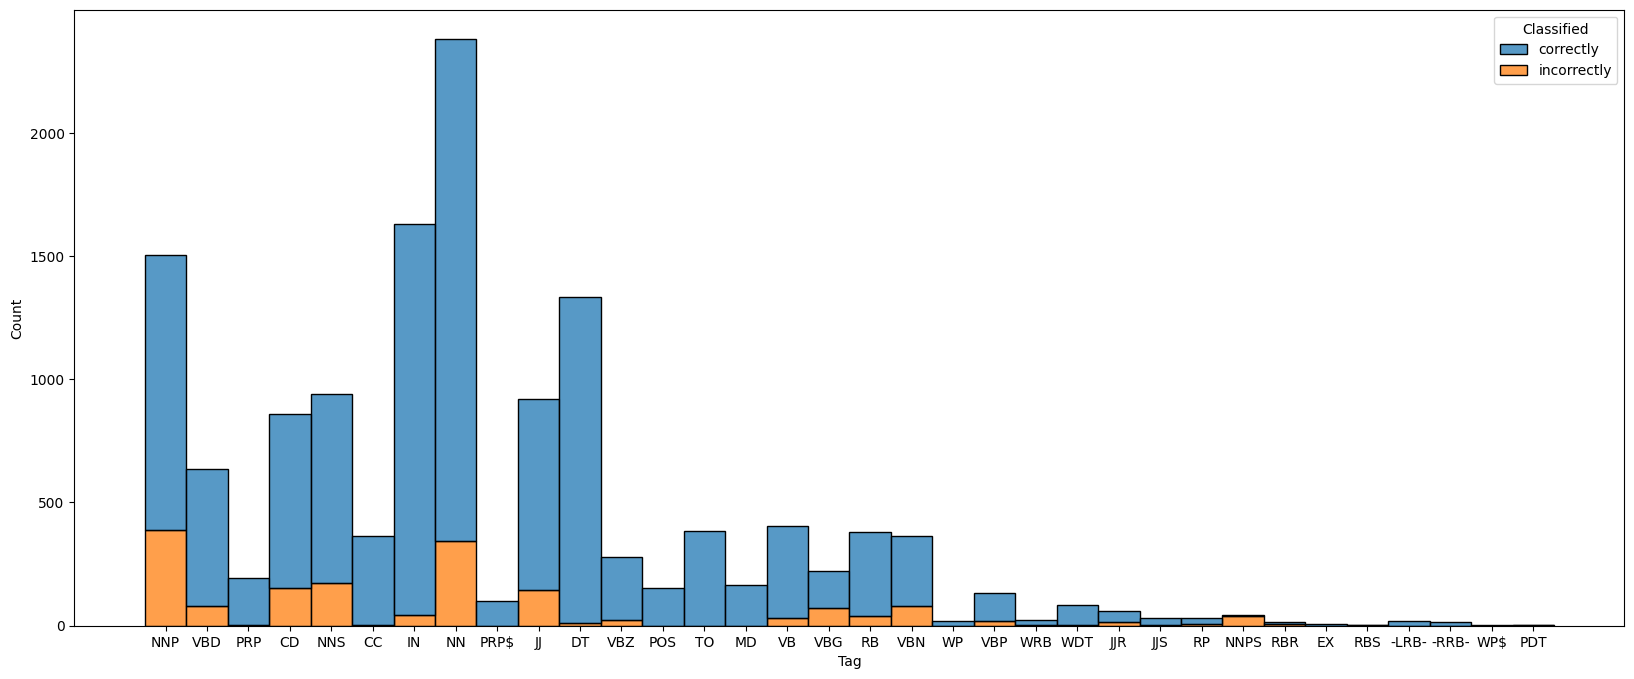

In [ ]:
plt.figure(figsize=(20,8))
sns.histplot(data=is_misclassified_test_df, x='Tag', hue='Classified', multiple="stack")
plt.show()

Highly misclassified tags:
- NNP:
  Total errors: 389
  Support: 1504
  Relative Error Frequency:  0.26

- VBG:
  Total errors: 73
  Support: 221
  Relative Error Frequency:  0.33

[RARE TAG] Support: 44
- NNPS:
  Total errors: 40
  Support: 44
  Relative Error Frequency:  0.91

- JJR:
  Total errors: 15
  Support: 59
  Relative Error Frequency:  0.25

[RARE TAG] Support: 15
- RBR:
  Total errors: 7
  Support: 15
  Relative Error Frequency:  0.47

[RARE TAG] Support: 4
- PDT:
  Total errors: 4
  Support: 4
  Relative Error Frequency:  1.00

[RARE TAG] Support: 3
- RBS:
  Total errors: 1
  Support: 3
  Relative Error Frequency:  0.33



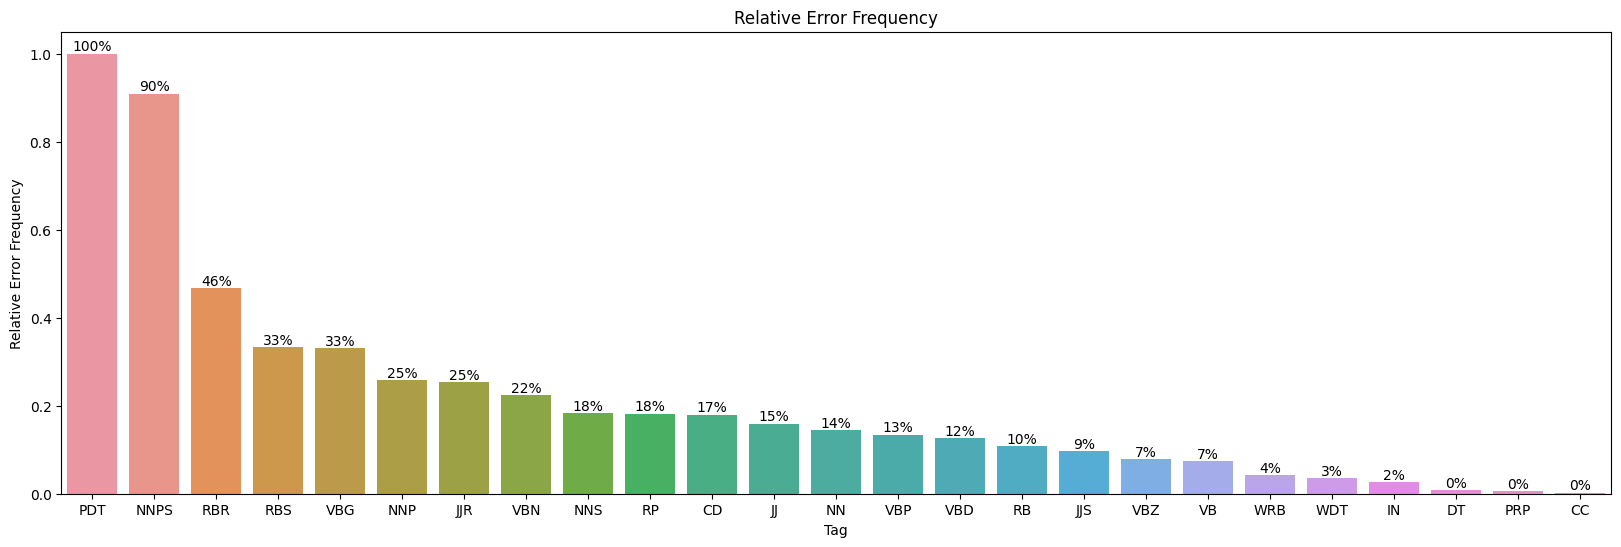

In [ ]:
test_relative_error_frequency = plot_relative_error_frequency(misclassified_true_counts_test, is_misclassified_test_df)

Similar situation as before: other than extremely rare tags such as **'PDT'** (pre-determiners), **'RBR'** (comparative adverbs) and **'RBS'** (superlative adverbs), the tags classified with the highest difficulty for the model are a kind of noun, this time **'NNP'**, and again **'VBG'** and **'JJR'**.

### 2.3 Most frequent errors

It can be useful to observe the most frequent error couples in general.

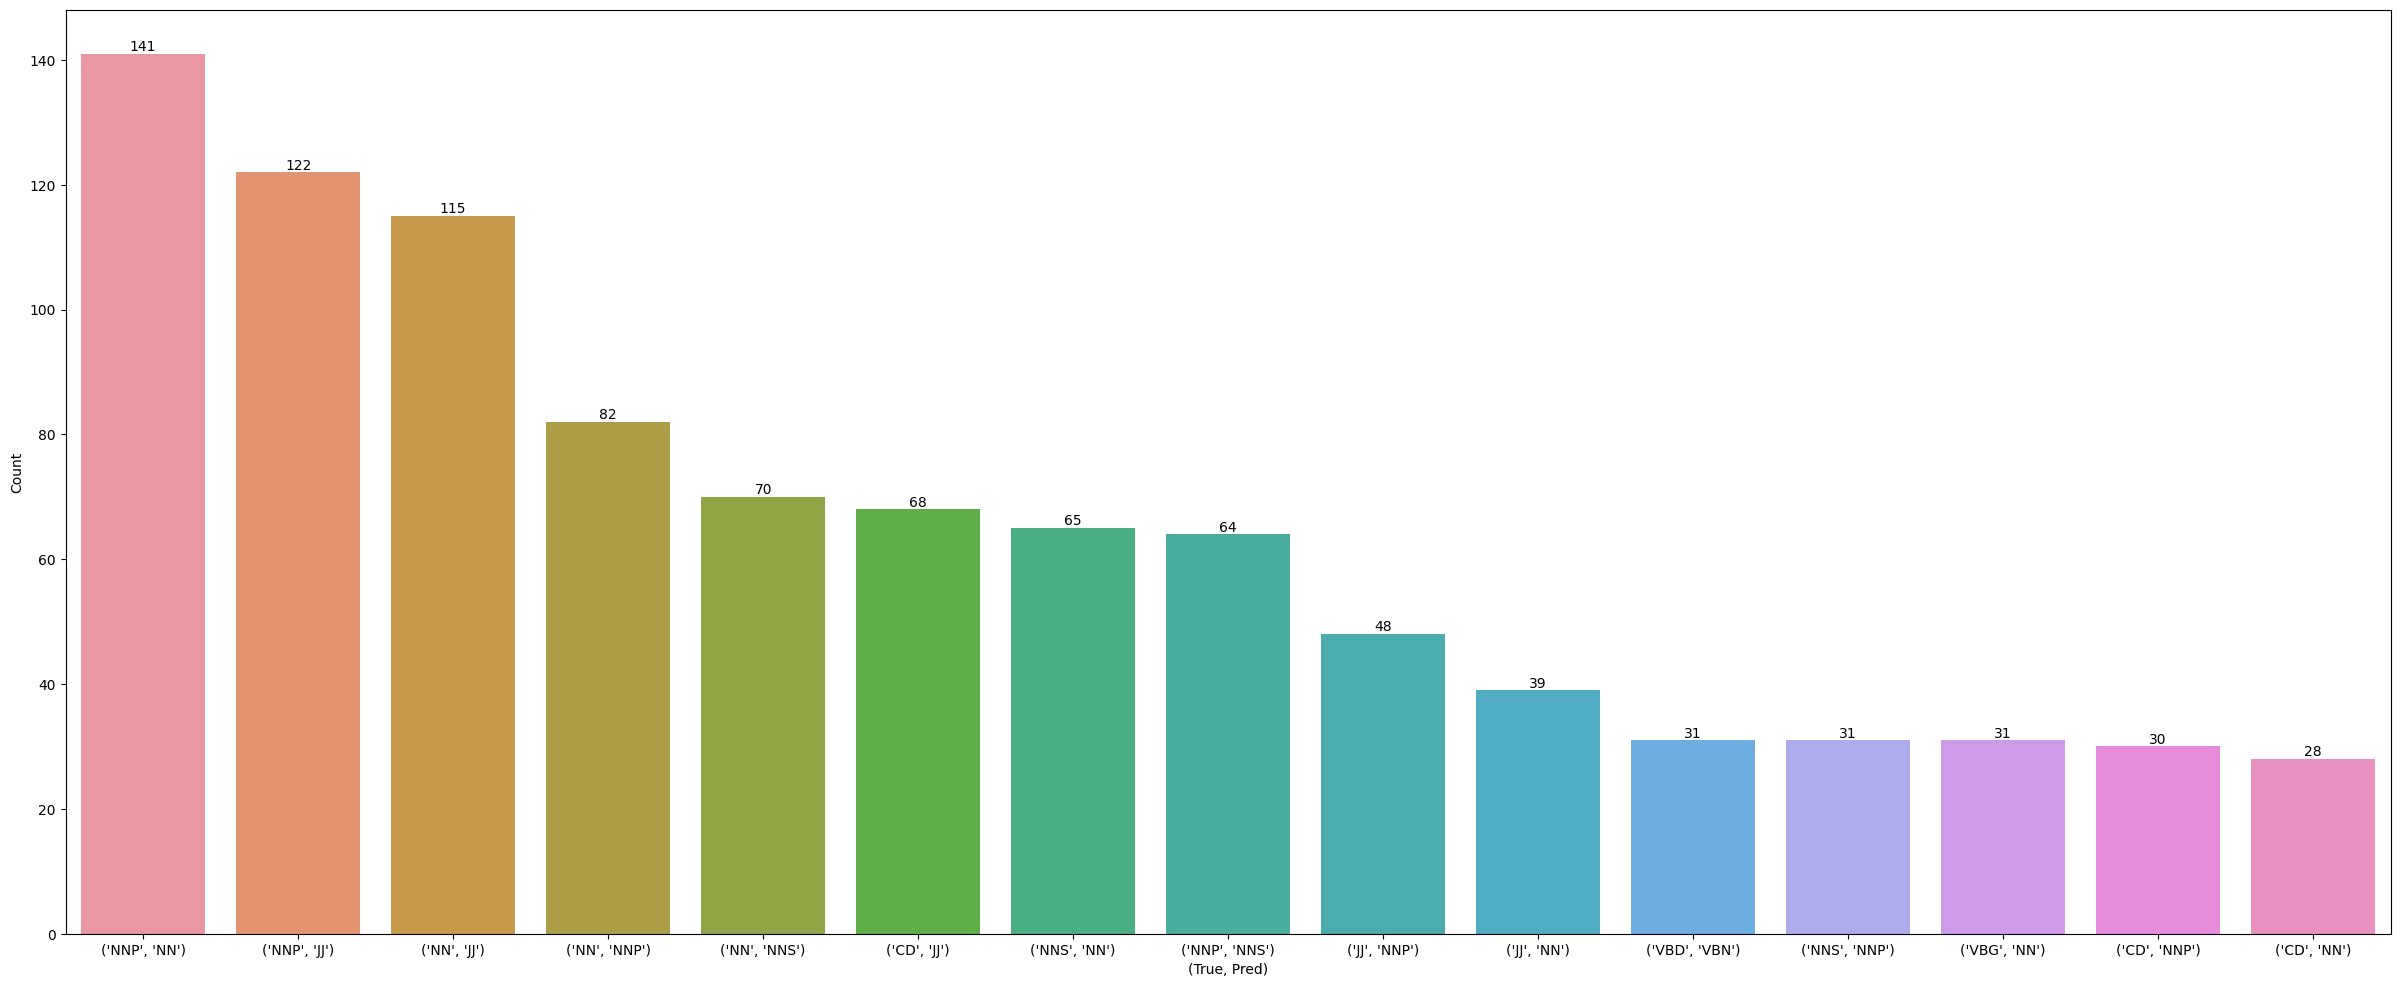

In [ ]:
plt.figure(figsize=(30,12))
sns.barplot(misclassified_couples_counts_test.head(15), x = '(True, Pred)', y= 'Count')
for i, p in enumerate(plt.gca().patches):
        plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')
plt.show()

Again, frequent confusion among different kinds of nouns, and noun domination over other tags such as **'JJ'** and **'CD'** (cardinal numbers).

In [ ]:
poorest_performing_tags_test = ['NNP', 'VBG', 'JJR']
poorest_performing_couples_test = []
for couple in misclassified_couples_test:
    if couple[0] in poorest_performing_tags_test:
        poorest_performing_couples_test.append(couple)

poorest_performing_couples_test_df = pd.DataFrame(Counter(poorest_performing_couples_test).items(), columns=['(True, Pred)', 'Count']).sort_values(by="Count", ascending=False)

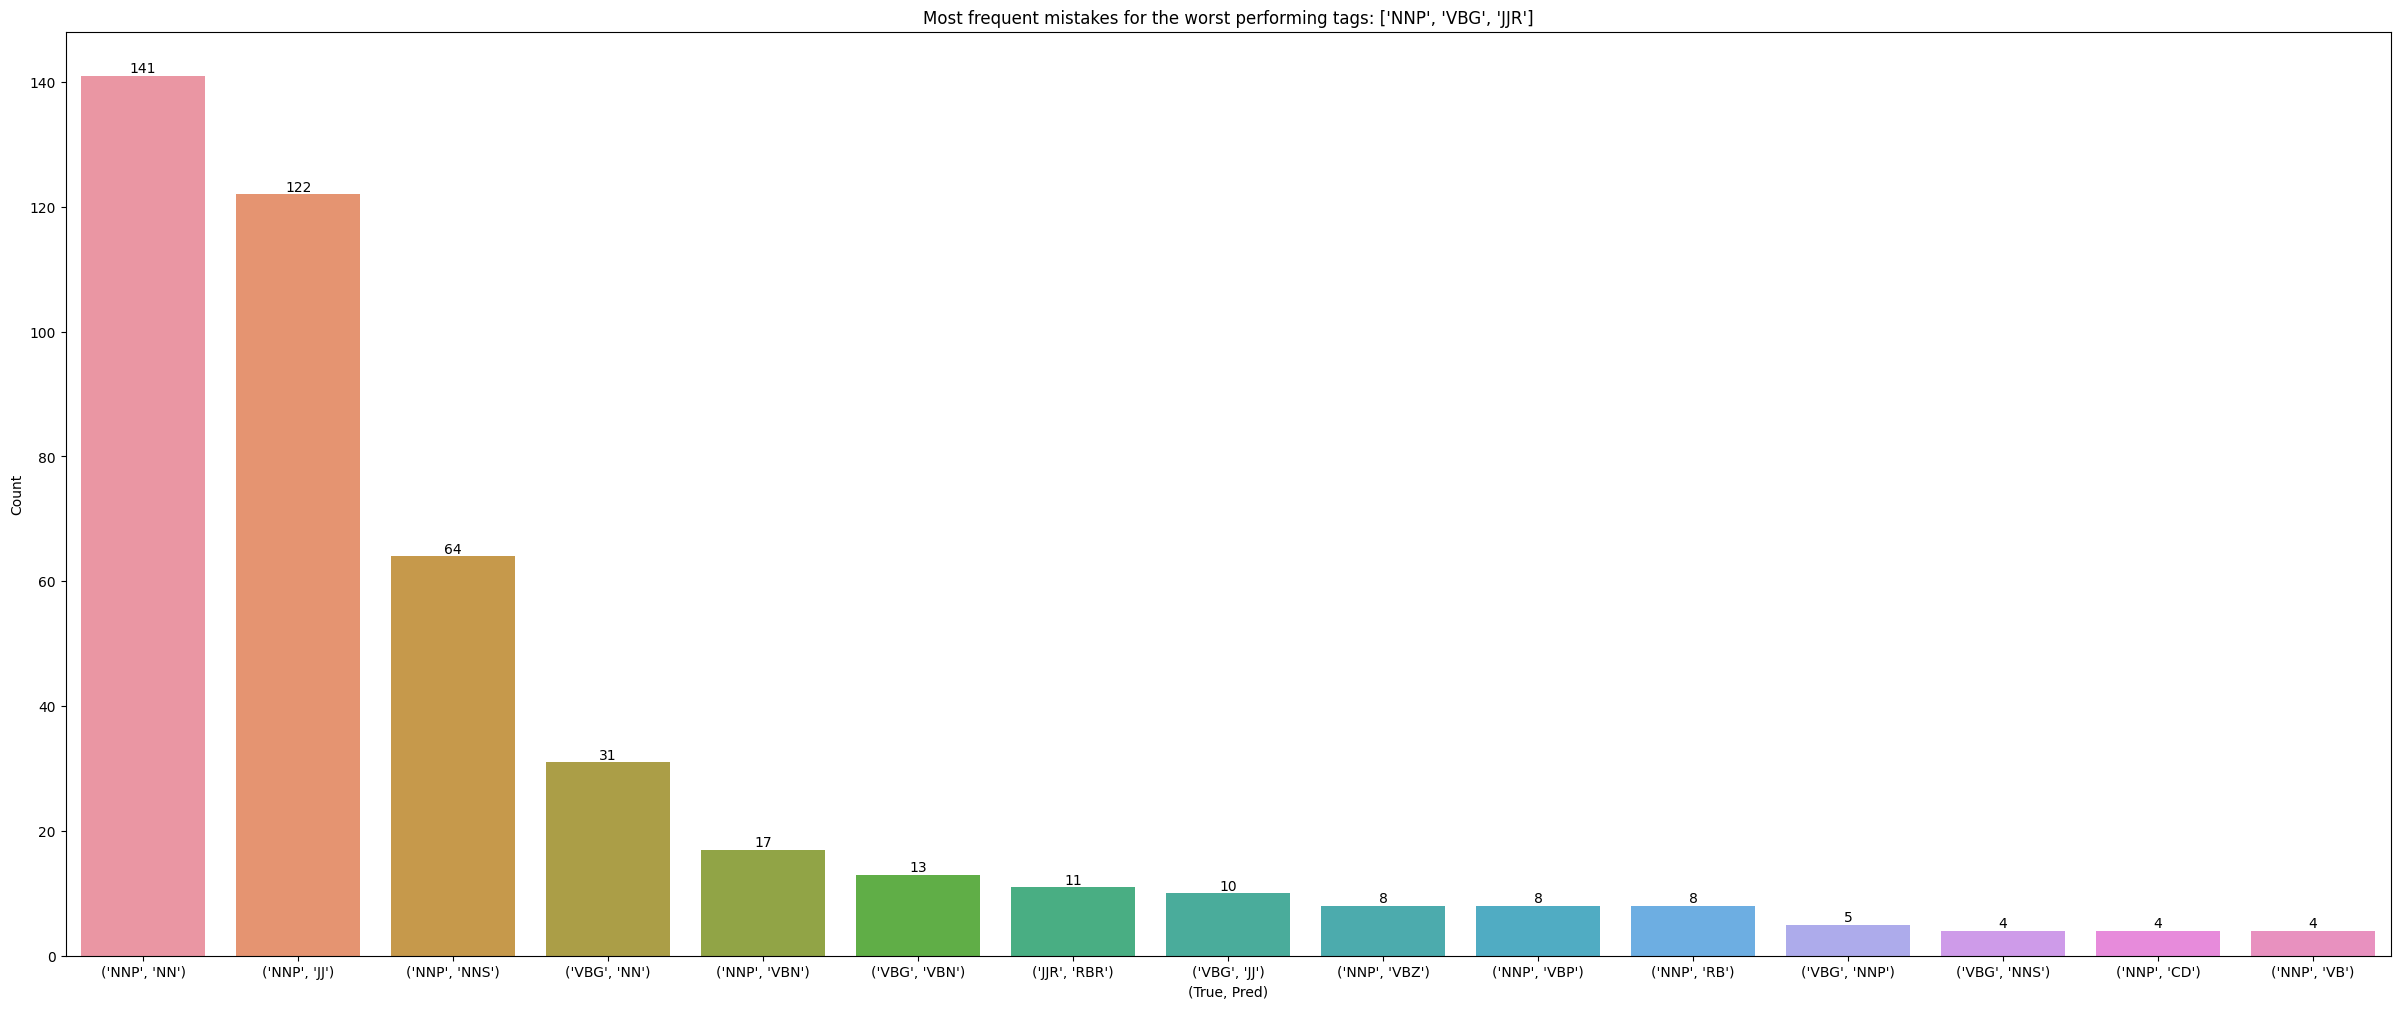

In [ ]:
plt.figure(figsize=(30,12))
plt.title(f'Most frequent mistakes for the worst performing tags: {poorest_performing_tags_test}')
sns.barplot(data=poorest_performing_couples_test_df.head(15), x='(True, Pred)', y='Count')
for i, p in enumerate(plt.gca().patches):
        plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')
plt.show()

Once again, let's take a look at all three tags:
- **'NNP'** tags are singular proper nouns and, as always with nouns, they are very often confused as:
    - singular common nouns **'NN'**;
    - plural common nouns **'NNS'**;
    It is interesting to notice, though, how often these tags are confused with +**'JJ'** tags, i.e. adjectives! We might want to take a look at that;
- **'VBG'**, i.e. "*ing* form" verbs:
    - They are often confused as **'NN'** tags, i.e. nouns; This is rather unexpected, so we will look into it;
    - Once again, 'VBG' is confused for other forms of verbs (**'VBN'**,**'VBZ'**,**'VBP'**...).
- For **'JJR'** tags, i.e. comparative adjectives, we can make the same analysis that we did for the validation set: their *-er* suffix seems to cause trouble for other words with the same suffix but with different tag, such as comparative adverbs **'RBR'**.

### 2.4 Visualizing mistaken tags within the sentences of the Test Set

Let's take a look at some of these mistaken tokens in their context.

The first mistake we want to take a better look at is the ('NNP', 'JJ') couple, whose high frequency seems a bit weird.

In [ ]:
show_predictions('NNP', 'JJ', Sentences_test, y_true_test, y_pred_test)

From sentence X[1]:
Part with misclassified token:   ...The move boosts Intelogic Chairman Asher Edelman...
True tags:                       ['DT', 'NN', 'VBZ', 'NNP', 'NNP', 'NNP', 'NNP']
Predicted tags:                  ['DT', 'NN', 'VBZ', 'JJ', 'NN', 'NN', 'VBN']
From sentence X[2]:
Part with misclassified token:   ...Datapoint Corp. , an Intelogic affiliate...
True tags:                       ['NNP', 'NNP', ',', 'DT', 'NNP', 'NN']
Predicted tags:                  ['NNP', 'NNP', ',', 'DT', 'JJ', 'NN']
From sentence X[3]:
Part with misclassified token:   ...by one day an Intelogic announcement that it...
True tags:                       ['IN', 'CD', 'NN', 'DT', 'NNP', 'NN', 'IN', 'PRP']
Predicted tags:                  ['IN', 'CD', 'NN', 'DT', 'JJ', 'NN', 'IN', 'PRP']
From sentence X[4]:
Part with misclassified token:   ...composite trading yesterday , Intelogic shares rose 37.5...
True tags:                       ['JJ', 'NN', 'NN', ',', 'NNP', 'NNS', 'VBD', 'CD']
Predicted tags:    

From the looks of it, it is the position of the word within the sentence which seems to mislead the model, making it predict this word as adjective: names of companies like 'Intelogic' are often put before a noun like 'Chairman' or 'affiliate', making it seem like an adjective.

Now, we take a look at the times *-ing* form verbs **'VBG'** are confused with singular common nouns **'NN'**, and vice versa.

In [ ]:
show_predictions('VBG', 'NN', Sentences_test, y_true_test, y_pred_test)

From sentence X[20]:
Part with misclassified token:   ...That compares with operating earnings of $...
True tags:                       ['DT', 'VBZ', 'IN', 'VBG', 'NNS', 'IN', '$']
Predicted tags:                  ['DT', 'VBZ', 'IN', 'NN', 'NNS', 'IN', '$']
From sentence X[145]:
Part with misclassified token:   ...market , with blue-chips bearing the brunt of...
True tags:                       ['NN', ',', 'IN', 'NNS', 'VBG', 'DT', 'NN', 'IN']
Predicted tags:                  ['NN', ',', 'IN', 'JJ', 'NN', 'DT', 'NN', 'IN']
From sentence X[151]:
Part with misclassified token:   ...October survey of corporate purchasing managers , as...
True tags:                       ['NNP', 'NN', 'IN', 'JJ', 'VBG', 'NNS', ',', 'IN']
Predicted tags:                  ['NNP', 'NN', 'IN', 'JJ', 'NN', 'NNS', ',', 'IN']
From sentence X[152]:
Part with misclassified token:   ...have indicated that the manufacturing sector was improving...
True tags:                       ['VB', 'VBN', 'IN', 'DT', 'VBG', 'NN'

In [ ]:
show_predictions('NN', 'VBG', Sentences_test, y_true_test, y_pred_test)

From sentence X[23]:
Part with misclassified token:   ...cited a particularly strong showing by the company...
True tags:                       ['VBD', 'DT', 'RB', 'JJ', 'NN', 'IN', 'DT', 'NN']
Predicted tags:                  ['VBD', 'DT', 'RB', 'JJ', 'VBG', 'IN', 'DT', 'NN']
From sentence X[221]:
Part with misclassified token:   ...power supplies and plastic literature displays...
True tags:                       ['NN', 'NNS', 'CC', 'JJ', 'NN', 'NNS']
Predicted tags:                  ['NN', 'VBZ', 'CC', 'NN', 'VBG', 'NN']
From sentence X[249]:
Part with misclassified token:   ...million write-off of capitalized servicing at the mobile...
True tags:                       ['CD', 'NN', 'IN', 'VBN', 'NN', 'IN', 'DT', 'JJ']
Predicted tags:                  ['CD', 'JJ', 'IN', 'JJ', 'VBG', 'IN', 'DT', 'JJ']
From sentence X[331]:
Part with misclassified token:   ...while purchasing agents said manufacturing shrank further in...
True tags:                       ['IN', 'VBG', 'NNS', 'VBD', 'NN

Once again, words with the same suffix but with different tags (in this case, *-ing* form verbs and nouns) cause trouble to the model.

### 3. Frequencies of tags among the Train, Validation and Test Set

Some tags were consistently got wrong by the model when found in the Validation or Test Set.

Thus, we may wonder whether the model has seen too little of these tags during training, or even, if it has seen them at all.

In [ ]:
# We create an exploded version of the whole dataframe where we only care about the tag value and the split
df_prep_exploded = df_prep.drop(['document','sentence'], axis=1).explode('tagging').reset_index(drop=True)
df_prep_exploded

,split,tagging
0,train,NNP
1,train,NNP
2,train,","
3,train,CD
4,train,NNS
...,...,...
90365,test,NN
90366,test,IN
90367,test,JJ
90368,test,NN


### 3.1 Distribution of the hardest tags to classify

From the analysis we made, the tags for which we are interested to know the distribution are: **'NNPS'**, **'JJR'**, **'RBR'**, **'RBS'**, **'PDT'**, **'LS'**, **'UH'** and **'FW'**.

In [ ]:
poorest_performing_tags = ['NNPS', 'JJR', 'RBR', 'RBS', 'PDT', 'LS', 'UH','FW']

In [ ]:
poorest_performing_tags_df = df_prep_exploded[df_prep_exploded['tagging'].isin(poorest_performing_tags)]
poorest_performing_tags_df

,split,tagging
83,train,RBR
152,train,RBR
385,train,JJR
489,train,RBR
525,train,JJR
...,...,...
89638,test,RBR
89669,test,JJR
89835,test,RBR
90254,test,JJR


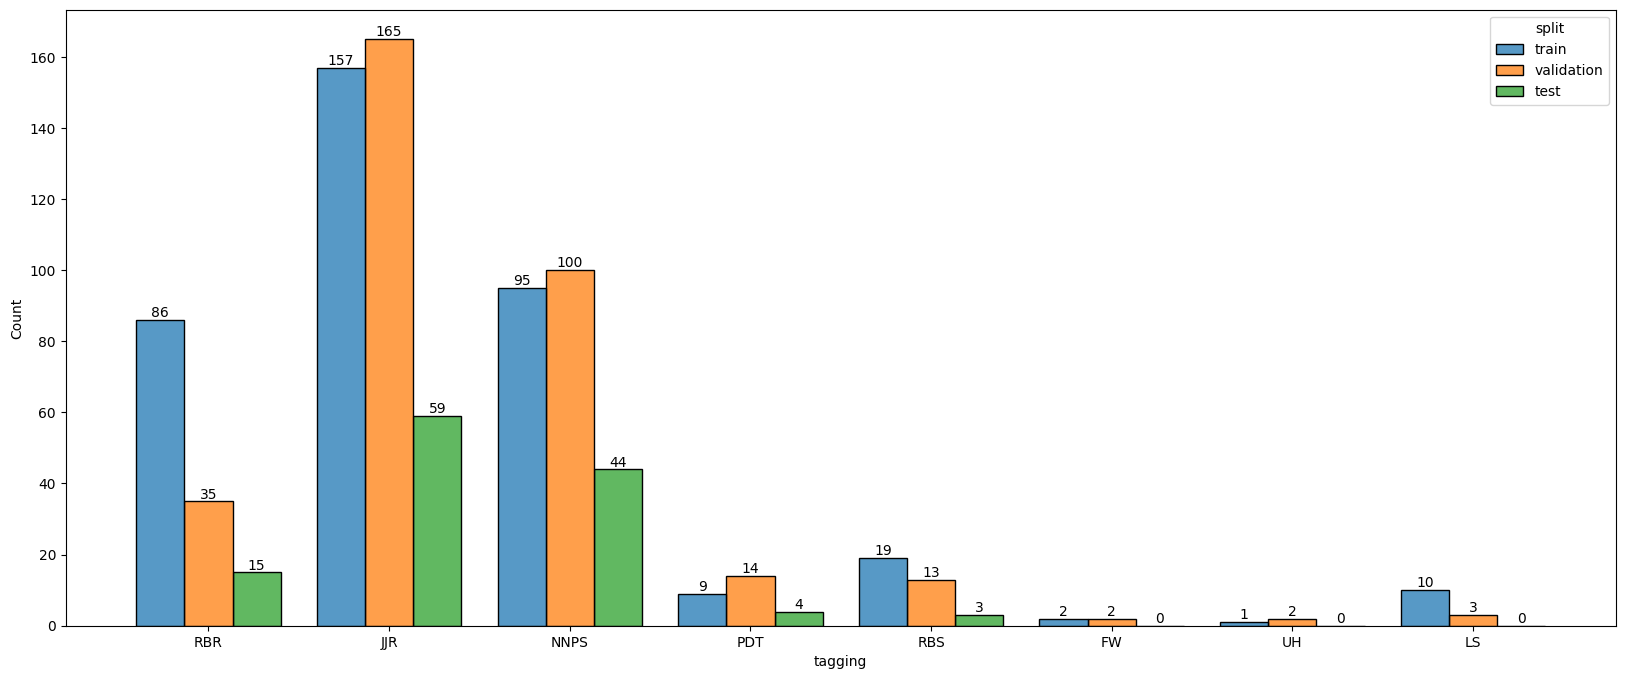

In [ ]:
plt.figure(figsize=(20,8))
sns.histplot(data=poorest_performing_tags_df, x="tagging", hue="split", multiple="dodge", shrink=.8, )
for i, p in enumerate(plt.gca().patches):
    plt.gca().annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

Rather than an imbalance among the three sets, which is not highlighted by the histogram, it seems like the problem is more the imbalance among the tags. Even though they are present in a similar fashion among the three sets, their absolute presence within each set is very poor: we are talking about 0 to 165 occurrances among the three sets, while the average number of occurrances for all tags is 2008.

### 3.2 Distribution of the "nouns" tags

In particular, as many errors concerned the different kinds of nouns, it can be useful to inspect their distribution across all sets.

In [ ]:
nouns = ['NN', 'NNS', 'NNP', 'NNPS']

In [ ]:
nouns_df = df_prep_exploded[df_prep_exploded['tagging'].isin(nouns)]
nouns_df

,split,tagging
0,train,NNP
1,train,NNP
4,train,NNS
10,train,NN
14,train,NN
...,...,...
90351,test,NNS
90355,test,NNP
90361,test,NN
90365,test,NN


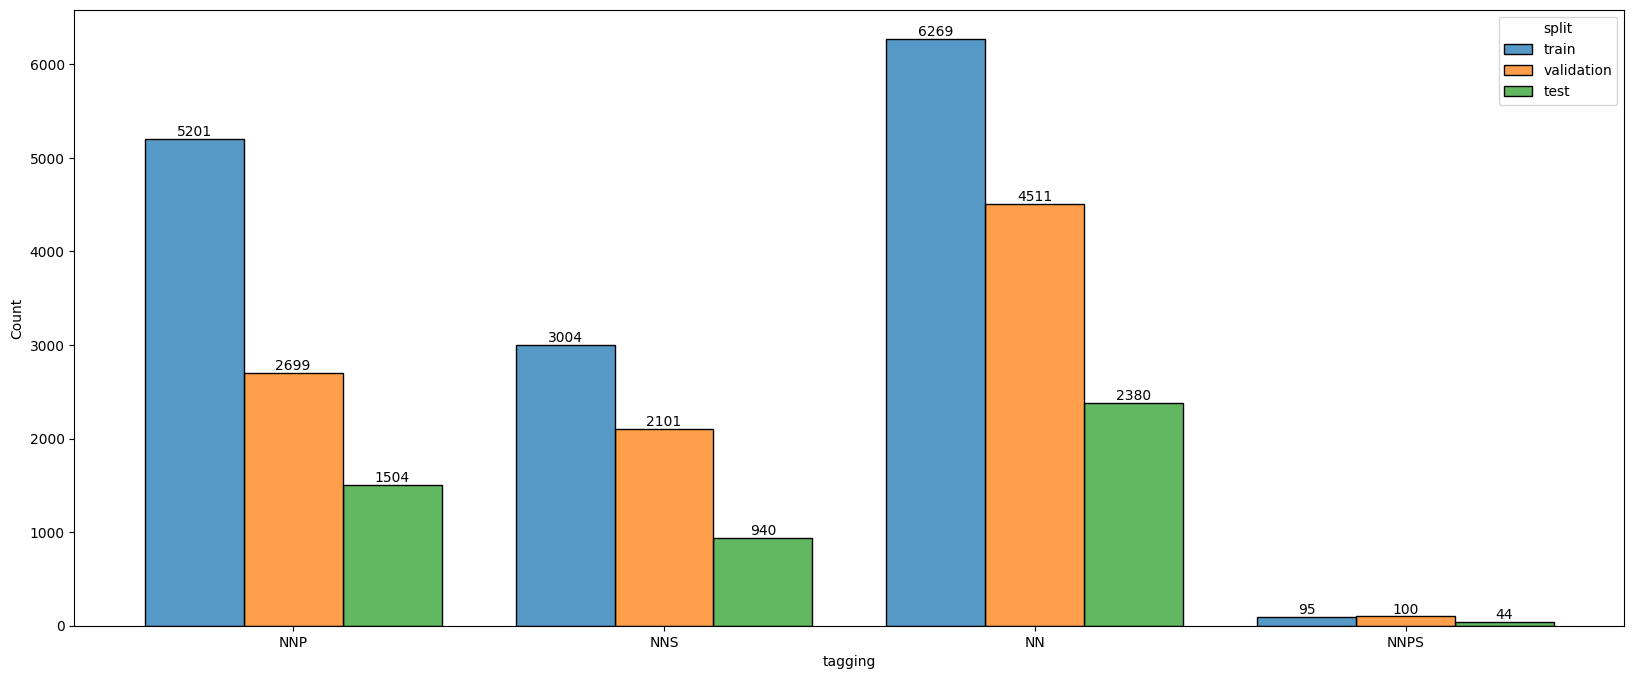

In [ ]:
plt.figure(figsize=(20,8))
sns.histplot(data=nouns_df, x="tagging", hue="split", multiple="dodge", shrink=.8, )
for i, p in enumerate(plt.gca().patches):
    plt.gca().annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

As seen when plotting the most frequent error couples, **'NNP'**, **'NNPS'** (singular and plural proper nouns), and **'NNS'** (plural common nouns), are indiscriminately confused with **'NN'** (singular common noun). <br>
Because they are often similar words, it is only natural that the model, when uncertain, tends to rely on the one that it had seen the most during training, which is, in fact, **'NN'**.

## 4. Precision/Recall curves

Finally, let's plot the **Precision-Recall curves**.

Because we are dealing with multi-class classification, we need to **binarize** the labels first, i.e. to consider, for each sample in both the ground truth and the predicted labels, only the entry corresponding to the true tag.

In this way, we will get **two one-dimensional vectors for each tag** of the set:
- the ground truth, whose entries can only be 0 or 1
- the prediction for that tag, which is a probability spanning in [0,1]

We can use these to produce the Precision-Recall curve for each single tag.

In particular, we perform this operation for:
- all 36 tags of the validation set
- all 33 tags of the test set

In [ ]:
y_true_val_all, y_pred_val_all = new_chop_and_explode(raw_pred_val, y_true_val)
y_true_test_all, y_pred_test_all = new_chop_and_explode(raw_pred_test, y_true_test)

In [ ]:
val_absolute_frequency_ordered_tags = [x for x in train_tags_counts["Tag"].values if x in tags_to_consider and x in val_tags_counts["Tag"].values]
val_absolute_frequency_ordered_tags

['NN',
 'NNP',
 'IN',
 'DT',
 'NNS',
 'JJ',
 'VBD',
 'RB',
 'CD',
 'VB',
 'CC',
 'VBZ',
 'VBN',
 'TO',
 'PRP',
 'VBG',
 'VBP',
 'MD',
 'PRP$',
 'POS',
 'WDT',
 'JJR',
 'WP',
 'RP',
 'NNPS',
 'JJS',
 'WRB',
 'RBR',
 '-LRB-',
 '-RRB-',
 'EX',
 'RBS',
 'LS',
 'PDT',
 'WP$',
 'FW',
 'UH']

In [ ]:
test_absolute_frequency_ordered_tags = [x for x in train_tags_counts["Tag"].values if x in tags_to_consider and x in test_tags_counts["Tag"].values]
test_absolute_frequency_ordered_tags

['NN',
 'NNP',
 'IN',
 'DT',
 'NNS',
 'JJ',
 'VBD',
 'RB',
 'CD',
 'VB',
 'CC',
 'VBZ',
 'VBN',
 'TO',
 'PRP',
 'VBG',
 'VBP',
 'MD',
 'PRP$',
 'POS',
 'WDT',
 'JJR',
 'WP',
 'RP',
 'NNPS',
 'JJS',
 'WRB',
 'RBR',
 '-LRB-',
 '-RRB-',
 'EX',
 'RBS',
 'PDT',
 'WP$']

We are all set.

Now, because of the high number of curves to produce, we are kind of forced to show multiple curves into a single plot.

Things could get messy. Therefore, in order to have a complete and clear idea of the performance of the model for each tag, we will show the plots according to two points of view:
- First, we group and show the curves for the tags ordered according to their **absolute frequency within the train set**, to highlight the pattern, already noticed before, that links the performance with the frequency of the tag
- Then, we group the curves according to the **number of errors** made by the model for each of them (descending order), so that we can notice the difference in performance from the hardest tags to the easiest ones

### 4.1 Precision-recall curves for absolute frequency ordered tags

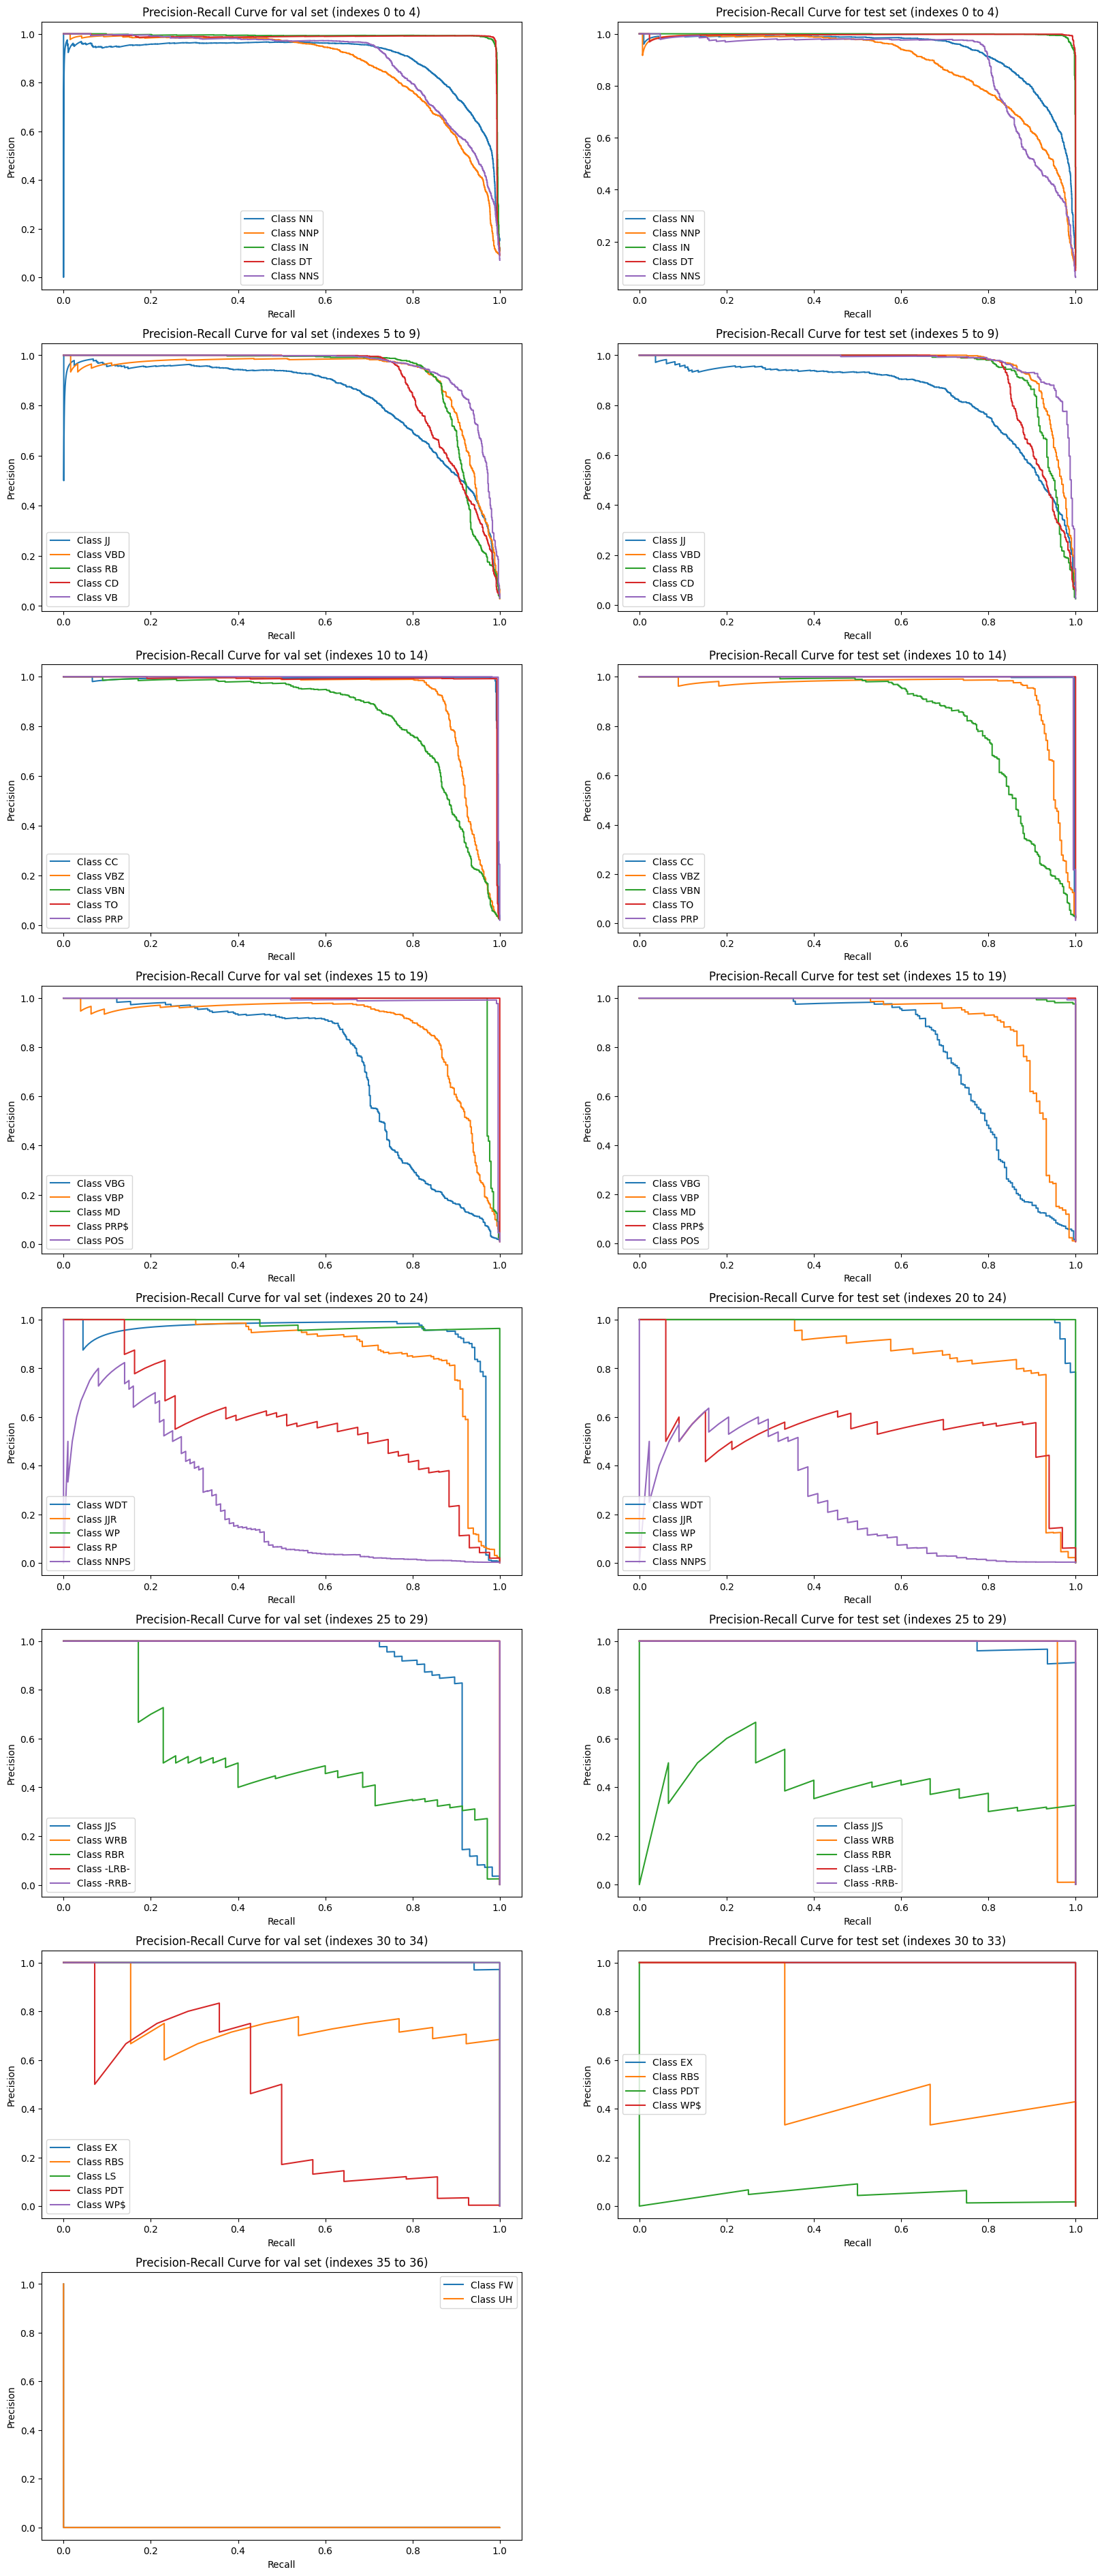

In [ ]:
plt.figure(figsize=(20, 6*8))

plt.subplot(8, 2, 1)
plot_precision_recall_curves(val_absolute_frequency_ordered_tags, 0, 4, y_pred_val_all, y_true_val_all, 'val')

plt.subplot(8, 2, 2)
plot_precision_recall_curves(test_absolute_frequency_ordered_tags, 0, 4, y_pred_test_all, y_true_test_all, 'test')

plt.subplot(8, 2, 3)
plot_precision_recall_curves(val_absolute_frequency_ordered_tags, 5, 9, y_pred_val_all, y_true_val_all, 'val')

plt.subplot(8, 2, 4)
plot_precision_recall_curves(test_absolute_frequency_ordered_tags, 5, 9, y_pred_test_all, y_true_test_all, 'test')

plt.subplot(8, 2, 5)
plot_precision_recall_curves(val_absolute_frequency_ordered_tags, 10, 14, y_pred_val_all, y_true_val_all, 'val')

plt.subplot(8, 2, 6)
plot_precision_recall_curves(test_absolute_frequency_ordered_tags, 10, 14, y_pred_test_all, y_true_test_all, 'test')

plt.subplot(8, 2, 7)
plot_precision_recall_curves(val_absolute_frequency_ordered_tags, 15, 19, y_pred_val_all, y_true_val_all, 'val')

plt.subplot(8, 2, 8)
plot_precision_recall_curves(test_absolute_frequency_ordered_tags, 15, 19, y_pred_test_all, y_true_test_all, 'test')

plt.subplot(8, 2, 9)
plot_precision_recall_curves(val_absolute_frequency_ordered_tags, 20, 24, y_pred_val_all, y_true_val_all, 'val')

plt.subplot(8, 2, 10)
plot_precision_recall_curves(test_absolute_frequency_ordered_tags, 20, 24, y_pred_test_all, y_true_test_all, 'test')

plt.subplot(8, 2, 11)
plot_precision_recall_curves(val_absolute_frequency_ordered_tags, 25, 29, y_pred_val_all, y_true_val_all, 'val')

plt.subplot(8, 2, 12)
plot_precision_recall_curves(test_absolute_frequency_ordered_tags, 25, 29, y_pred_test_all, y_true_test_all, 'test')

plt.subplot(8, 2, 13)
plot_precision_recall_curves(val_absolute_frequency_ordered_tags, 30, 34, y_pred_val_all, y_true_val_all, 'val')

plt.subplot(8, 2, 14)
plot_precision_recall_curves(test_absolute_frequency_ordered_tags, 30, 33, y_pred_test_all, y_true_test_all, 'test')

plt.subplot(8, 2, 15)
plot_precision_recall_curves(val_absolute_frequency_ordered_tags, 35, 36, y_pred_val_all, y_true_val_all, 'val')

As expected, as we get to the less frequent tags, the curves get more sketchy and further from the ideal "upside down L" shape that we would want them to take.

### 4.2 Precision-recall curves for misclassification relative frequency ordered tags

In [ ]:
val_misclassification_frequency_ordered_tags = [x for x in val_relative_error_frequency["Tag"].values if x in tags_to_consider]
print(len(val_misclassification_frequency_ordered_tags))
val_misclassification_frequency_ordered_tags

28


['UH',
 'FW',
 'LS',
 'PDT',
 'NNPS',
 'RBR',
 'VBG',
 'JJR',
 'RP',
 'NNS',
 'NNP',
 'RBS',
 'CD',
 'VBN',
 'JJ',
 'VBP',
 'JJS',
 'VBD',
 'RB',
 'VBZ',
 'NN',
 'VB',
 'WDT',
 'MD',
 'IN',
 'CC',
 'DT',
 'PRP']

In [ ]:
test_misclassification_frequency_ordered_tags = [x for x in test_relative_error_frequency["Tag"].values if x in tags_to_consider]
print(len(test_misclassification_frequency_ordered_tags))
test_misclassification_frequency_ordered_tags

25


['PDT',
 'NNPS',
 'RBR',
 'RBS',
 'VBG',
 'NNP',
 'JJR',
 'VBN',
 'NNS',
 'RP',
 'CD',
 'JJ',
 'NN',
 'VBP',
 'VBD',
 'RB',
 'JJS',
 'VBZ',
 'VB',
 'WRB',
 'WDT',
 'IN',
 'DT',
 'PRP',
 'CC']

Not every tag is mistaken at least once. We want to know which ones (and how many) are never mistaken, so that we do not plot their curve

In [ ]:
val_complement_validation_mistaken_tags = [tag for tag in tags_to_consider if tag not in val_misclassification_frequency_ordered_tags]
val_complement_validation_mistaken_tags

['WRB', '-LRB-', 'EX', 'WP$', 'SYM', 'POS', '-RRB-', 'PRP$', 'WP', 'TO']

In [ ]:
test_complement_validation_mistaken_tags = [tag for tag in tags_to_consider if tag not in test_misclassification_frequency_ordered_tags]
test_complement_validation_mistaken_tags

['-LRB-',
 'UH',
 'EX',
 'WP$',
 'SYM',
 'POS',
 '-RRB-',
 'FW',
 'LS',
 'PRP$',
 'WP',
 'MD',
 'TO']

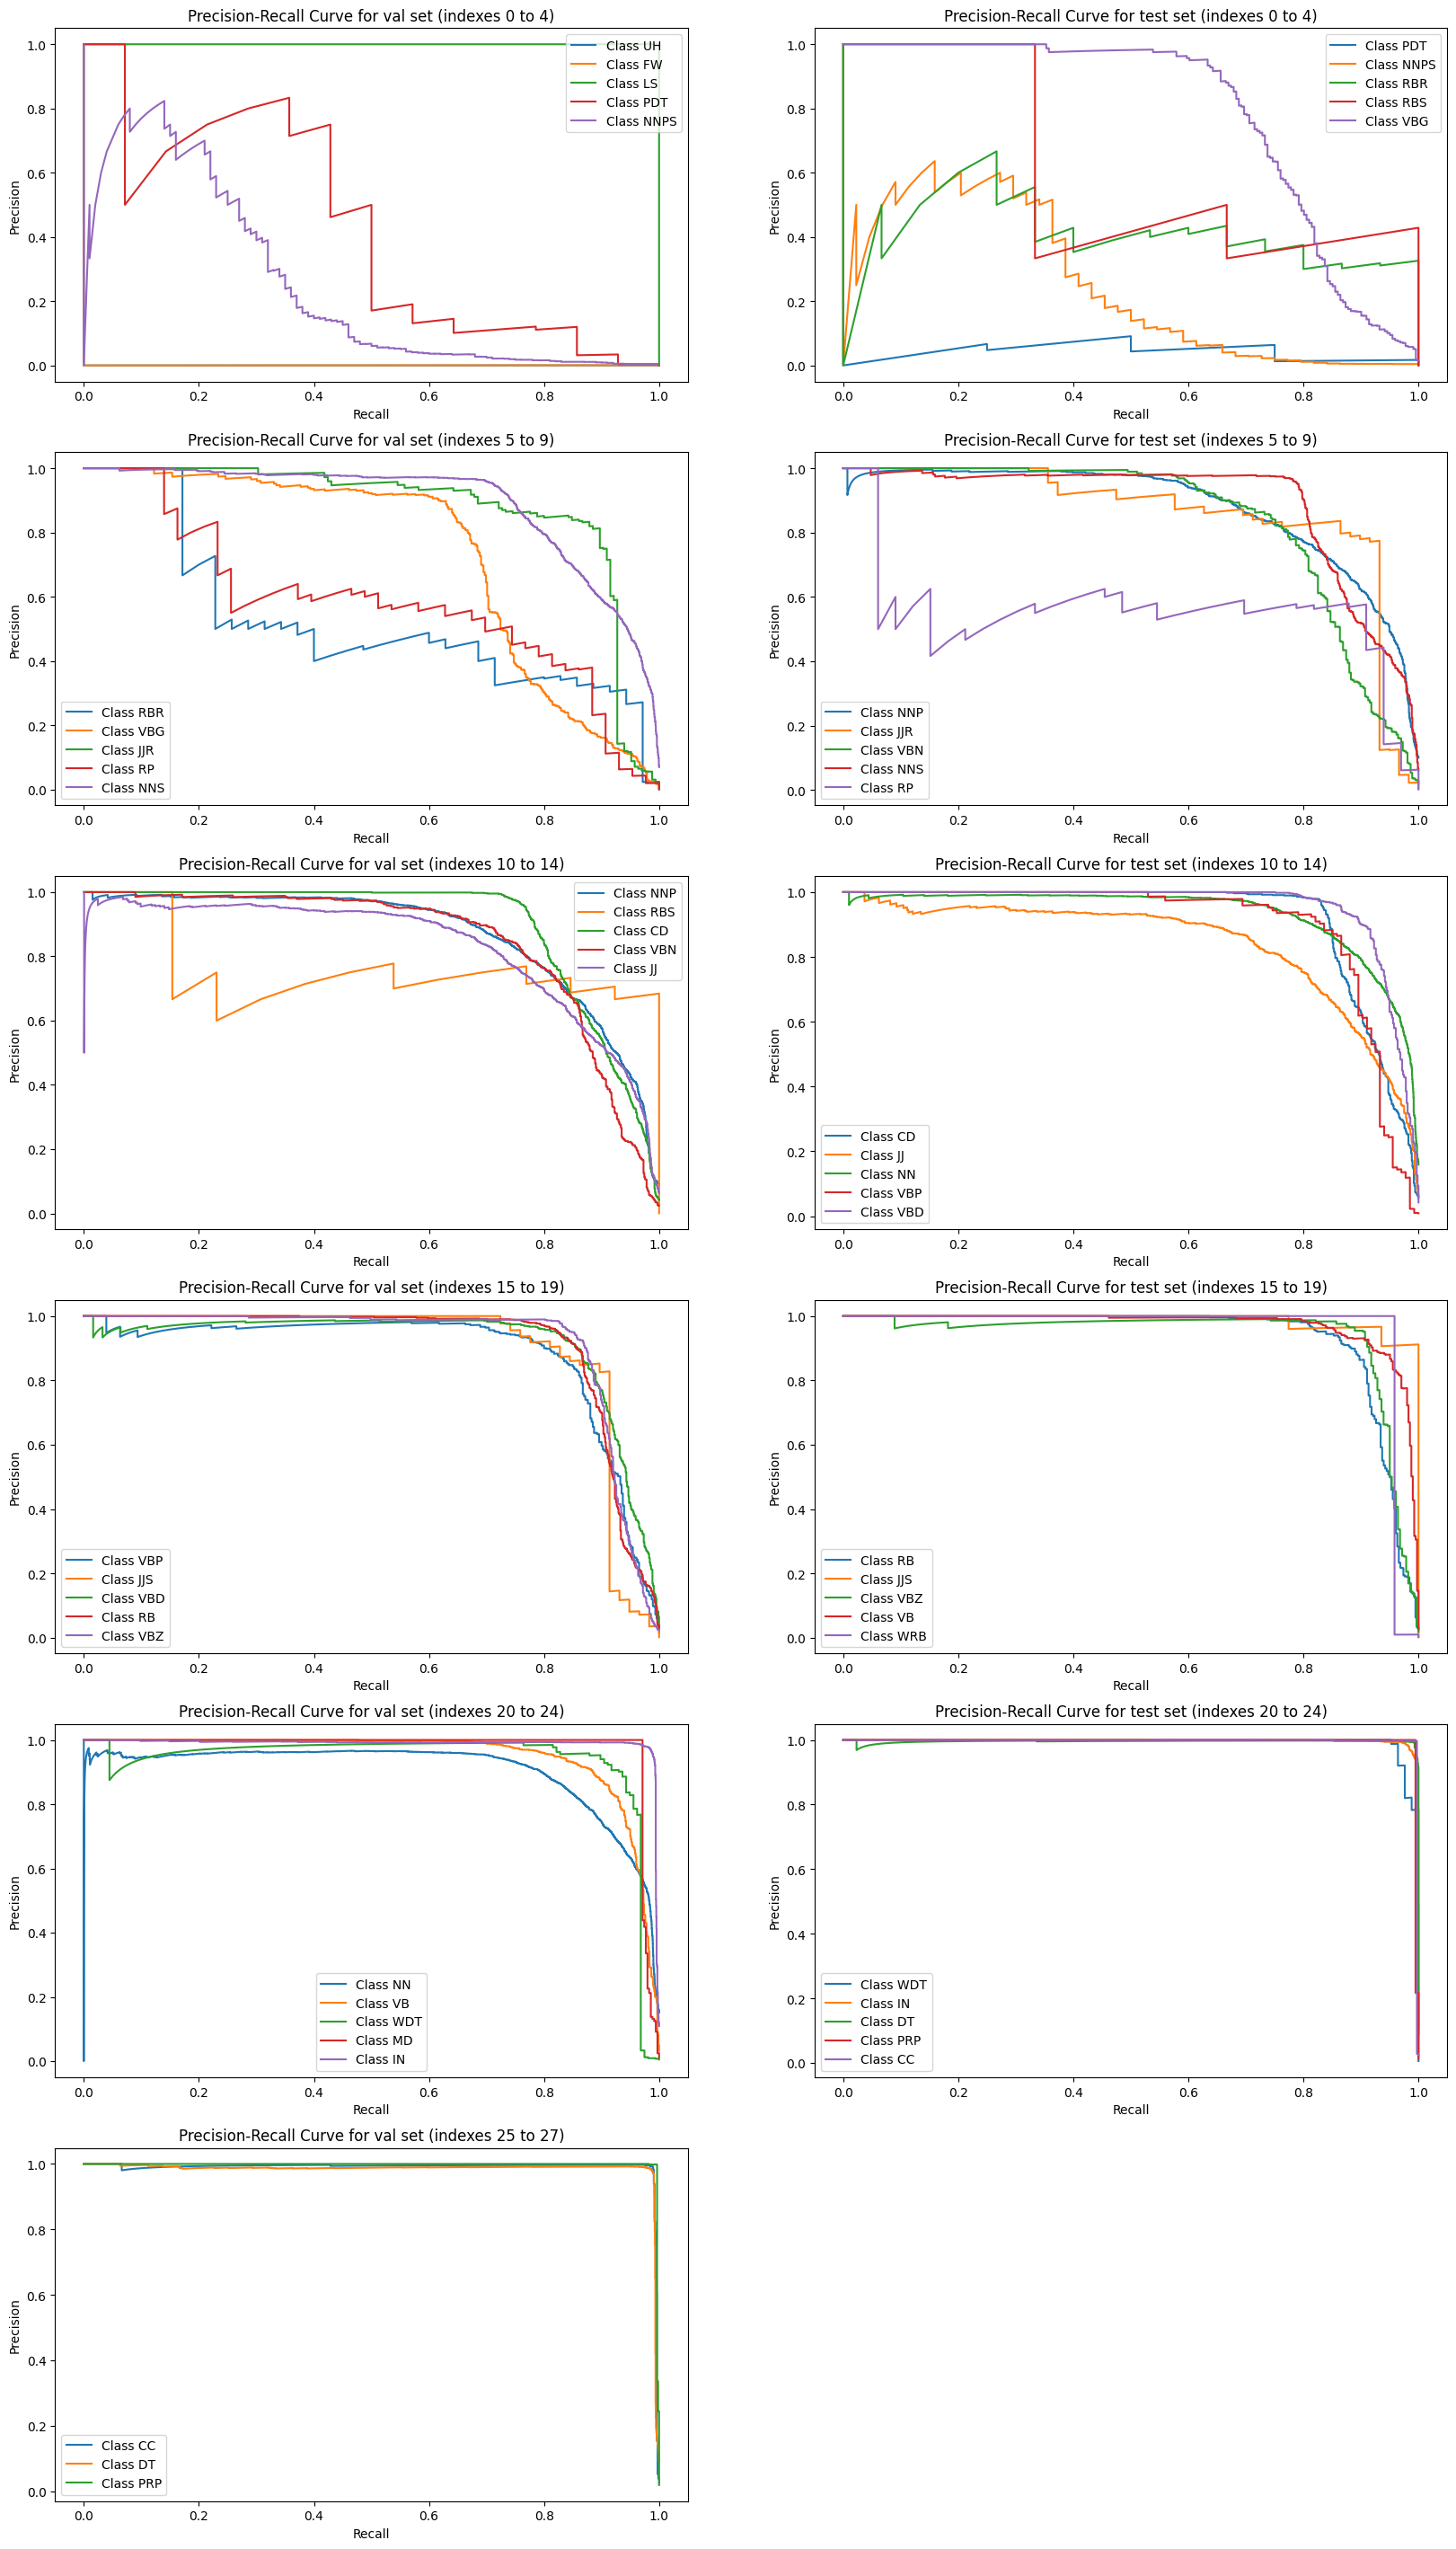

In [ ]:
plt.figure(figsize=(20, 6*8))

plt.subplot(8, 2, 1)
plot_precision_recall_curves(val_misclassification_frequency_ordered_tags, 0, 4, y_pred_val_all, y_true_val_all, 'val')

plt.subplot(8, 2, 2)
plot_precision_recall_curves(test_misclassification_frequency_ordered_tags, 0, 4, y_pred_test_all, y_true_test_all, 'test')

plt.subplot(8, 2, 3)
plot_precision_recall_curves(val_misclassification_frequency_ordered_tags, 5, 9, y_pred_val_all, y_true_val_all, 'val')

plt.subplot(8, 2, 4)
plot_precision_recall_curves(test_misclassification_frequency_ordered_tags, 5, 9, y_pred_test_all, y_true_test_all, 'test')

plt.subplot(8, 2, 5)
plot_precision_recall_curves(val_misclassification_frequency_ordered_tags, 10, 14, y_pred_val_all, y_true_val_all, 'val')

plt.subplot(8, 2, 6)
plot_precision_recall_curves(test_misclassification_frequency_ordered_tags, 10, 14, y_pred_test_all, y_true_test_all, 'test')

plt.subplot(8, 2, 7)
plot_precision_recall_curves(val_misclassification_frequency_ordered_tags, 15, 19, y_pred_val_all, y_true_val_all, 'val')

plt.subplot(8, 2, 8)
plot_precision_recall_curves(test_misclassification_frequency_ordered_tags, 15, 19, y_pred_test_all, y_true_test_all, 'test')

plt.subplot(8, 2, 9)
plot_precision_recall_curves(val_misclassification_frequency_ordered_tags, 20, 24, y_pred_val_all, y_true_val_all, 'val')

plt.subplot(8, 2, 10)
plot_precision_recall_curves(test_misclassification_frequency_ordered_tags, 20, 24, y_pred_test_all, y_true_test_all, 'test')

plt.subplot(8, 2, 11)
plot_precision_recall_curves(val_misclassification_frequency_ordered_tags, 25, 27, y_pred_val_all, y_true_val_all, 'val')

## 5. Confusion matrices

Let's visualize the confusion matrices.

### 5.1 Validation Set

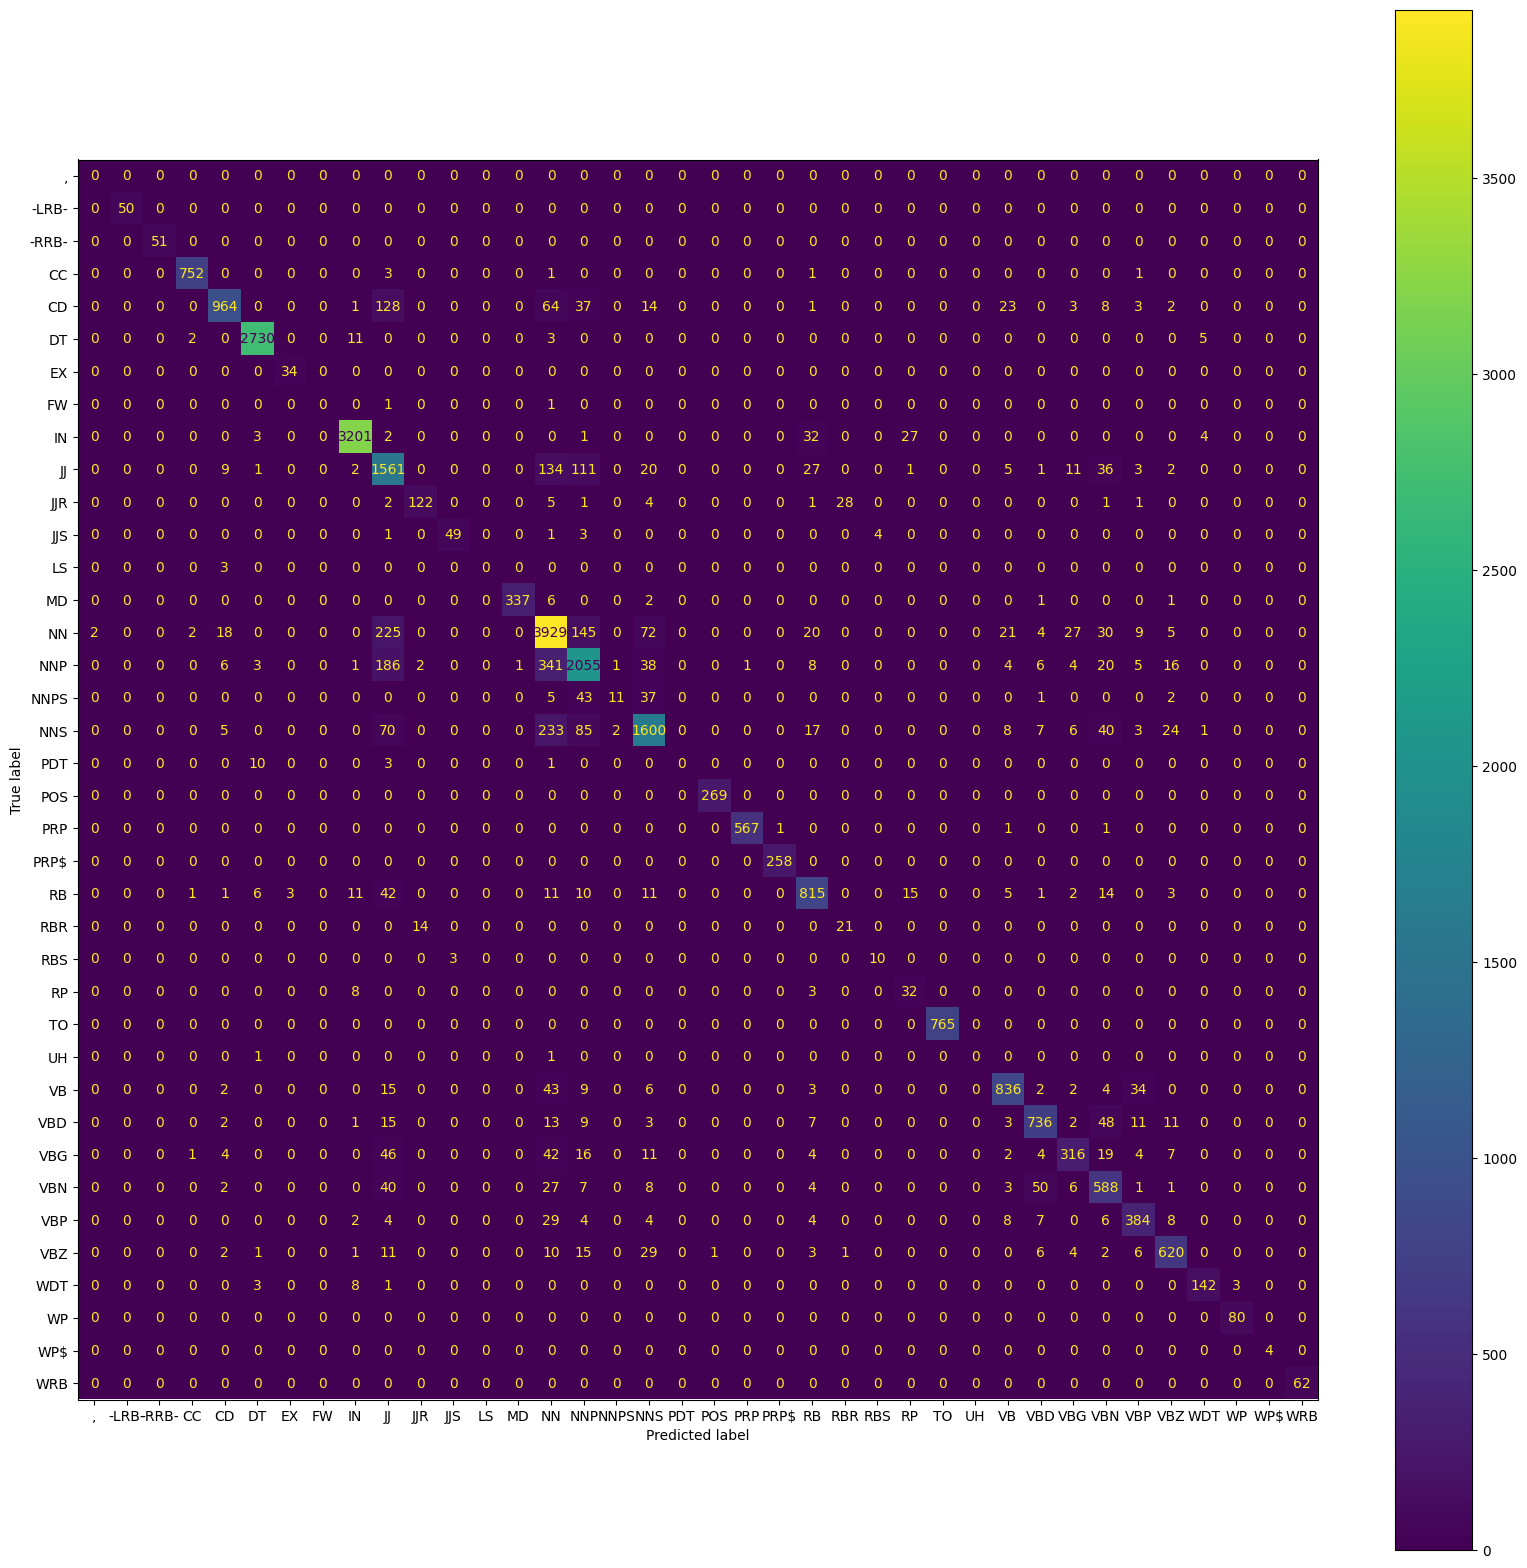

In [ ]:
display_confusion_matrix(y_true_val, y_pred_val)

<b>Note</b>: In the validation matrix there is a column (and consequently a row) for the ',' tag. This is due to the fact that the true label 'NN' has been (erroneously) predicted as a ',' 2 times by our model: as stated before we only removed the tags whose **true** label was a punctuation symbol, but we decided to keep predictions in which the ground truth is a tag to consider whereas the predicion is a symbol or a punctuation mark.

### 5.2 Test Set

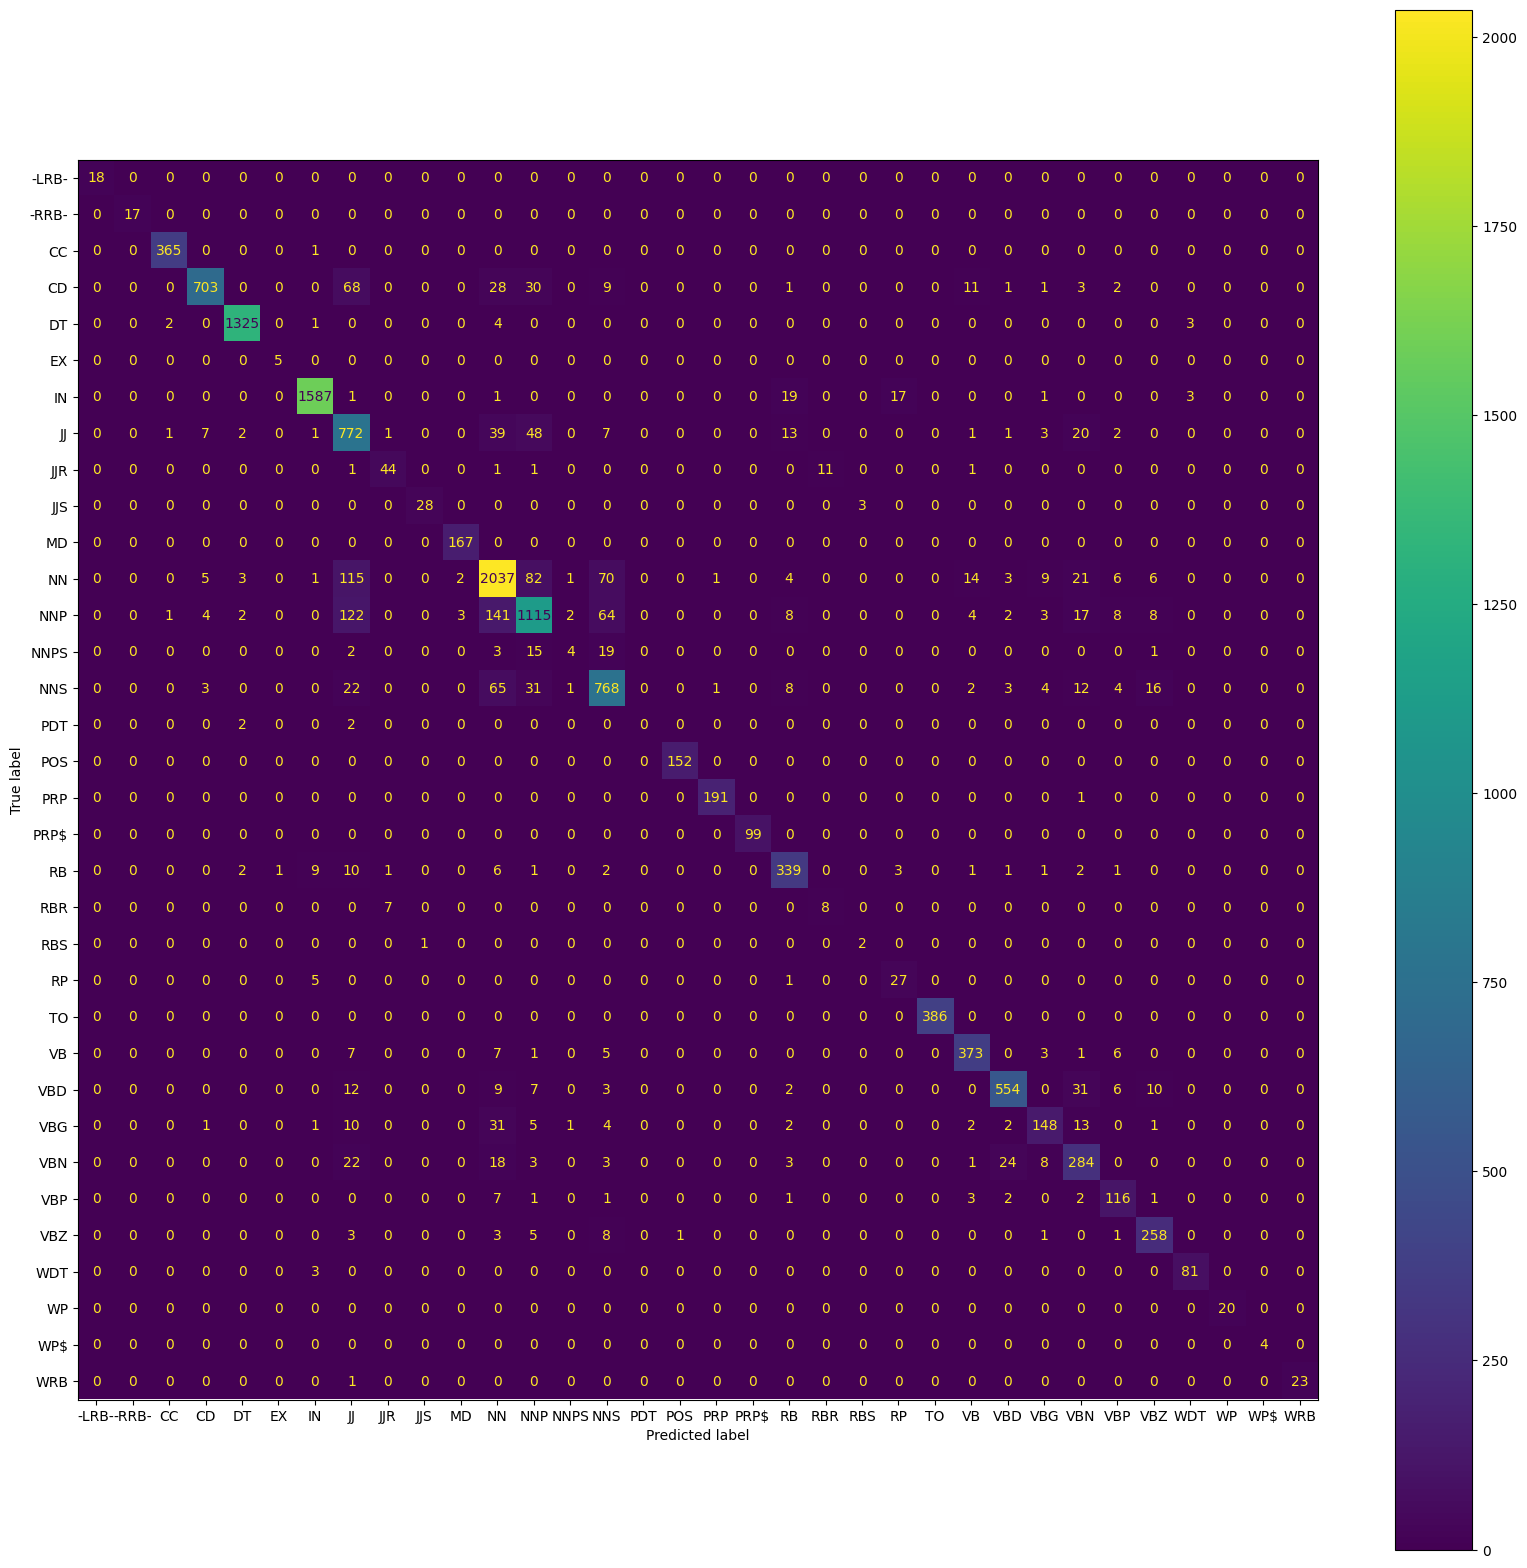

In [ ]:
display_confusion_matrix(y_true_test, y_pred_test)

As we can see the two matrices are very alike. In particular their diagonals clearly show very similar trends.

# [Task 7 - 1.0 points] Report

Wrap up your experiment in a short report (up to 2 pages).

### Instructions

* Use the NLP course report template.
* Summarize each task in the report following the provided template.

### Recommendations

The report is not a copy-paste of graphs, tables, and command outputs.

* Summarize classification performance in Table format.
* **Do not** report command outputs or screenshots.
* Report learning curves in Figure format.
* The error analysis section should summarize your findings.

# Submission

* **Submit** your report in PDF format.
* **Submit** your python notebook.
* Make sure your notebook is **well organized**, with no temporary code, commented sections, tests, etc...
* You can upload **model weights** in a cloud repository and report the link in the report.

# The End